# Data Exploration

In [1]:
import logging
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)
logging.basicConfig(level=logging.INFO)

logger = logging.getLogger('baseline')

In [2]:
import pandas as pd
# Disable warnings
pd.set_option('mode.chained_assignment', None)

from scrabu.commons import json_to_df
from scrabu.commons import files_to_df
from scrabu.commons import count_missing_values
from scrabu.commons import fill_missing_values
from scrabu.commons import create_target_columns
from scrabu.commons import remove_unused_columns

### Load the data into a dataframe

In [3]:
df = files_to_df(path='../../data')

/usr/src/scrabu/commons/__init__.py:18: FutureWarning: pandas.io.json.json_normalize is deprecated, use pandas.json_normalize instead
  normalized_df = json_normalize(df['events'])


### Are there any missing values?

In [5]:
count_missing_values(df)

column_name  percent_missing
shipment_number  shipment_number         0.000000
crawltime              crawltime         0.000000
url                          url         0.000000
datum                      datum         0.000000
status                    status         0.000000
ort                          ort        58.723379
is_final_event    is_final_event         0.000000

Column "ort" has many missing values. We fill them with "Unbekannt"

In [6]:
df = fill_missing_values(df)

Check again if there are any missing values

In [7]:
count_missing_values(df)

column_name  percent_missing
shipment_number  shipment_number              0.0
crawltime              crawltime              0.0
url                          url              0.0
datum                      datum              0.0
status                    status              0.0
ort                          ort              0.0
is_final_event    is_final_event              0.0

### Data Stats

In [8]:
df.shape

(150538, 7)

Number of unique shipment numbers

In [9]:
len(df.shipment_number.unique())

27361

### Investigate Data Types

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150538 entries, 0 to 5
Data columns (total 7 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   shipment_number  150538 non-null  object             
 1   crawltime        150538 non-null  datetime64[ns, UTC]
 2   url              150538 non-null  object             
 3   datum            150538 non-null  datetime64[ns, UTC]
 4   status           150538 non-null  object             
 5   ort              150538 non-null  object             
 6   is_final_event   150538 non-null  float64            
dtypes: datetime64[ns, UTC](2), float64(1), object(4)
memory usage: 9.2+ MB


Everything regarding data types seems to be fine! No need for conversion

### Prepare data for exploration and machine learning

- Given the features "datum", "status" and "ort" we want to predict the next "datum" and hopefully also the next "status" and the next "ort"
- We create 3 new columns. "datum_next", "ort_next" and "status_next".

In [11]:
df = create_target_columns(df)

In [12]:
df.head()

shipment_number                 crawltime  \
0  00340434188193325701 2020-01-05 21:24:49+00:00   
1  00340434188193325701 2020-01-05 21:24:49+00:00   
2  00340434188193325701 2020-01-05 21:24:49+00:00   
3  00340434188193325701 2020-01-05 21:24:49+00:00   
4  00340434188193325701 2020-01-05 21:24:49+00:00   

                                                 url  \
0  https://www.dhl.de/int-verfolgen/search?langua...   
1  https://www.dhl.de/int-verfolgen/search?langua...   
2  https://www.dhl.de/int-verfolgen/search?langua...   
3  https://www.dhl.de/int-verfolgen/search?langua...   
4  https://www.dhl.de/int-verfolgen/search?langua...   

                      datum  \
0 2019-10-08 14:42:00+00:00   
1 2019-10-08 18:19:00+00:00   
2 2019-10-09 02:44:00+00:00   
3 2019-10-09 07:46:00+00:00   
4 2019-10-09 10:35:00+00:00   

                                              status        ort  \
0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt   
1  Die Sendung wurde von DHL bearbeitet und wird ...    Hamburg   
2  Die Sendung ist in der Region des Empfu00E4nge...   Saulheim   
3  Die Sendung wurde in das Zustellfahrzeug gelad...  Unbekannt   
4          Die Sendung wurde erfolgreich zugestellt.  Unbekannt   

   is_final_event                                        status_next  \
0             0.0  Die Sendung wurde von DHL bearbeitet und wird ...   
1             0.0  Die Sendung ist in der Region des Empfu00E4nge...   
2             0.0  Die Sendung wurde in das Zustellfahrzeug gelad...   
3             0.0          Die Sendung wurde erfolgreich zugestellt.   
4             1.0                                    SuccessDelivery   

          ort_next                 datum_next  
0          Hamburg  2019-10-08 18:19:00+00:00  
1         Saulheim  2019-10-09 02:44:00+00:00  
2        Unbekannt  2019-10-09 07:46:00+00:00  
3        Unbekannt  2019-10-09 10:35:00+00:00  
4  SuccessDelivery                 2020-05-11

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150538 entries, 0 to 5
Data columns (total 10 columns):
 #   Column           Non-Null Count   Dtype              
---  ------           --------------   -----              
 0   shipment_number  150538 non-null  object             
 1   crawltime        150538 non-null  datetime64[ns, UTC]
 2   url              150538 non-null  object             
 3   datum            150538 non-null  datetime64[ns, UTC]
 4   status           150538 non-null  object             
 5   ort              150538 non-null  object             
 6   is_final_event   150538 non-null  float64            
 7   status_next      150538 non-null  object             
 8   ort_next         150538 non-null  object             
 9   datum_next       150538 non-null  object             
dtypes: datetime64[ns, UTC](2), float64(1), object(7)
memory usage: 12.6+ MB


### Data Stats

In [14]:
count_missing_values(df)

column_name  percent_missing
shipment_number  shipment_number              0.0
crawltime              crawltime              0.0
url                          url              0.0
datum                      datum              0.0
status                    status              0.0
ort                          ort              0.0
is_final_event    is_final_event              0.0
status_next          status_next              0.0
ort_next                ort_next              0.0
datum_next            datum_next              0.0

In [15]:
df.shape

(150538, 10)

Number of unique shipment numbers

In [16]:
len(df.shipment_number.unique())

27361

In [17]:
len(df.status.unique())

74

In [18]:
len(df.ort.unique())

131

### How many different final delivery states exist?

In [19]:
final_delivery_states = df.groupby(['shipment_number']).tail(1)[["status"]]["status"].unique()
print(final_delivery_states)

['Die Sendung wurde erfolgreich zugestellt.'
 'Die Sendung wurde storniert.'
 'Die Sendung wird zur Abholung in die ... gebracht. Die fru00FChestmu00F6gliche Uhrzeit der Abholung kann der Benachrichtigung entnommen werden.'
 'Die Sendung wurde zur Abholung in die ... gebracht.'
 'Die Sendung liegt ab sofort in dert Filiale ... zur Abholung bereit.'
 'Die Sendung wurde direkt ab Paketzentrum dem Geschu00E4ftskunden zugestellt.'
 'Die Sendung ist in der Region des Empfu00E4ngers angekommen und wird im nu00E4chsten Schritt zur Zustellbasis transportiert.'
 'Die Sendung wird zur Abholung in die ... gebracht. Fu00FCr die Abholung ist neben der Benachrichtigung die Vorlage Ihres Ausweises sowie ggf. eine Vollmacht erforderlich.'
 'Die Sendung wird fu00FCr den Weitertransport vorbereitet.'
 'Die Sendung wird zum Weitertransport vorbereitet.'
 'Die Sendung wurde ausgeliefert.'
 'Die Sendung wird fu00FCr die Verladung ins Zustellfahrzeug vorbereitet.'
 'Die Sendung wurde leider fehlgeleitet. Ge

### How many different initial delivery states exist?

In [20]:
initial_delivery_states = df.groupby(['shipment_number']).head(1)[["status"]]["status"].unique()
print(initial_delivery_states)

['Die Sendung wurde elektronisch angeku00FCndigt. Sobald die Sendung von uns bearbeitet wurde, erhalten Sie weitere Informationen.'
 'Die Sendung ist in der Region des Empfu00E4ngers angekommen und wird im nu00E4chsten Schritt zur Zustellbasis transportiert.'
 'Die Sendung wurde von DHL bearbeitet und wird fu00FCr den Weitertransport in die Region des Empfu00E4ngers vorbereitet.'
 'Die Sendung wurde abgeholt.' 'Die Sendung wurde storniert.'
 'Die Sendung wird fu00FCr den Weitertransport vorbereitet.'
 'Die Auslandssendung wurde im Export-Paketzentrum bearbeitet.'
 'Die Sendung wurde am Wunschort abgeholt.'
 'Die Sendung wurde vom Absender in der Filiale eingeliefert.']


### Distribution of final delivery states

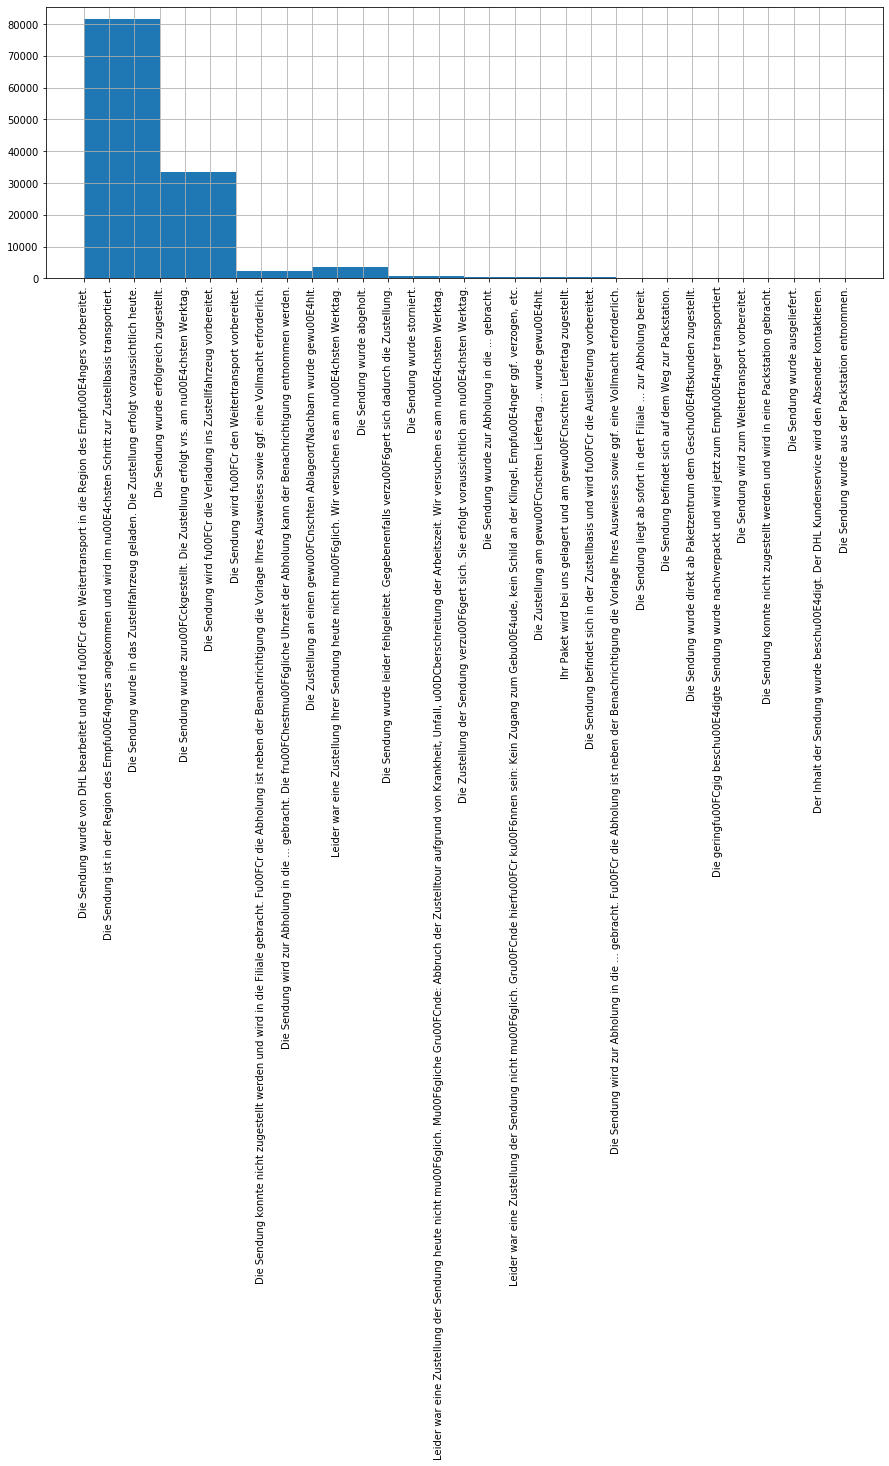

In [21]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')

df[df["status"].isin(final_delivery_states)]["status"].hist(figsize=(15,5))

### Distribution of initial states

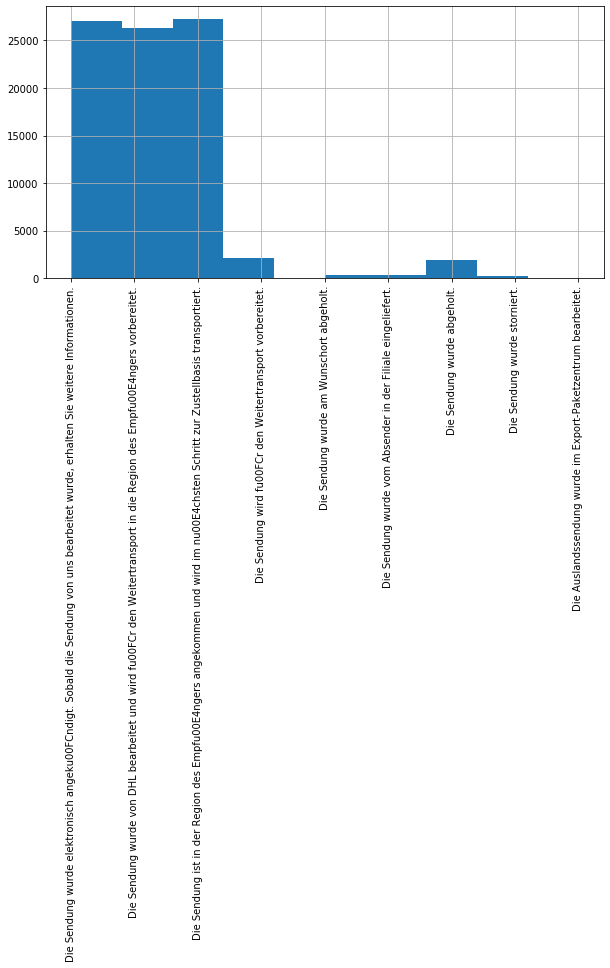

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')

df[df["status"].isin(initial_delivery_states)]["status"].hist(figsize=(10,5))

### Distribution of all states

These are the most common states

In [23]:
pd.DataFrame(df["status"].value_counts()).head(10)

status
Die Sendung wurde in das Zustellfahrzeug gelade...   27855
Die Sendung ist in der Region des Empfu00E4nger...   27227
Die Sendung wurde elektronisch angeku00FCndigt....   27087
Die Sendung wurde erfolgreich zugestellt.            26866
Die Sendung wurde von DHL bearbeitet und wird f...   26355
Die Sendung wird fu00FCr die Verladung ins Zust...    6203
Die Sendung wird fu00FCr den Weitertransport vo...    2123
Die Sendung wurde abgeholt.                           1867
Die Zustellung an einen gewu00FCnschten Ablageo...    1403
Die Sendung wurde vom Absender in der Filiale e...     306

These are the least common states. What we see here is that there are some states that are basically the same and the following pattern:

"Die Sendung liegt in der ........ zur Abholung bereit"

But the address is each time different. This leads to too many states, which also makes machine learning hard. We ignore the address part and convert all these states to a single one.

In [24]:
pd.DataFrame(df["status"].value_counts()).tail(10)

status
Die Sendung wurde an eine Hauspoststelle weiter...       1
Die Auslands-Sendung wird fu00FCr den Weitertra...       1
Die Zustellvorgaben des Versenders konnten nich...       1
Der Empfu00E4nger wurde nicht angetroffen. Es e...       1
Die Auslandssendung wurde an DHL u00FCbergeben ...       1
Auf Wunsch des Empfu00E4ngers erfolgt ein 2. Zu...       1
Der gewu00FCnschte Liefertag und die Lieferzeit...       1
Der Abholauftrag wurde zur Durchfuhrung am nach...       1
Die Sendung wurde aus der Packstation entnommen.         1
Die Sendung konnte aufgrund hu00F6herer Gewalt ...       1

In [25]:
pd.DataFrame(df["status"].value_counts()).head(10)

status
Die Sendung wurde in das Zustellfahrzeug gelade...   27855
Die Sendung ist in der Region des Empfu00E4nger...   27227
Die Sendung wurde elektronisch angeku00FCndigt....   27087
Die Sendung wurde erfolgreich zugestellt.            26866
Die Sendung wurde von DHL bearbeitet und wird f...   26355
Die Sendung wird fu00FCr die Verladung ins Zust...    6203
Die Sendung wird fu00FCr den Weitertransport vo...    2123
Die Sendung wurde abgeholt.                           1867
Die Zustellung an einen gewu00FCnschten Ablageo...    1403
Die Sendung wurde vom Absender in der Filiale e...     306

In [26]:
pd.DataFrame(df["status"].value_counts()).tail(10)

status
Die Sendung wurde an eine Hauspoststelle weiter...       1
Die Auslands-Sendung wird fu00FCr den Weitertra...       1
Die Zustellvorgaben des Versenders konnten nich...       1
Der Empfu00E4nger wurde nicht angetroffen. Es e...       1
Die Auslandssendung wurde an DHL u00FCbergeben ...       1
Auf Wunsch des Empfu00E4ngers erfolgt ein 2. Zu...       1
Der gewu00FCnschte Liefertag und die Lieferzeit...       1
Der Abholauftrag wurde zur Durchfuhrung am nach...       1
Die Sendung wurde aus der Packstation entnommen.         1
Die Sendung konnte aufgrund hu00F6herer Gewalt ...       1

In [27]:
len(df["status"].unique())

74

In [28]:
len(df["status_next"].unique())

73

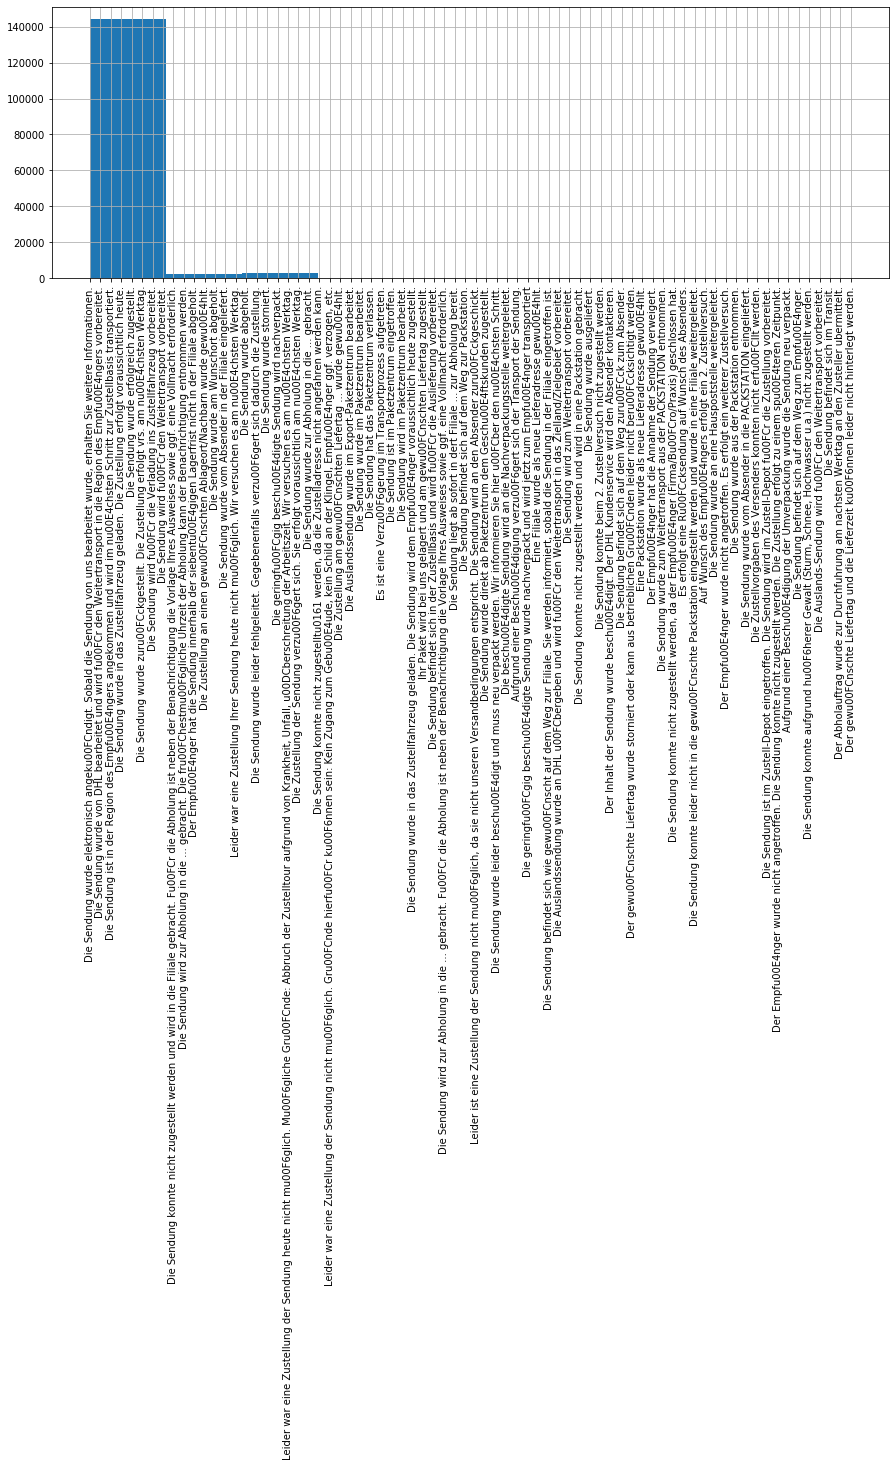

In [29]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.xticks(rotation='vertical')
df["status"].hist(figsize=(15,5))

We introduces two new states to status_next: SuccessDelivery, FailedDelivery

### Distribution of the locations

In [30]:
len(df["ort"].unique())

131

In [31]:
pd.DataFrame(df["ort"].value_counts()).head(5)

ort
Unbekannt       88401
Ru00FCdersdorf  12577
Bu00F6rnicke     8243
Hamburg          5663
Ku00F6ln         1901

In [32]:
pd.DataFrame(df["ort"].value_counts()).tail(5)

ort
BIRMINGHAM, Grou00DFbritannien                    2
Landsberg                                         1
Leipzig                                           1
BZ 56, Carl-Spaeter-Str. 2f, 56070 Koblenz        1
BZ 67, Ernst-Boehe-Str. 23, 67059 Ludwigshafen    1

Notice: One idea here could be to merge some locations. 

### Remove unused columns

In [33]:
df = remove_unused_columns(df)

In [34]:
df.head()

shipment_number                     datum  \
0  00340434188193325701 2019-10-08 14:42:00+00:00   
1  00340434188193325701 2019-10-08 18:19:00+00:00   
2  00340434188193325701 2019-10-09 02:44:00+00:00   
3  00340434188193325701 2019-10-09 07:46:00+00:00   
4  00340434188193325701 2019-10-09 10:35:00+00:00   

                                              status        ort  \
0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt   
1  Die Sendung wurde von DHL bearbeitet und wird ...    Hamburg   
2  Die Sendung ist in der Region des Empfu00E4nge...   Saulheim   
3  Die Sendung wurde in das Zustellfahrzeug gelad...  Unbekannt   
4          Die Sendung wurde erfolgreich zugestellt.  Unbekannt   

   is_final_event                                        status_next  \
0             0.0  Die Sendung wurde von DHL bearbeitet und wird ...   
1             0.0  Die Sendung ist in der Region des Empfu00E4nge...   
2             0.0  Die Sendung wurde in das Zustellfahrzeug gelad...   
3             0.0          Die Sendung wurde erfolgreich zugestellt.   
4             1.0                                    SuccessDelivery   

          ort_next                 datum_next  
0          Hamburg  2019-10-08 18:19:00+00:00  
1         Saulheim  2019-10-09 02:44:00+00:00  
2        Unbekannt  2019-10-09 07:46:00+00:00  
3        Unbekannt  2019-10-09 10:35:00+00:00  
4  SuccessDelivery                 2020-05-11

### Distribution of event times

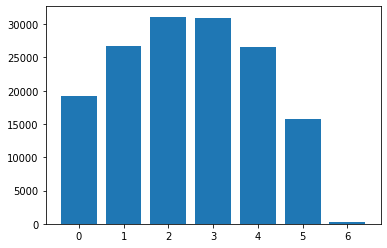

In [35]:
counts = df['datum'].dt.dayofweek.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

We see in the above plot which days of the week have the highest amount of events. Sunday has for example the least amount of events, as expected.

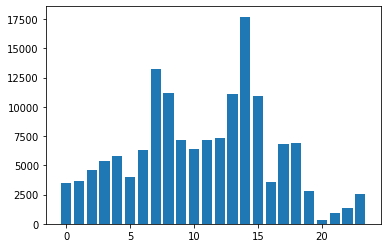

In [36]:
counts = df['datum'].dt.hour.value_counts(sort=False)
plt.bar(counts.index,counts)
plt.show()

In the above plot we see the distribution of the events over 24 hours of a day

### Time diff between events

In [37]:
from scrabu.commons import add_time_diff_column
df = add_time_diff_column(df)

Notice that for is_final_event=1, the datum_diff does not make any sense. Do not use it in the analysis

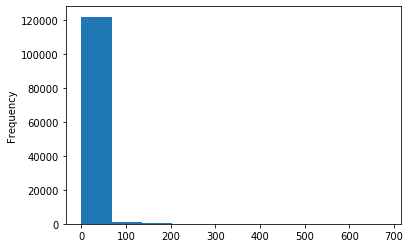

In [38]:
df[df["is_final_event"] == 0]['datum_diff'].astype('timedelta64[h]').plot.hist()

We observe two interesting things here. There are events with zero time diff and there are events with very big time diffs.

### Events with very small time diffs

In [39]:
df[(df["is_final_event"] == 0.0) & (df['datum_diff'].astype('timedelta64[s]') == 0)] 

shipment_number                     datum  \
2   00384279070327353973 2020-01-30 04:47:00+00:00   
1   00340434188193341114 2019-12-02 19:06:00+00:00   
1   00340434193824559424 2020-01-31 18:31:00+00:00   
3   00340434311100810995 2020-02-17 08:07:00+00:00   
3   00340434154847550447 2020-03-05 01:50:00+00:00   
..                   ...                       ...   
3   00340434193824481145 2020-01-16 08:39:00+00:00   
3   00340434188193356200 2019-12-31 09:02:00+00:00   
3   00340434193824515918 2020-01-24 06:54:00+00:00   
3   00340434188193332792 2019-11-23 07:43:00+00:00   
2   00384279070327331360 2020-01-30 04:47:00+00:00   

                                               status                 ort  \
2         Die Sendung hat das Paketzentrum verlassen.  BARCELONA, Spanien   
1   Die Sendung wurde von DHL bearbeitet und wird ...             Hamburg   
1   Die Sendung wurde von DHL bearbeitet und wird ...      Ru00FCdersdorf   
3   Die Sendung wurde in das Zustellfahrzeug gelad...           Unbekannt   
3   Die Sendung wird fu00FCr den Weitertransport v...             Hamburg   
..                                                ...                 ...   
3   Die Sendung wurde in das Zustellfahrzeug gelad...           Unbekannt   
3   Die Sendung wurde in das Zustellfahrzeug gelad...           Unbekannt   
3   Die Sendung wurde in das Zustellfahrzeug gelad...           Unbekannt   
3   Die Sendung wurde in das Zustellfahrzeug gelad...           Unbekannt   
2       Die Sendung wurde im Paketzentrum bearbeitet.  BARCELONA, Spanien   

    is_final_event                                        status_next  \
2              0.0      Die Sendung wurde im Paketzentrum bearbeitet.   
1              0.0  Die Zustellung am gewu00FCnschten Liefertag .....   
1              0.0  Die Zustellung am gewu00FCnschten Liefertag .....   
3              0.0  Die Sendung befindet sich auf dem Weg zur Pack...   
3              0.0  Die Sendung ist in der Region des Empfu00E4nge...   
..             ...                                                ...   
3              0.0  Die Sendung befindet sich auf dem Weg zur Pack...   
3              0.0  Die Sendung befindet sich auf dem Weg zur Pack...   
3              0.0  Die Zustellung an einen gewu00FCnschten Ablage...   
3              0.0  Die Sendung befindet sich auf dem Weg zur Pack...   
2              0.0        Die Sendung hat das Paketzentrum verlassen.   

              ort_next                datum_next datum_diff  
2   BARCELONA, Spanien 2020-01-30 04:47:00+00:00     0 days  
1            Unbekannt 2019-12-02 19:06:00+00:00     0 days  
1            Unbekannt 2020-01-31 18:31:00+00:00     0 days  
3            Unbekannt 2020-02-17 08:07:00+00:00     0 days  
3              Hamburg 2020-03-05 01:50:00+00:00     0 days  
..                 ...                       ...        ...  
3            Unbekannt 2020-01-16 08:39:00+00:00     0 days  
3            Unbekannt 2019-12-31 09:02:00+00:00     0 days  
3            Unbekannt 2020-01-24 06:54:00+00:00     0 days  
3            Unbekannt 2019-11-23 07:43:00+00:00     0 days  
2   BARCELONA, Spanien 2020-01-30 04:47:00+00:00     0 days  

[185 rows x 9 columns]

### Events with huge time diffs

In [40]:
df[(df["is_final_event"] == 0.0) & (df['datum_diff'].astype('timedelta64[h]') > 150)] 

shipment_number                     datum  \
6   00340434193824430761 2020-01-11 12:33:00+00:00   
0   00340434311100802402 2020-02-12 17:55:00+00:00   
6   00340434193824434325 2020-01-15 14:33:00+00:00   
0   00340434154847508080 2019-11-05 08:20:00+00:00   
0   00340434311100803751 2020-02-12 17:55:00+00:00   
..                   ...                       ...   
7   00340434154847523243 2019-12-23 07:40:00+00:00   
6   00340434311100801610 2020-02-14 12:40:00+00:00   
6   00340434193824481145 2020-01-16 13:59:00+00:00   
5   00340434193824516908 2020-01-23 11:54:00+00:00   
8   00340434193824516908 2020-02-04 15:04:00+00:00   

                                               status           ort  \
6   Die Sendung wird zur Abholung in die ... gebra...     Unbekannt   
0   Die Sendung wurde elektronisch angeku00FCndigt...     Unbekannt   
6   Die Sendung wird zur Abholung in die ... gebra...     Unbekannt   
0   Die Sendung wurde elektronisch angeku00FCndigt...     Unbekannt   
0   Die Sendung wurde elektronisch angeku00FCndigt...     Unbekannt   
..                                                ...           ...   
7   Die Zustellung der Sendung verzu00F6gert sich....     Unbekannt   
6   Die Sendung wird zur Abholung in die ... gebra...     Unbekannt   
6   Die Sendung wird zur Abholung in die ... gebra...     Unbekannt   
5   Die Sendung wurde zur Abholung in die ... gebr...     Unbekannt   
8   Die Sendung wurde von DHL bearbeitet und wird ...  Gu00FCnzburg   

    is_final_event                                        status_next  \
6              0.0  Der Empfu00E4nger hat die Sendung innerhalb de...   
0              0.0  Die Sendung wurde von DHL bearbeitet und wird ...   
6              0.0  Der Empfu00E4nger hat die Sendung innerhalb de...   
0              0.0                        Die Sendung wurde abgeholt.   
0              0.0  Die Sendung wurde von DHL bearbeitet und wird ...   
..             ...                                                ...   
7              0.0  Die Sendung wurde in das Zustellfahrzeug gelad...   
6              0.0  Die Sendung liegt ab sofort in dert Filiale .....   
6              0.0  Der Empfu00E4nger hat die Sendung innerhalb de...   
5              0.0  Der Empfu00E4nger hat die Sendung innerhalb de...   
8              0.0  Die Sendung wurde von DHL bearbeitet und wird ...   

        ort_next                datum_next       datum_diff  
6      Unbekannt 2020-01-20 08:15:00+00:00  8 days 19:42:00  
0       Ku00F6ln 2020-02-19 18:35:00+00:00  7 days 00:40:00  
6      Unbekannt 2020-01-23 13:43:00+00:00  7 days 23:10:00  
0      Unbekannt 2019-11-14 13:51:00+00:00  9 days 05:31:00  
0       Ku00F6ln 2020-02-19 19:28:00+00:00  7 days 01:33:00  
..           ...                       ...              ...  
7      Unbekannt 2020-01-02 06:33:00+00:00  9 days 22:53:00  
6      Unbekannt 2020-02-27 10:20:00+00:00 12 days 21:40:00  
6      Unbekannt 2020-01-27 10:53:00+00:00 10 days 20:54:00  
5      Unbekannt 2020-02-03 11:56:00+00:00 11 days 00:02:00  
8   Bu00F6rnicke 2020-02-14 14:08:00+00:00  9 days 23:04:00  

[215 rows x 9 columns]

### Distribution of time diff for various states

In [41]:
from scrabu.commons import add_time_diff_in_hours
df = add_time_diff_in_hours(df)

In [42]:
df_temp = df[df["is_final_event"] == 0][["datum_diff_h", "status"]]
df_temp.reset_index()
df_temp.index = range(0,df_temp.shape[0])
df_temp.head()

datum_diff_h                                             status
0           3.0  Die Sendung wurde elektronisch angeku00FCndigt...
1           8.0  Die Sendung wurde von DHL bearbeitet und wird ...
2           5.0  Die Sendung ist in der Region des Empfu00E4nge...
3           2.0  Die Sendung wurde in das Zustellfahrzeug gelad...
4          28.0  Die Sendung wurde elektronisch angeku00FCndigt...

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:3: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations. 
  This is separate from the ipykernel package so we can avoid doing imports until


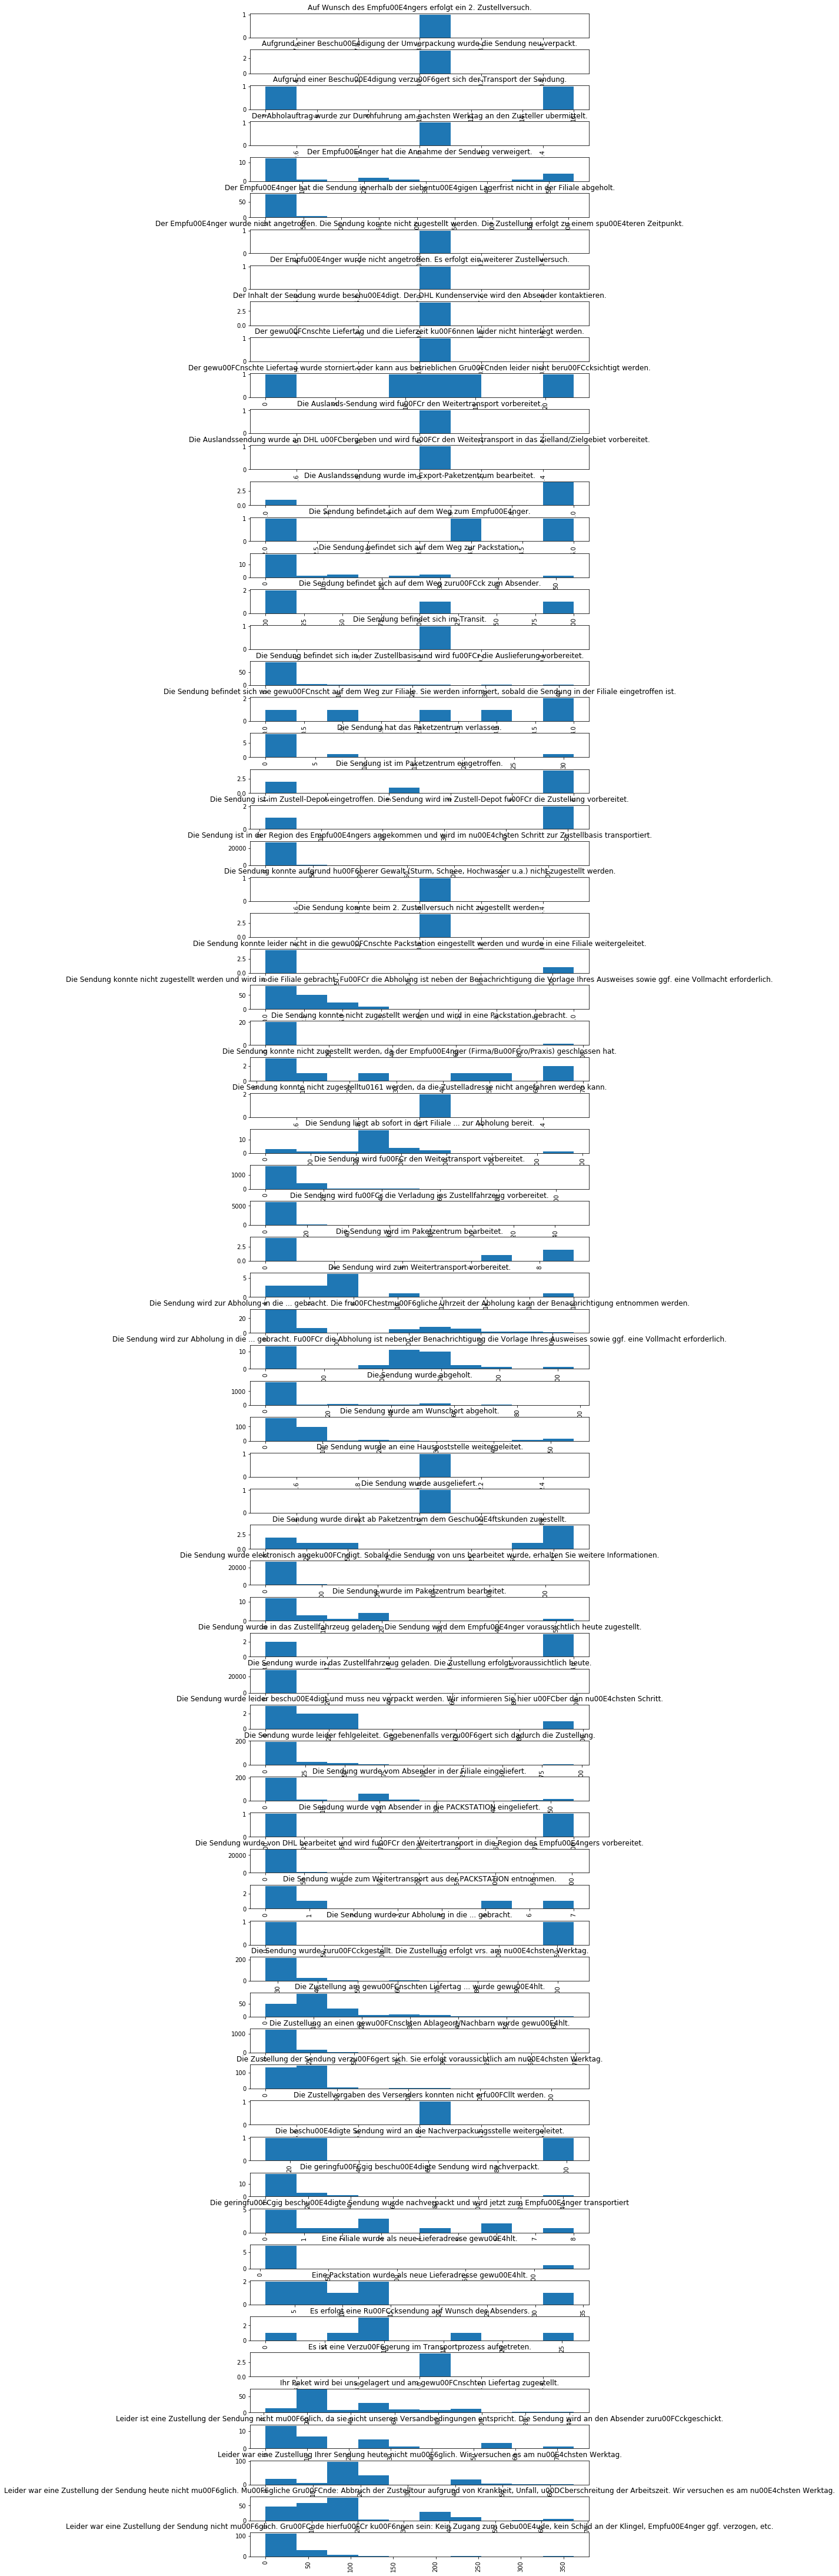

In [43]:
%matplotlib inline
df_temp["datum_diff_h"].hist(by=df_temp['status'], layout=(len(df_temp["status"].unique()), 1), figsize=(10,80))
plt.tight_layout()
df.drop(columns=["datum_diff_h"], inplace=True)

In [44]:
df.head()

shipment_number                     datum  \
0  00340434188193325701 2019-10-08 14:42:00+00:00   
1  00340434188193325701 2019-10-08 18:19:00+00:00   
2  00340434188193325701 2019-10-09 02:44:00+00:00   
3  00340434188193325701 2019-10-09 07:46:00+00:00   
4  00340434188193325701 2019-10-09 10:35:00+00:00   

                                              status        ort  \
0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt   
1  Die Sendung wurde von DHL bearbeitet und wird ...    Hamburg   
2  Die Sendung ist in der Region des Empfu00E4nge...   Saulheim   
3  Die Sendung wurde in das Zustellfahrzeug gelad...  Unbekannt   
4          Die Sendung wurde erfolgreich zugestellt.  Unbekannt   

   is_final_event                                        status_next  \
0             0.0  Die Sendung wurde von DHL bearbeitet und wird ...   
1             0.0  Die Sendung ist in der Region des Empfu00E4nge...   
2             0.0  Die Sendung wurde in das Zustellfahrzeug gelad...   
3             0.0          Die Sendung wurde erfolgreich zugestellt.   
4             1.0                                    SuccessDelivery   

          ort_next                datum_next        datum_diff  
0          Hamburg 2019-10-08 18:19:00+00:00   0 days 03:37:00  
1         Saulheim 2019-10-09 02:44:00+00:00   0 days 08:25:00  
2        Unbekannt 2019-10-09 07:46:00+00:00   0 days 05:02:00  
3        Unbekannt 2019-10-09 10:35:00+00:00   0 days 02:49:00  
4  SuccessDelivery 2020-05-11 00:00:00+00:00 214 days 13:25:00

### Distribution of time diff for various locations

In [45]:
df["datum_diff_h"] = df['datum_diff'].astype('timedelta64[h]')

In [46]:
df_temp = df[df["is_final_event"] == 0][["datum_diff_h", "status", "ort"]]
df_temp.reset_index()
df_temp.index = range(0,df_temp.shape[0])
df_temp.head()

datum_diff_h                                             status        ort
0           3.0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt
1           8.0  Die Sendung wurde von DHL bearbeitet und wird ...    Hamburg
2           5.0  Die Sendung ist in der Region des Empfu00E4nge...   Saulheim
3           2.0  Die Sendung wurde in das Zustellfahrzeug gelad...  Unbekannt
4          28.0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt

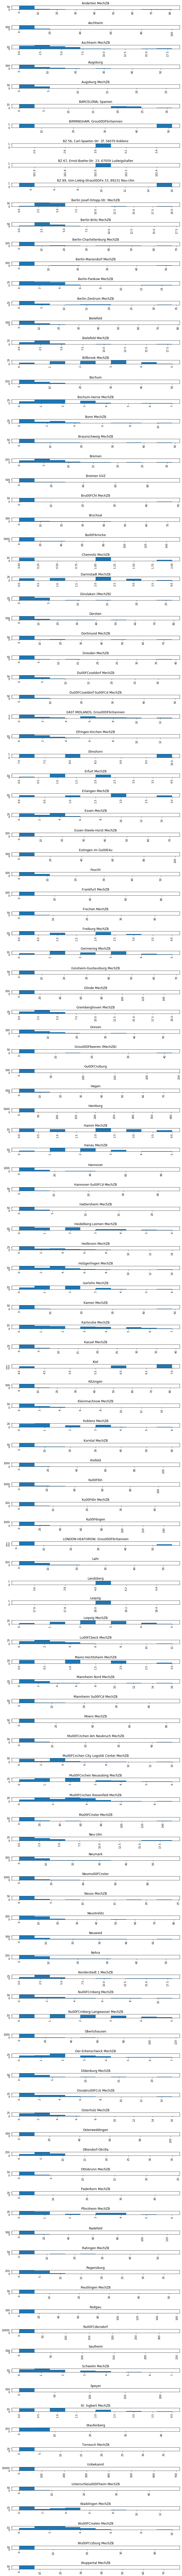

In [47]:
%matplotlib inline
df_temp["datum_diff_h"].hist(by=df_temp['ort'], layout=(len(df_temp["ort"].unique()), 1), figsize=(10,140))
plt.tight_layout()
df.drop(columns=["datum_diff_h"], inplace=True)

### Distribution of time diff for various locations and states

In [48]:
df["datum_diff_h"] = df['datum_diff'].astype('timedelta64[h]')

In [49]:
df_temp = df[df["is_final_event"] == 0][["datum_diff_h", "status", "ort"]]
df_temp.reset_index()
df_temp.index = range(0,df_temp.shape[0])
df_temp.head()

datum_diff_h                                             status        ort
0           3.0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt
1           8.0  Die Sendung wurde von DHL bearbeitet und wird ...    Hamburg
2           5.0  Die Sendung ist in der Region des Empfu00E4nge...   Saulheim
3           2.0  Die Sendung wurde in das Zustellfahrzeug gelad...  Unbekannt
4          28.0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt

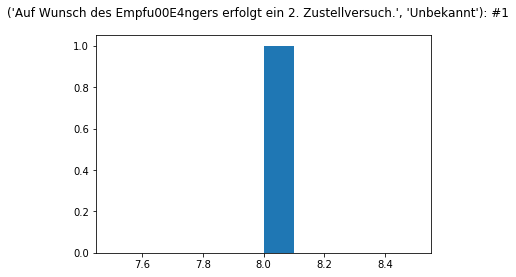

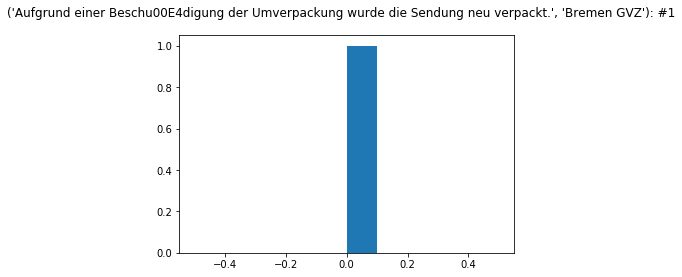

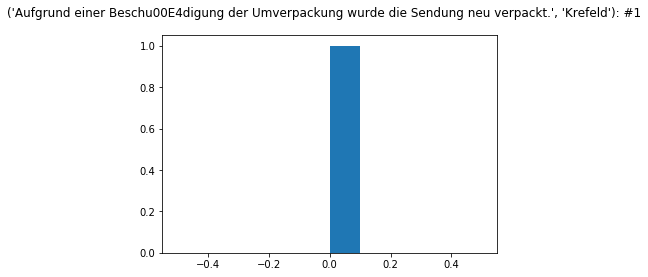

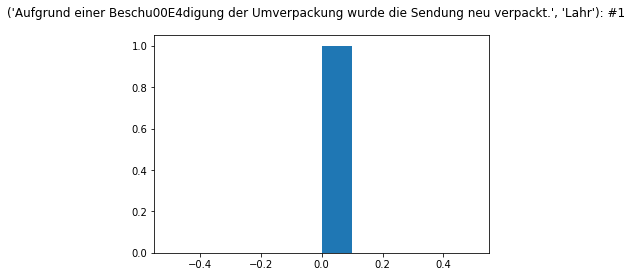

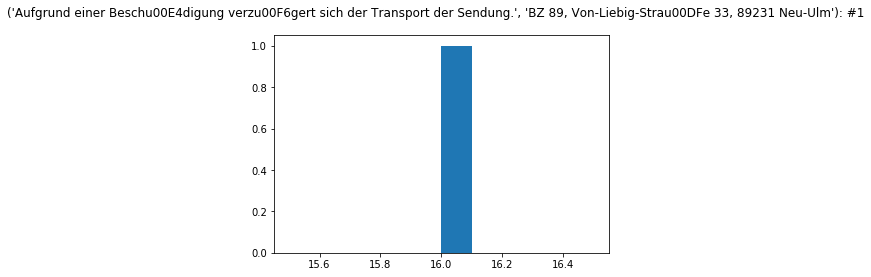

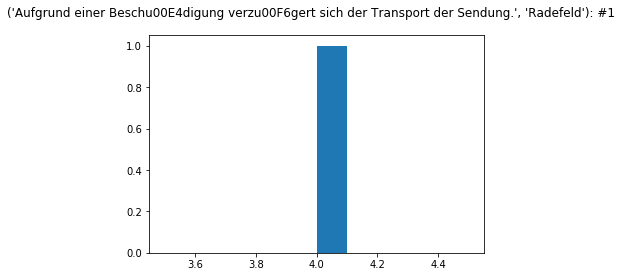

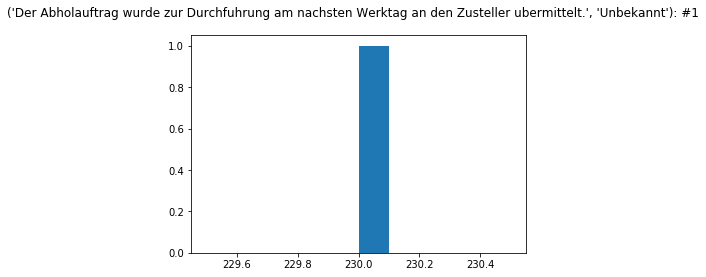

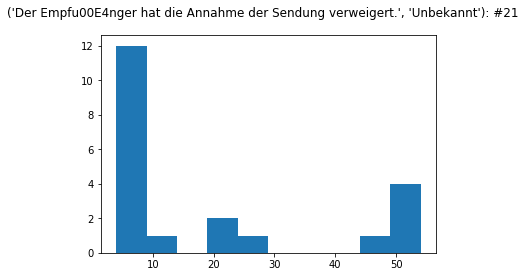

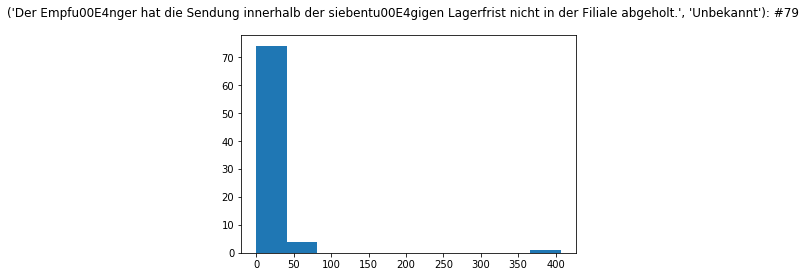

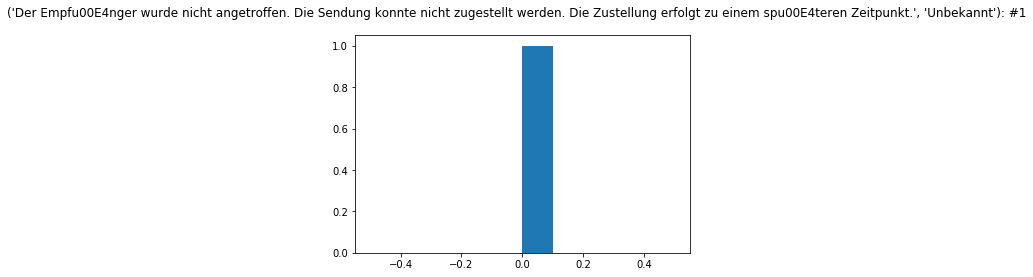

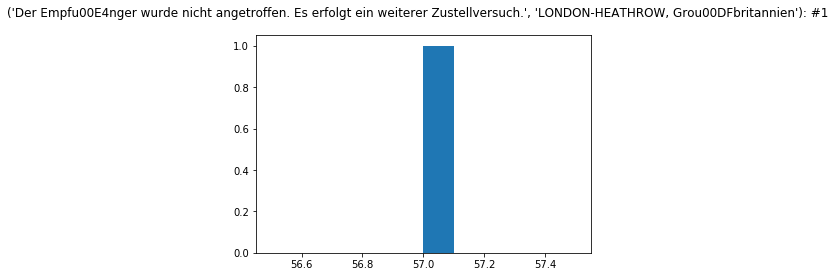

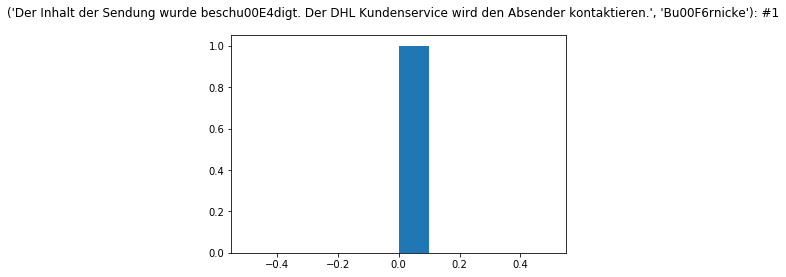

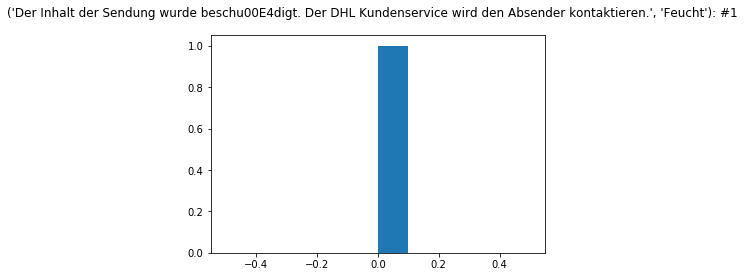

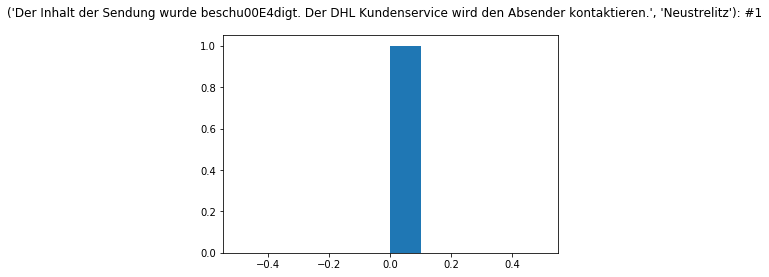

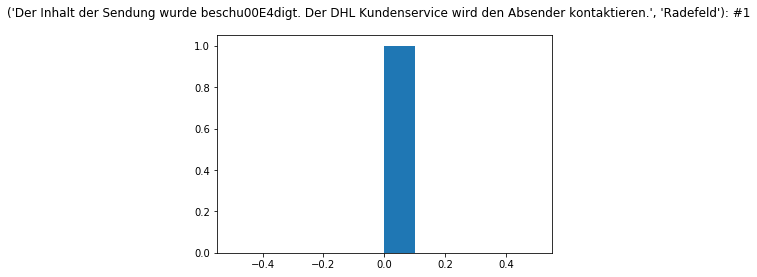

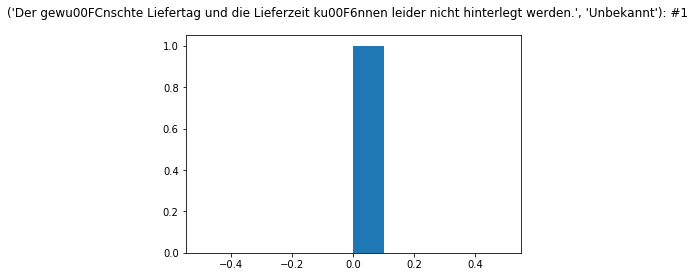

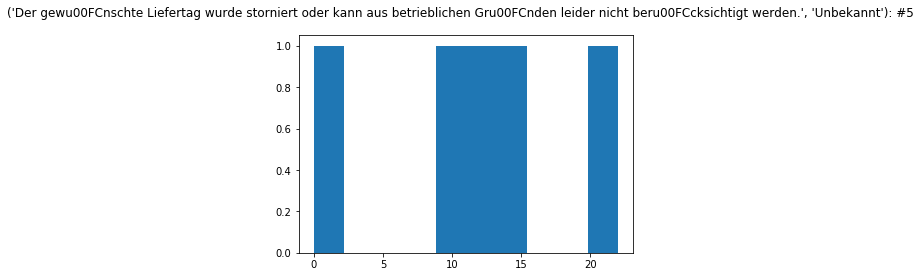

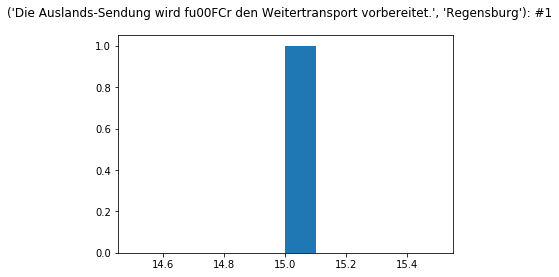

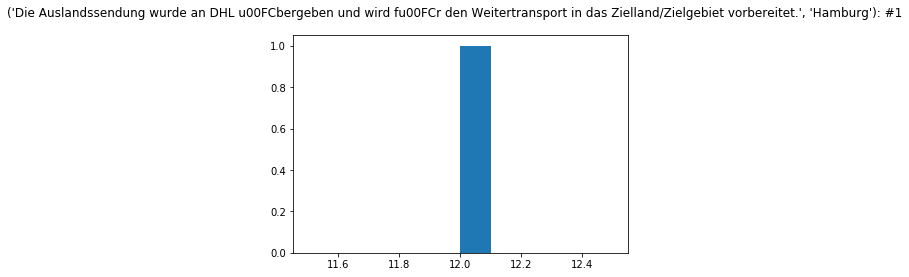

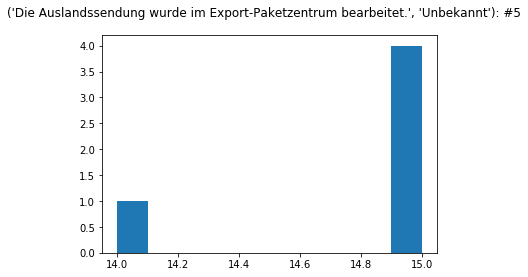

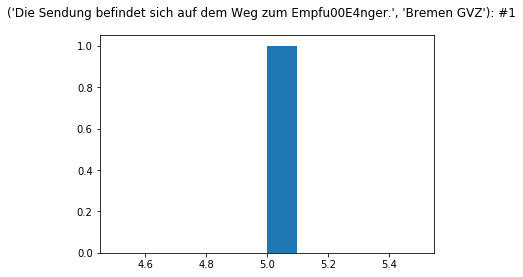

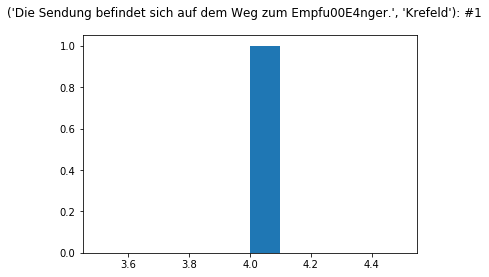

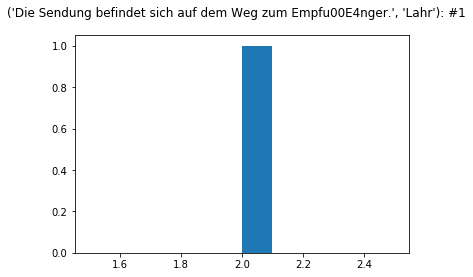

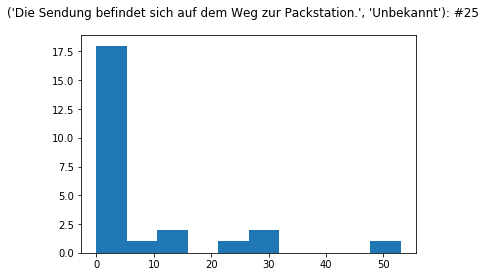

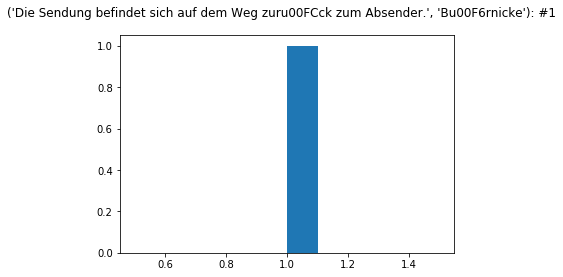

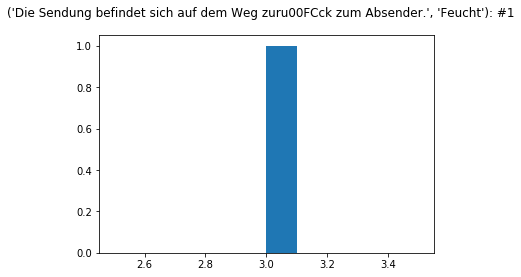

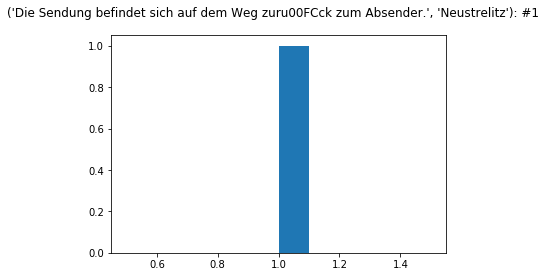

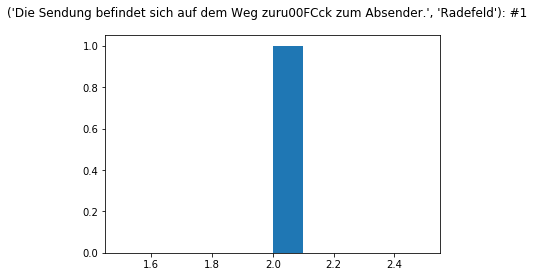

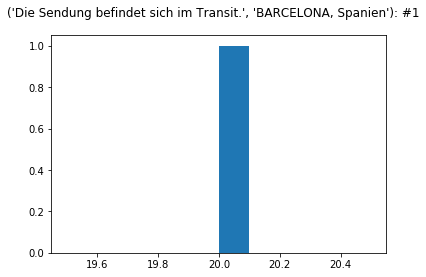

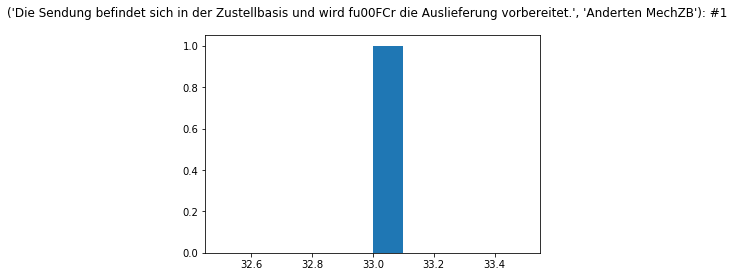

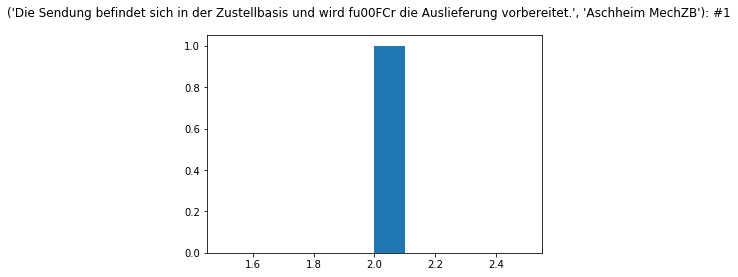

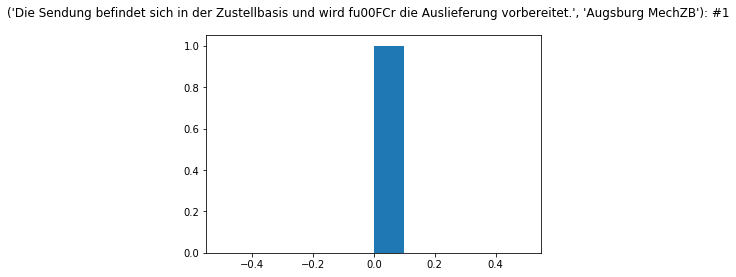

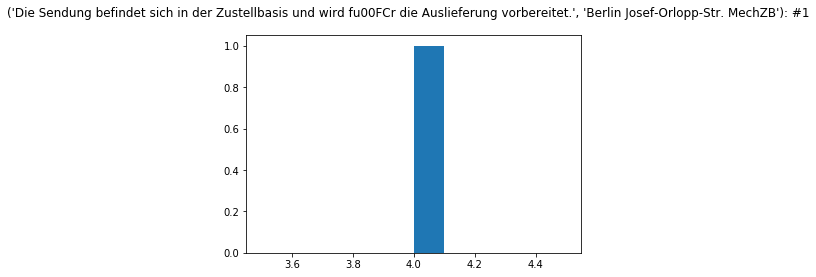

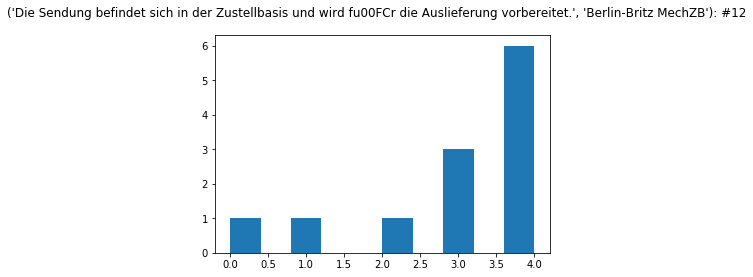

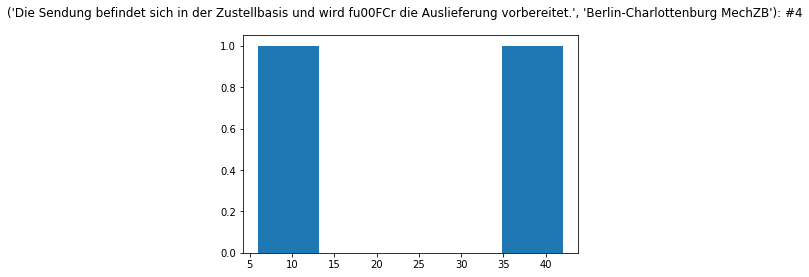

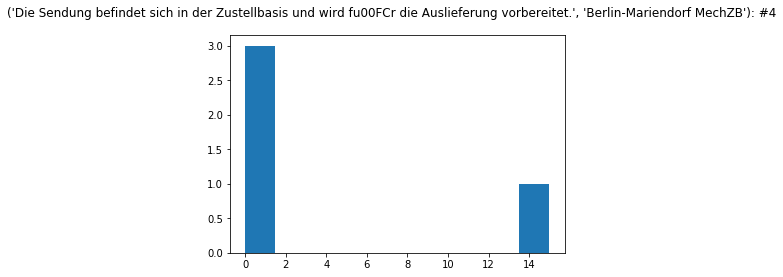

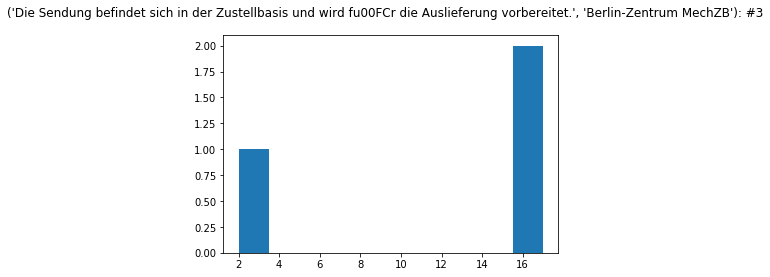

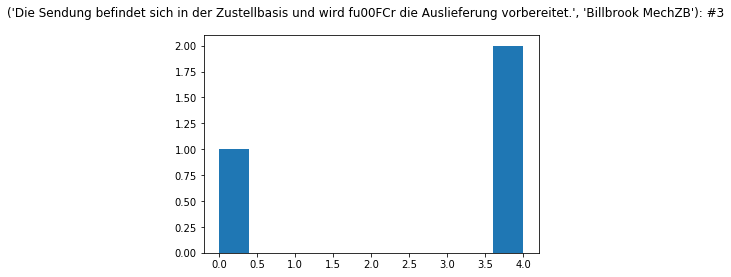

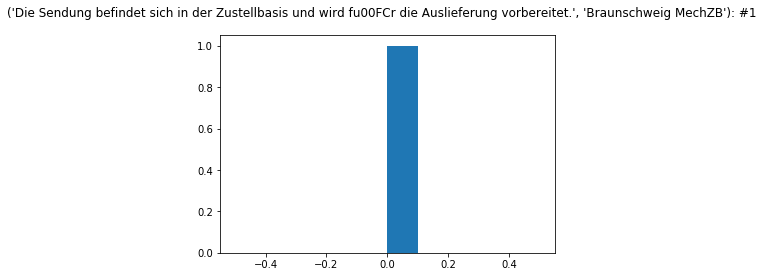

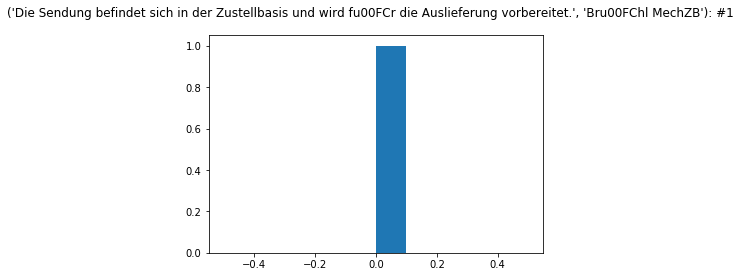

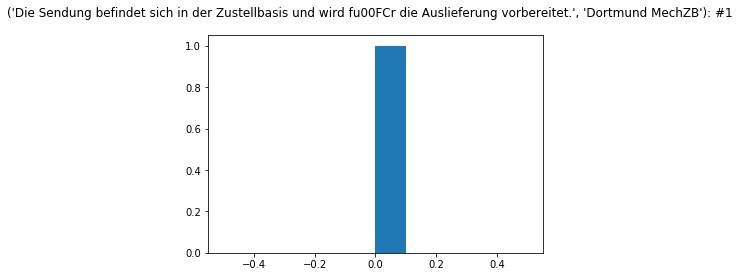

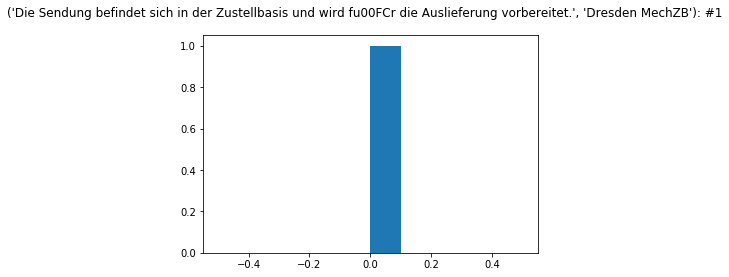

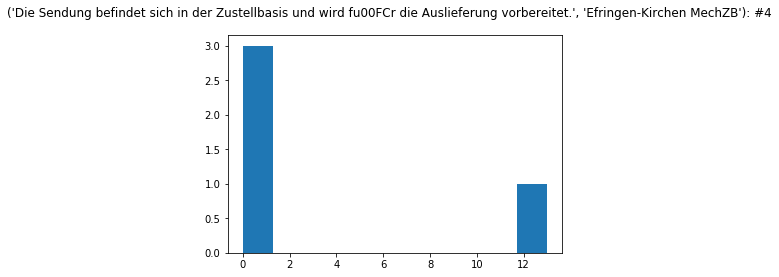

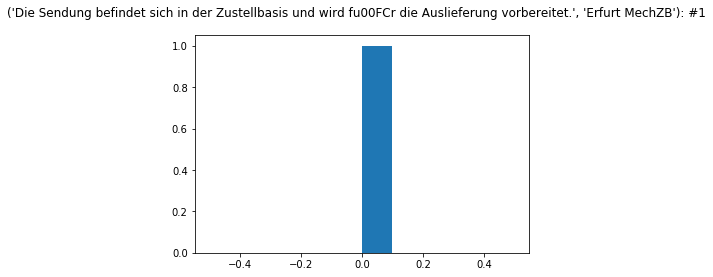

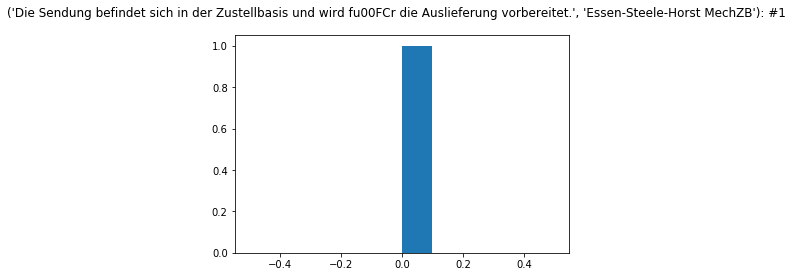

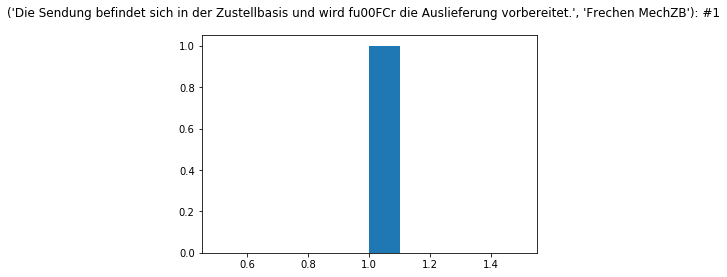

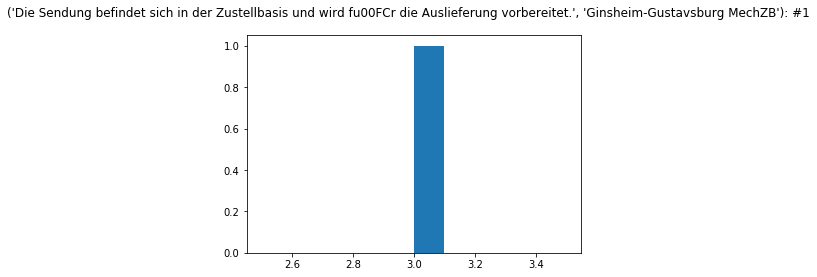

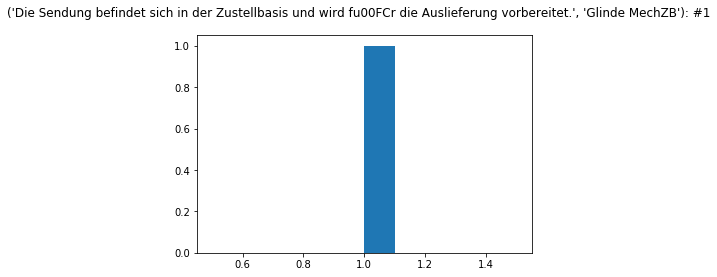

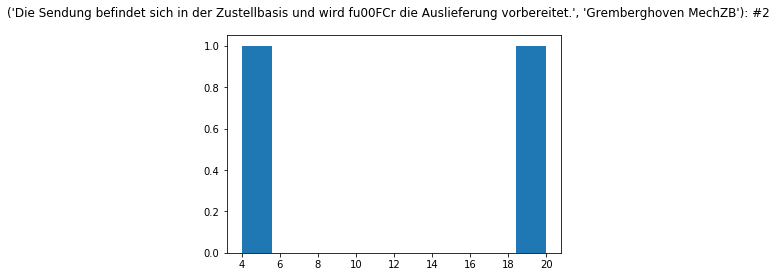

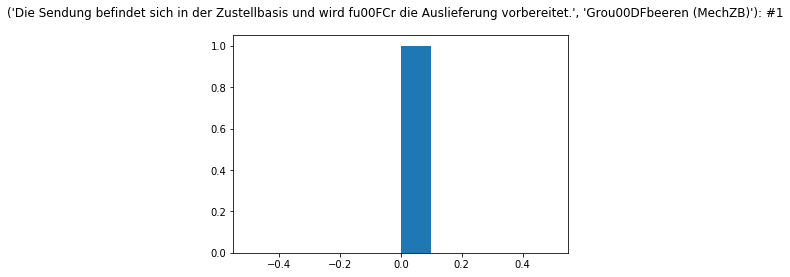

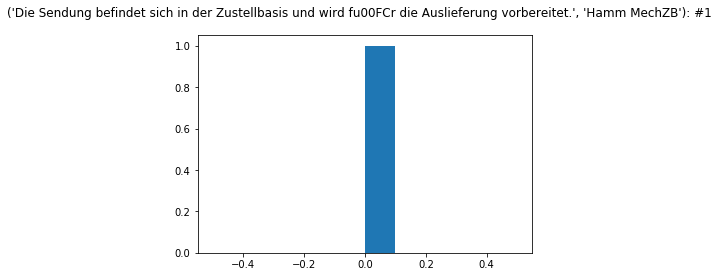

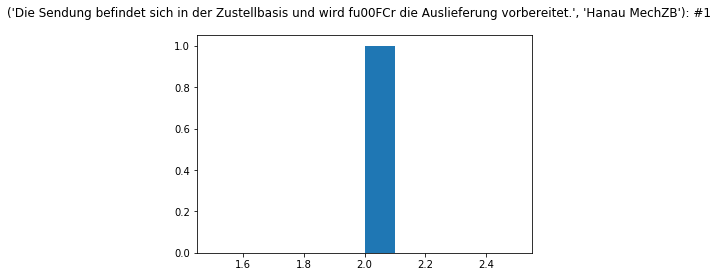

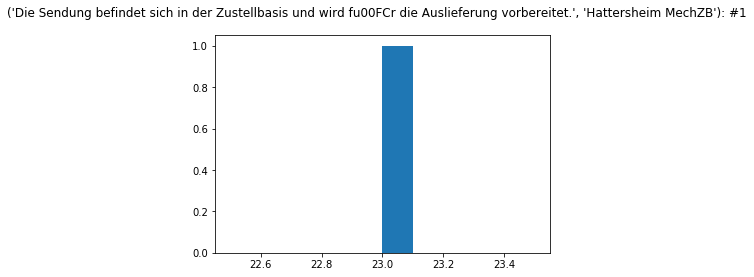

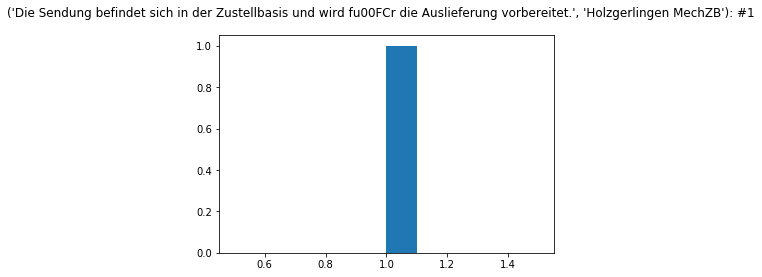

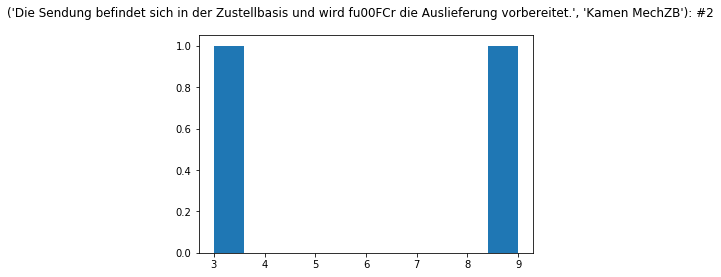

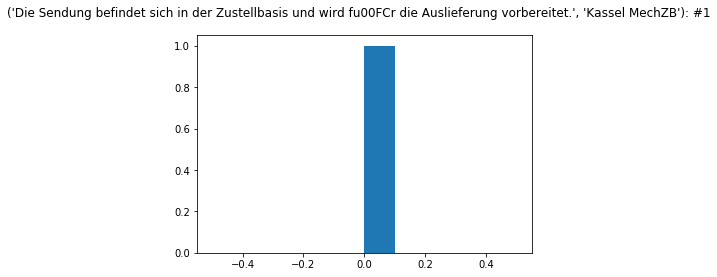

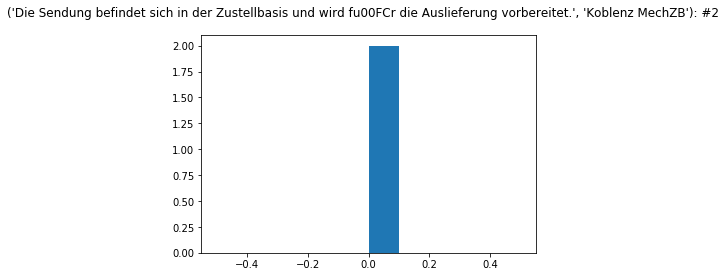

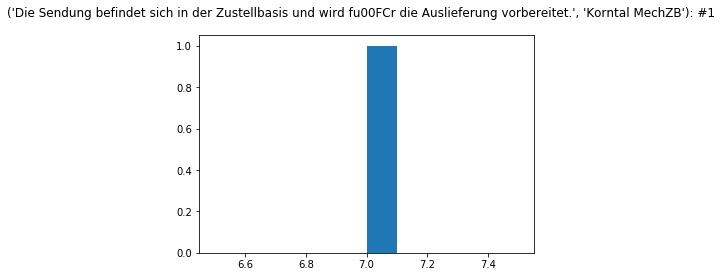

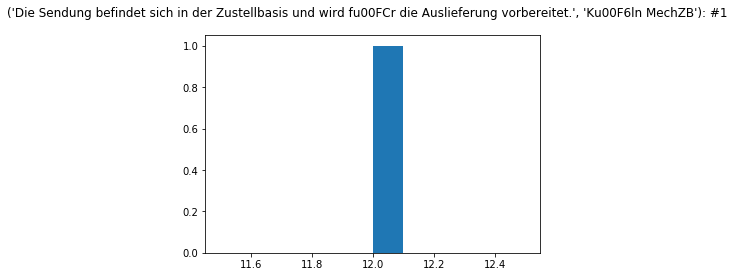

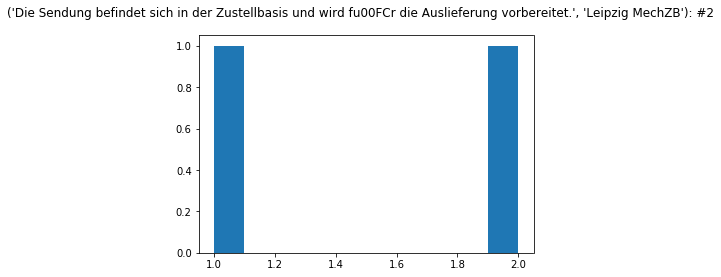

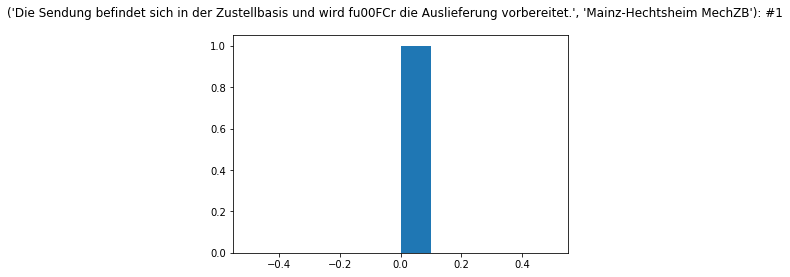

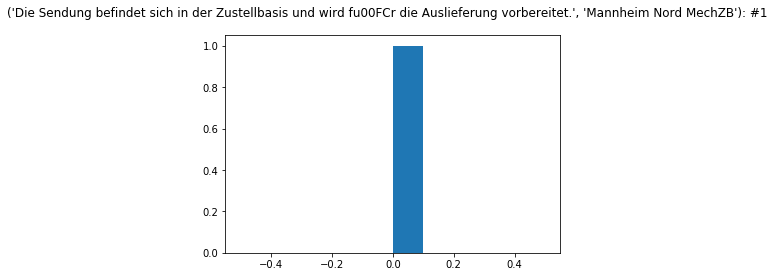

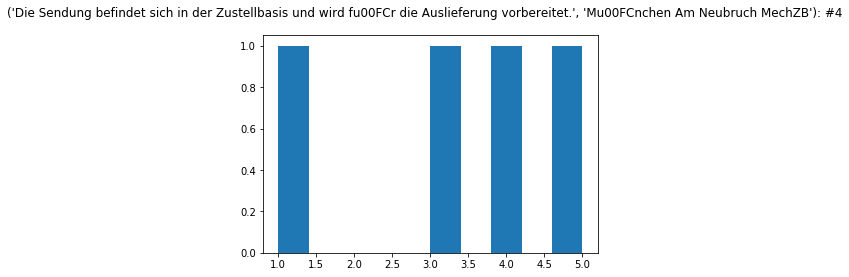

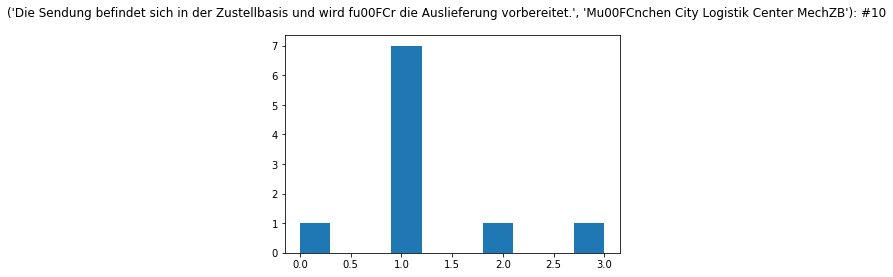

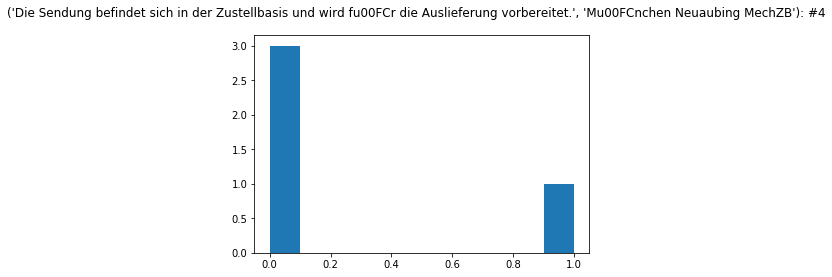

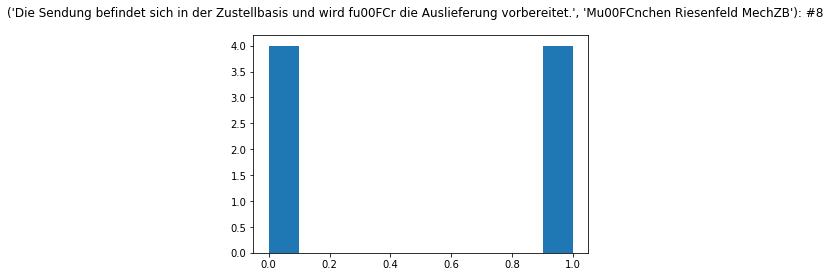

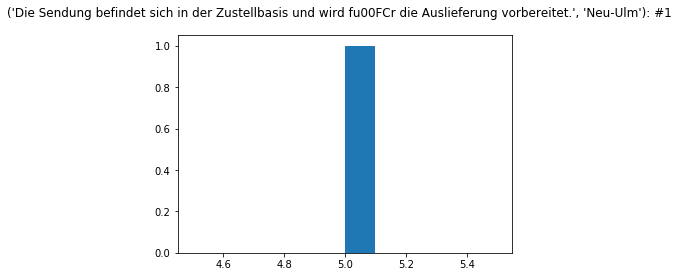

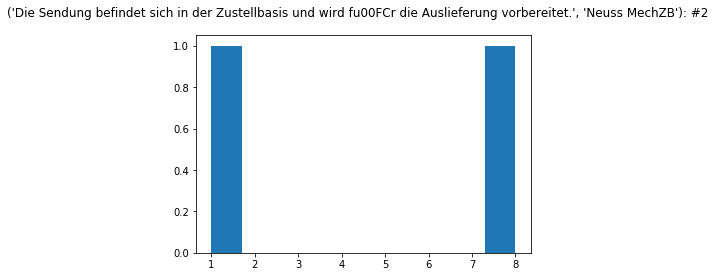

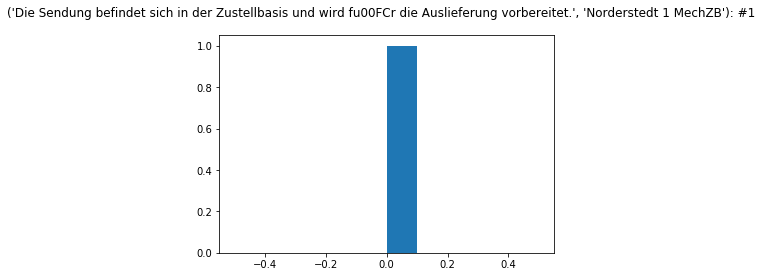

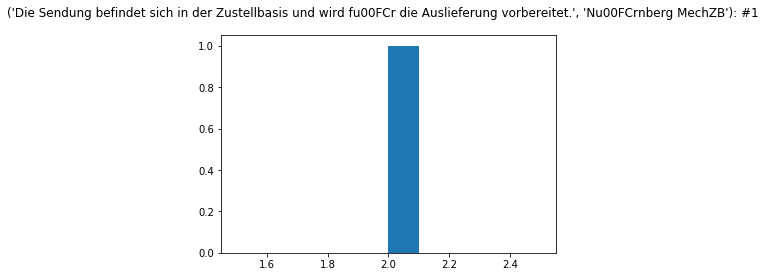

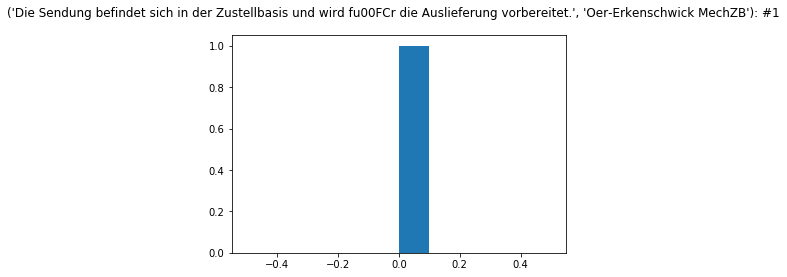

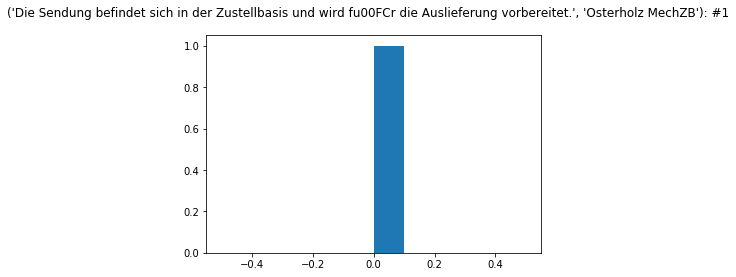

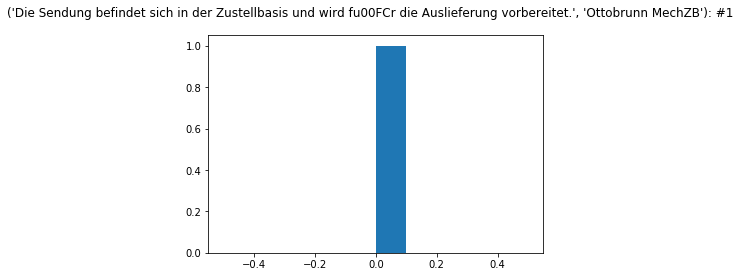

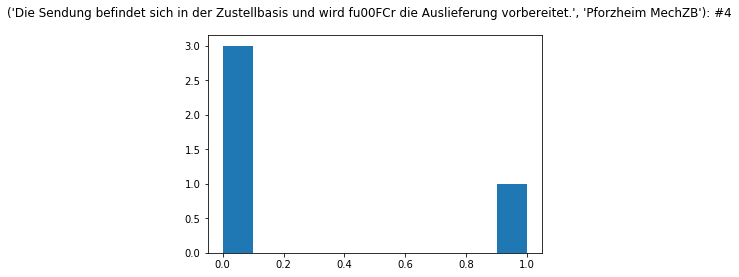

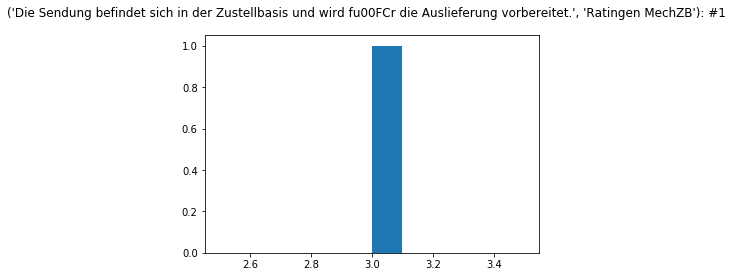

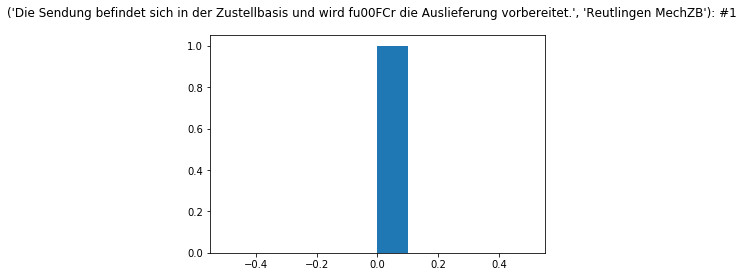

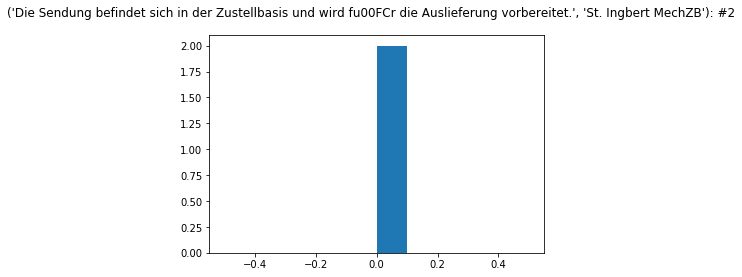

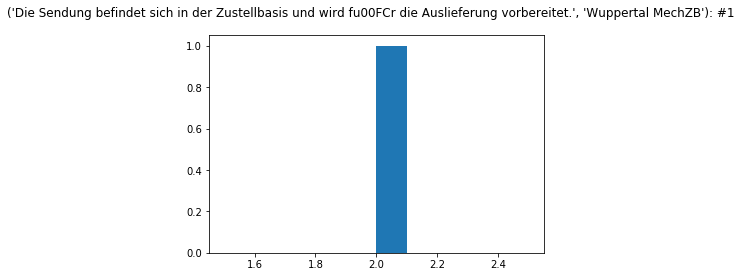

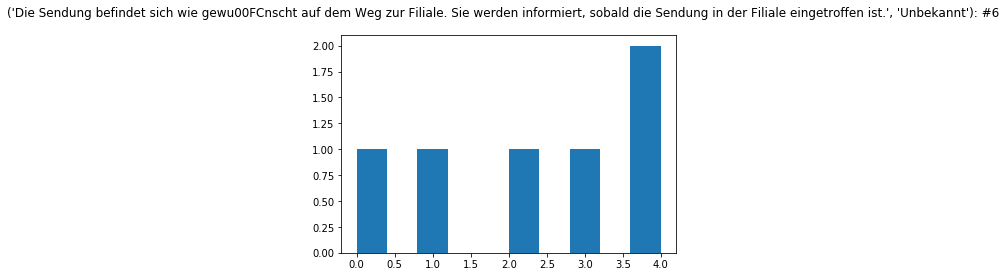

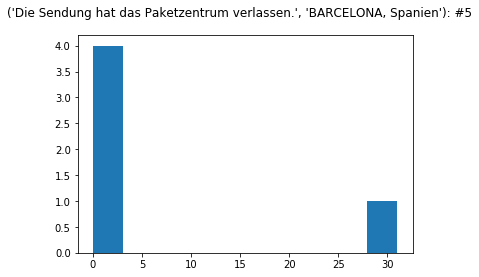

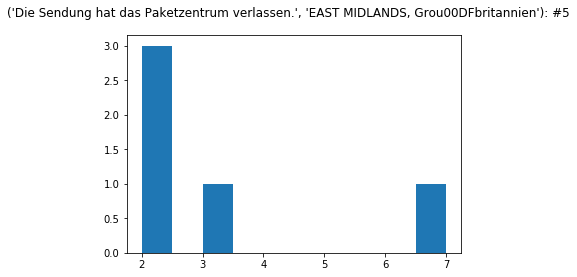

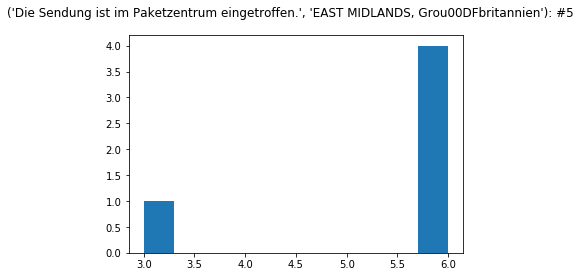

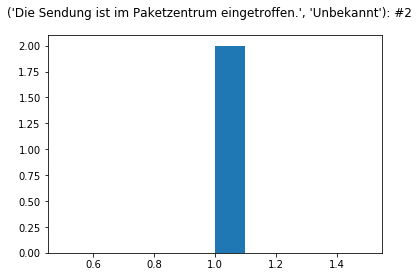

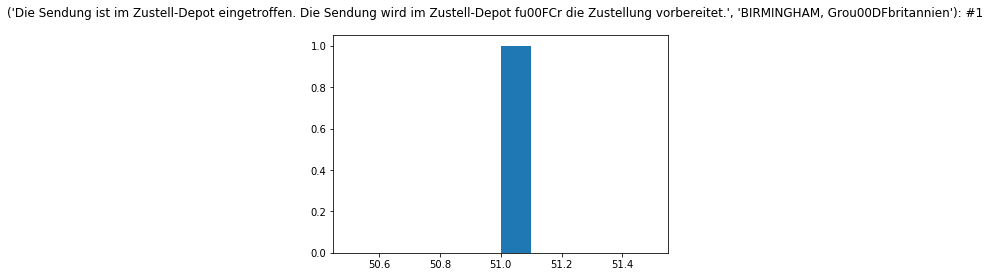

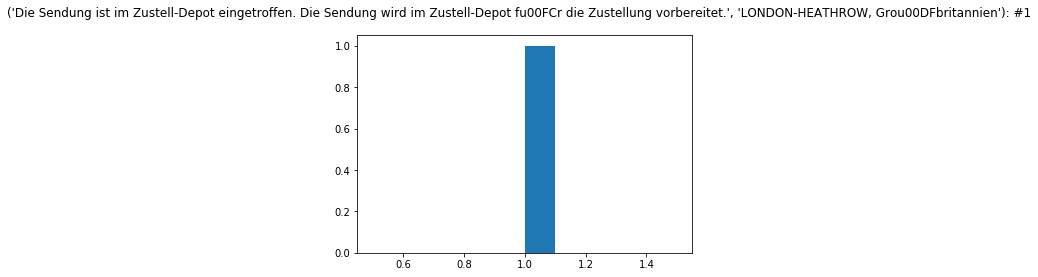

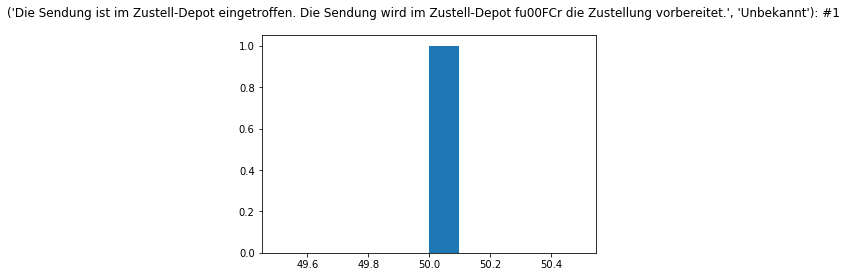

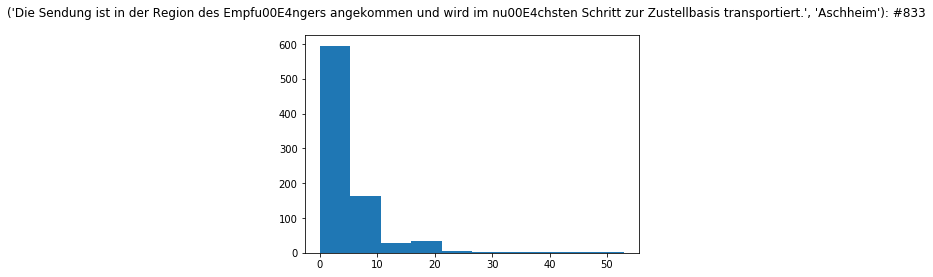

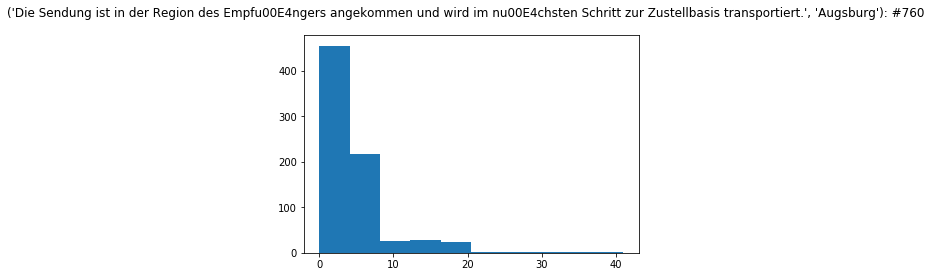

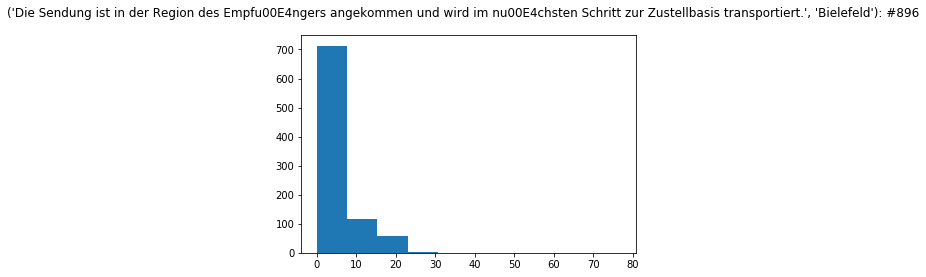

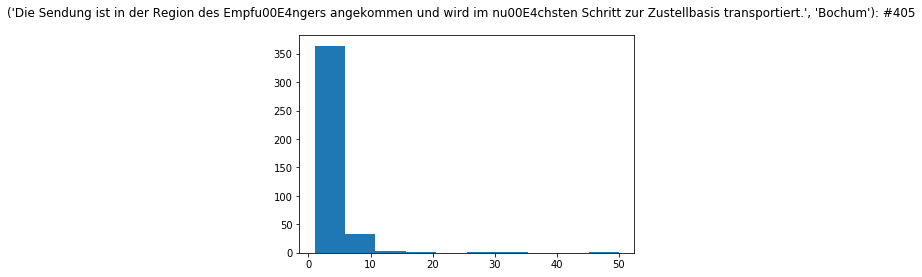

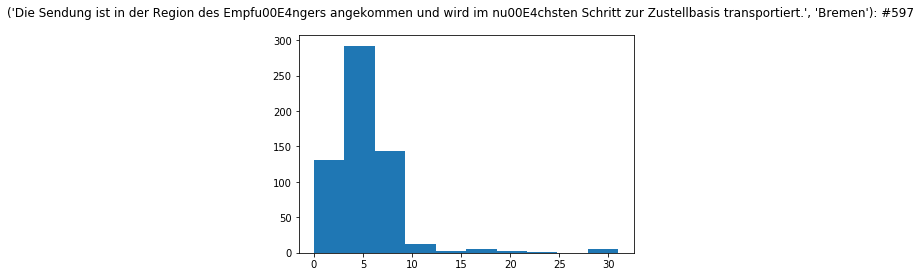

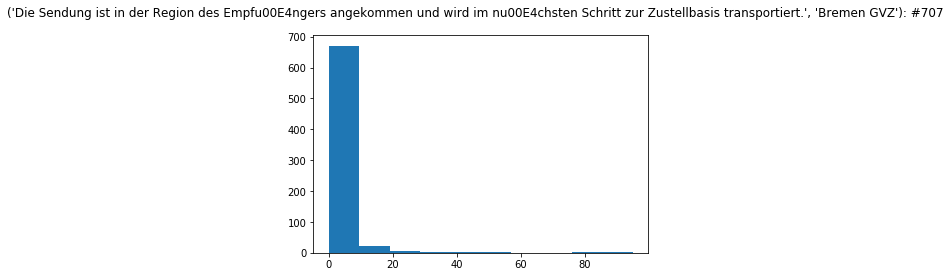

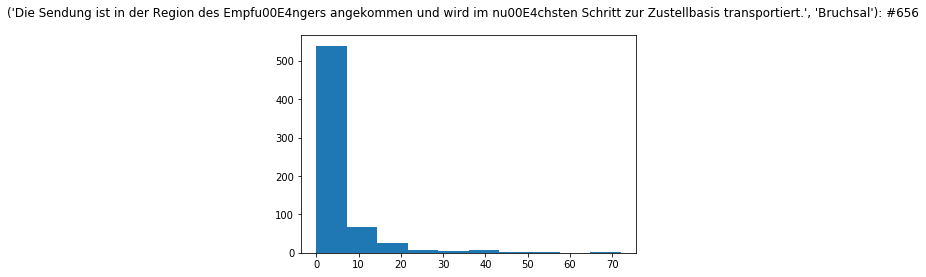

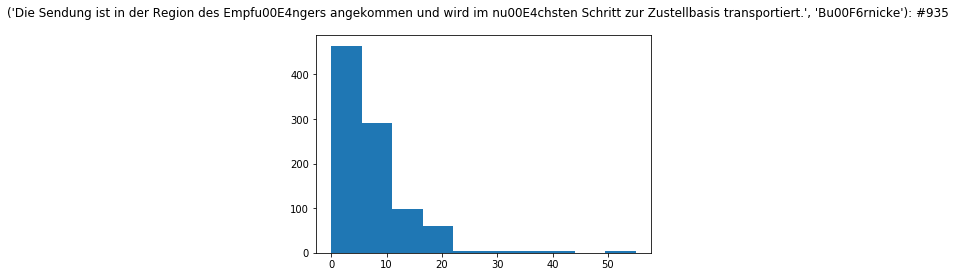

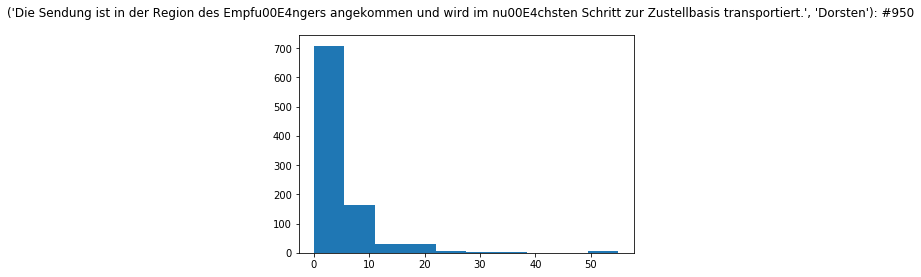

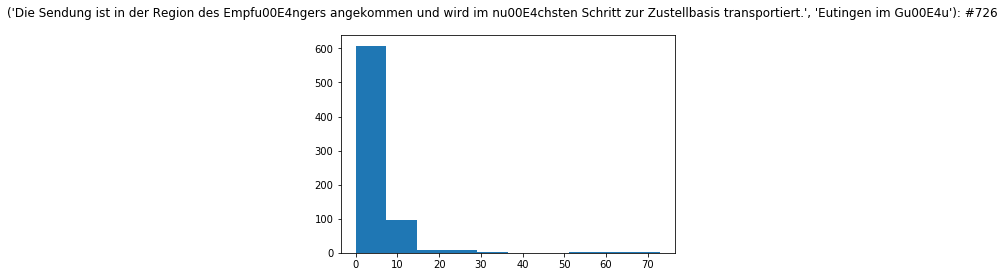

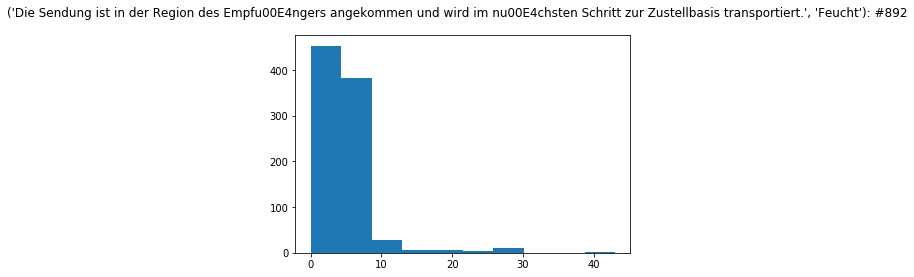

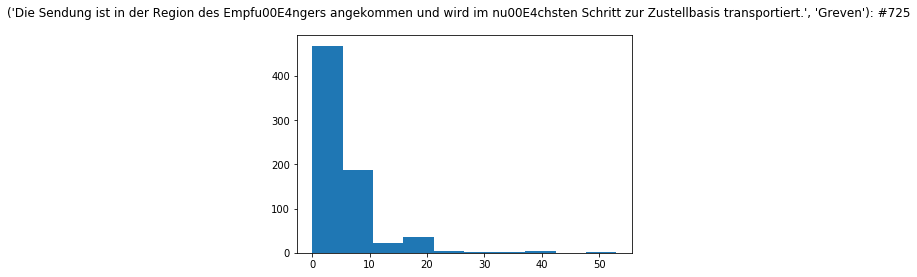

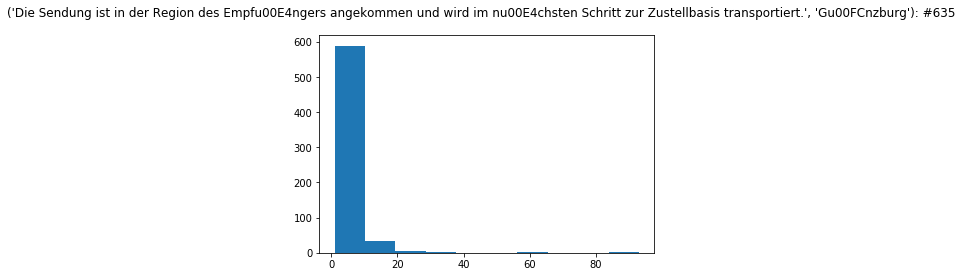

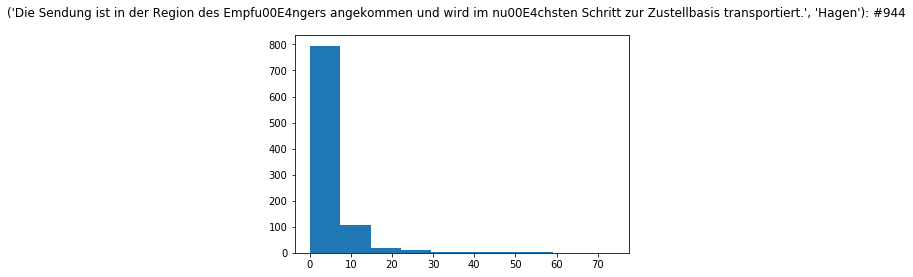

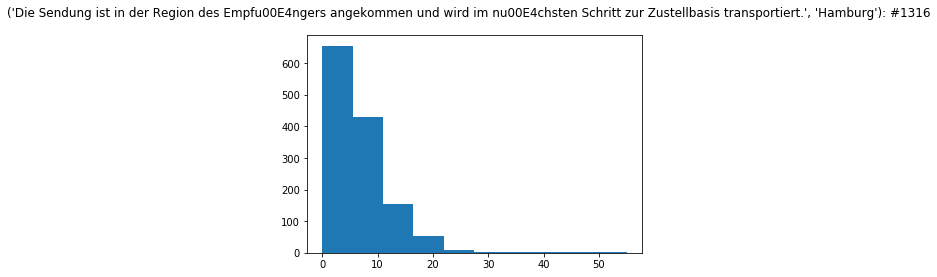

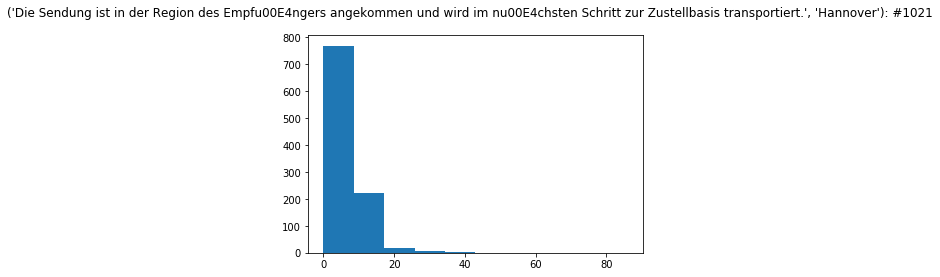

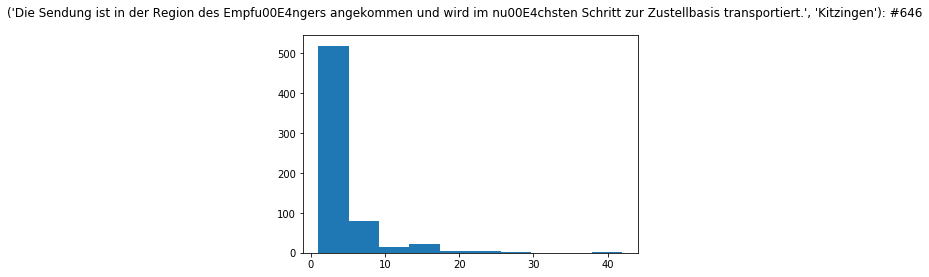

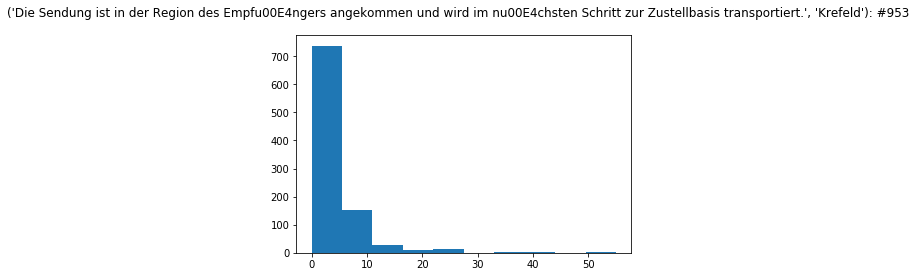

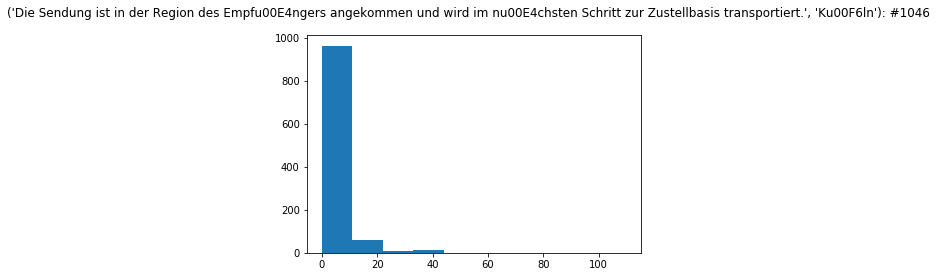

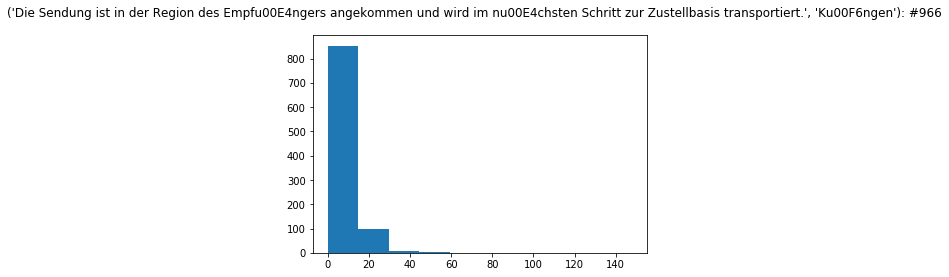

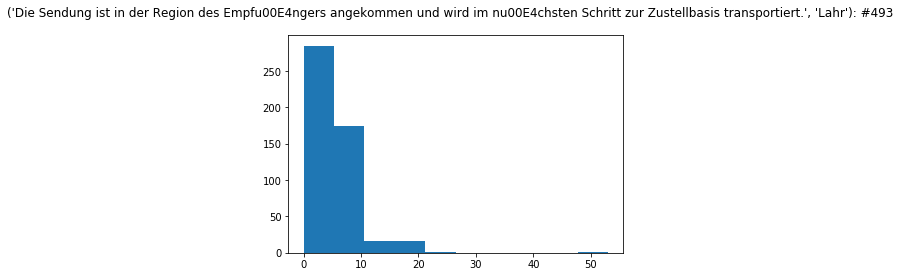

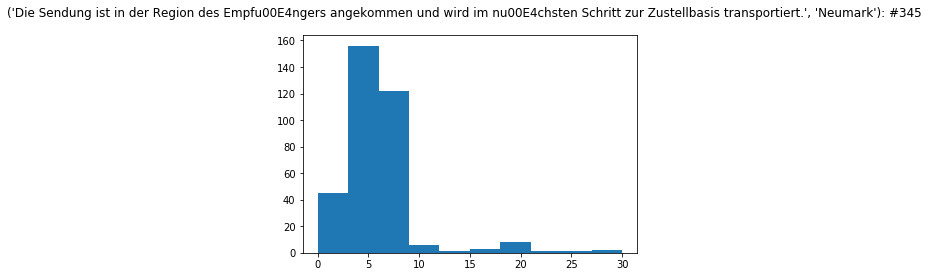

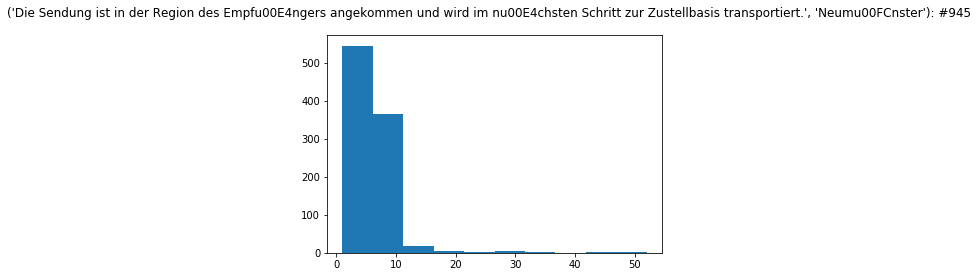

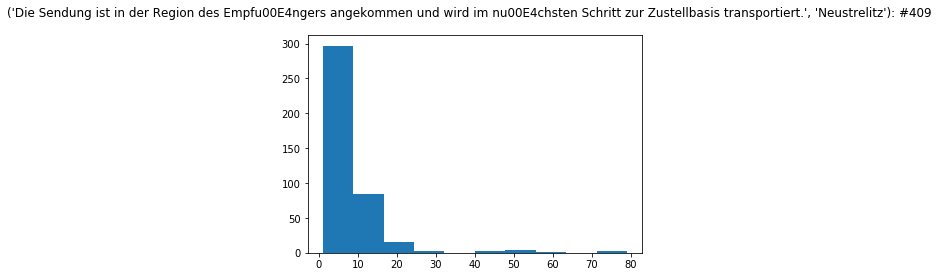

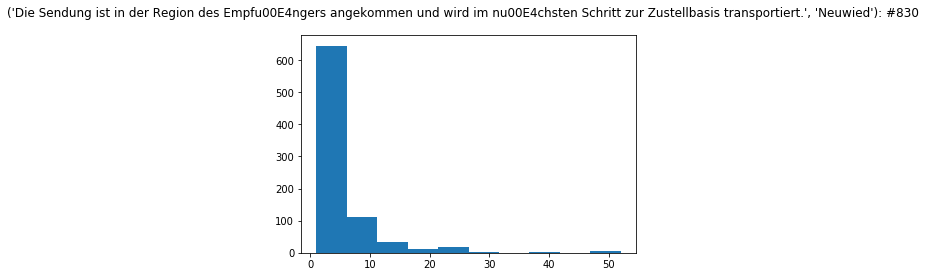

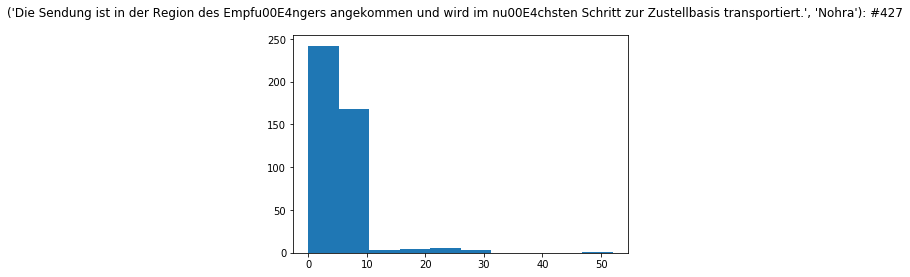

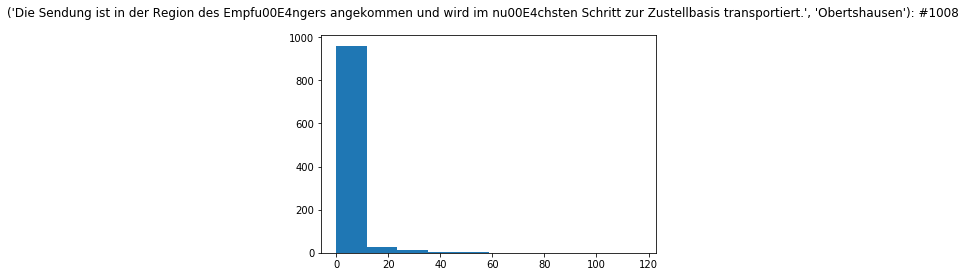

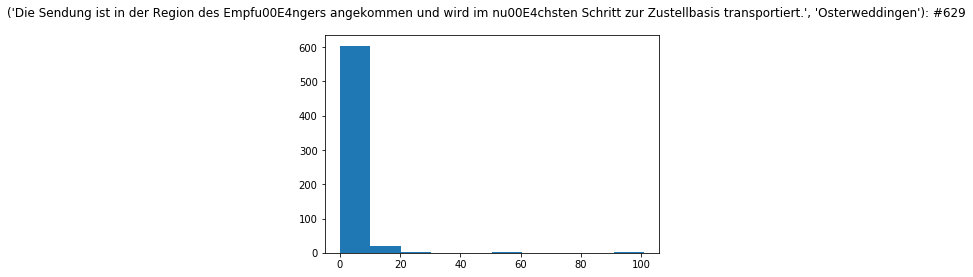

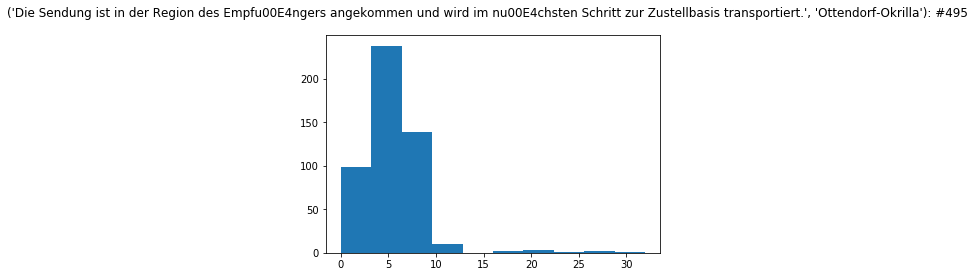

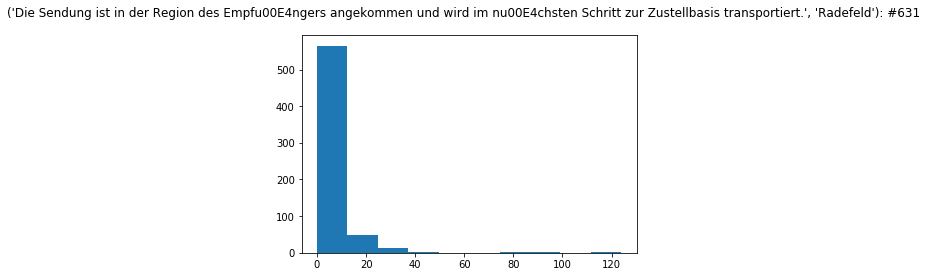

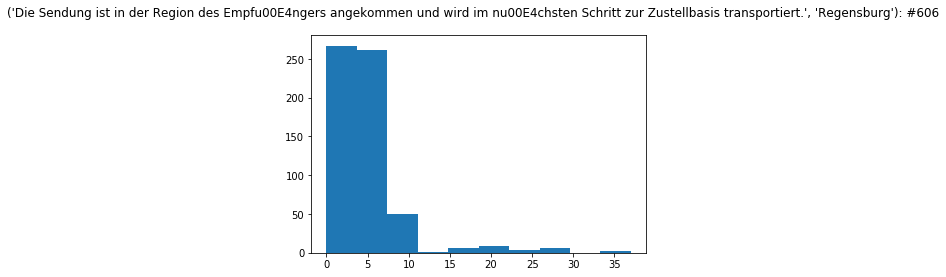

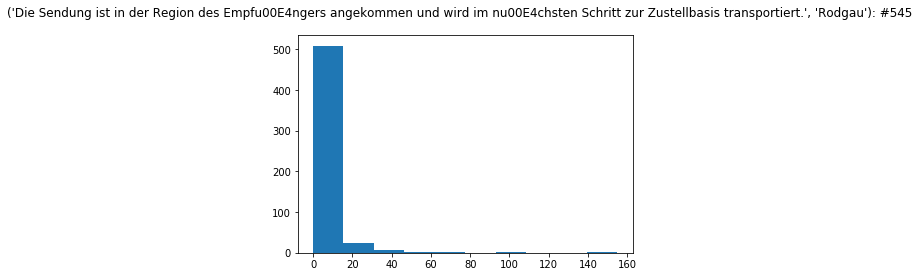

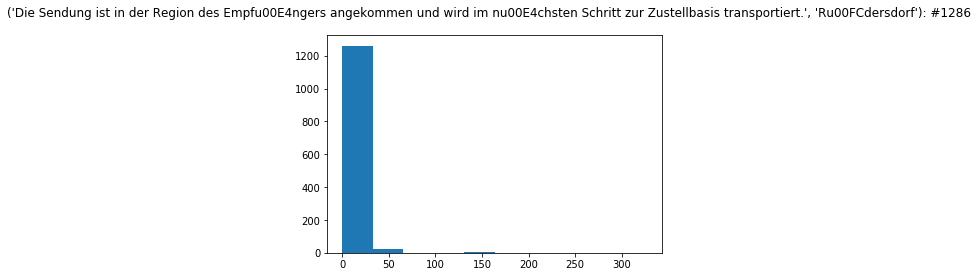

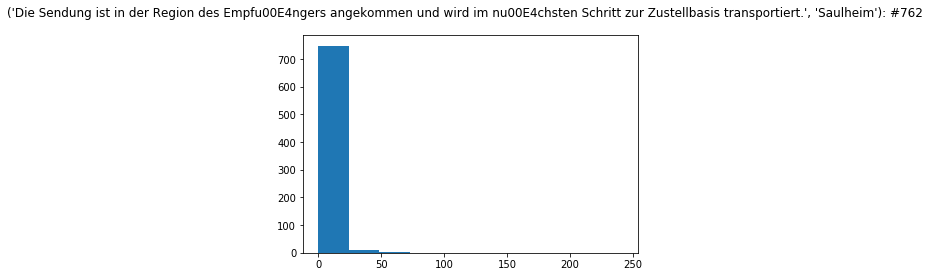

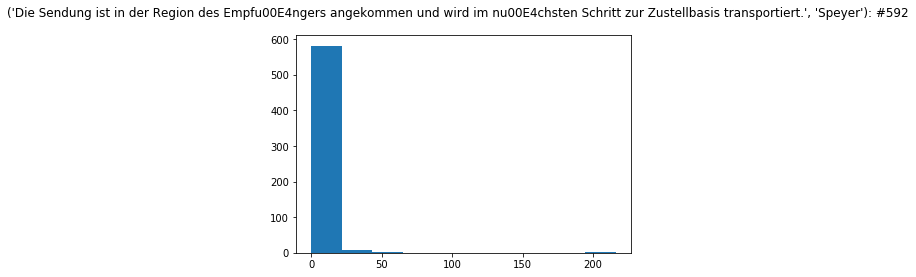

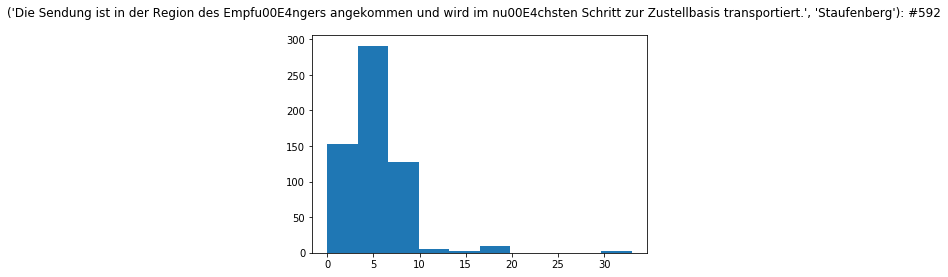

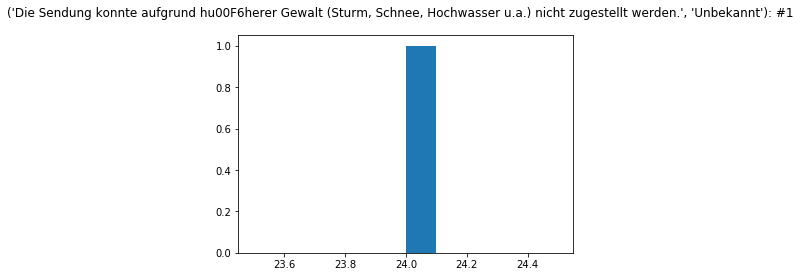

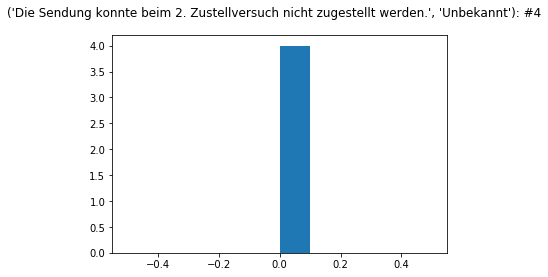

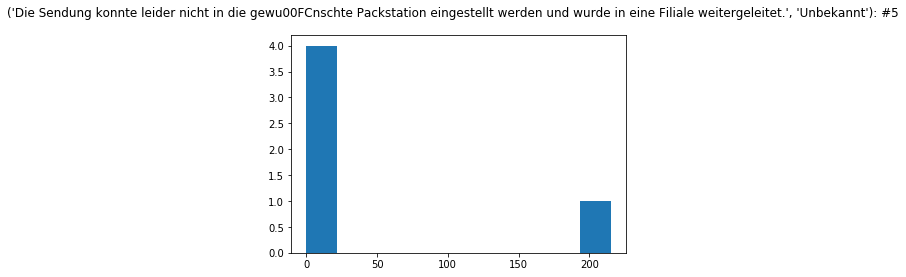

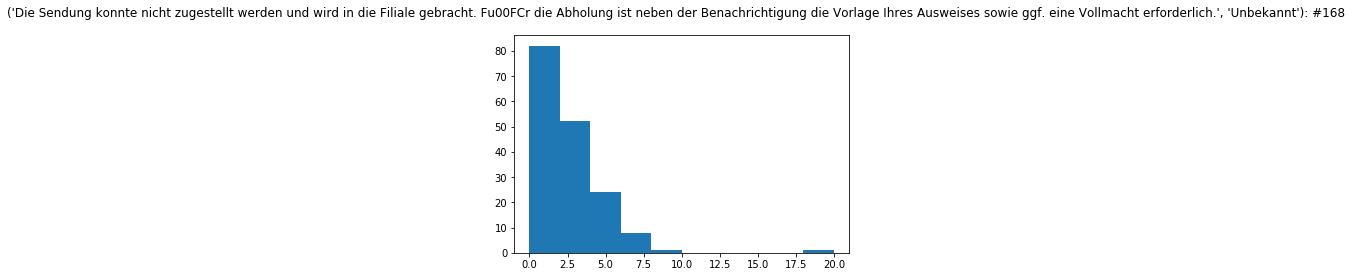

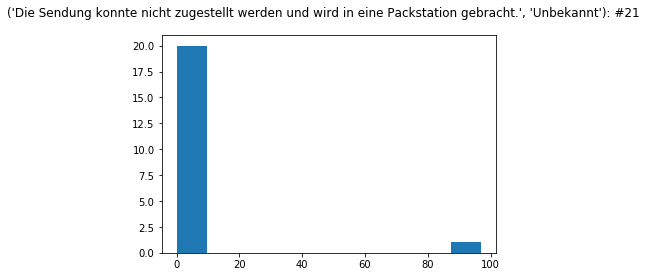

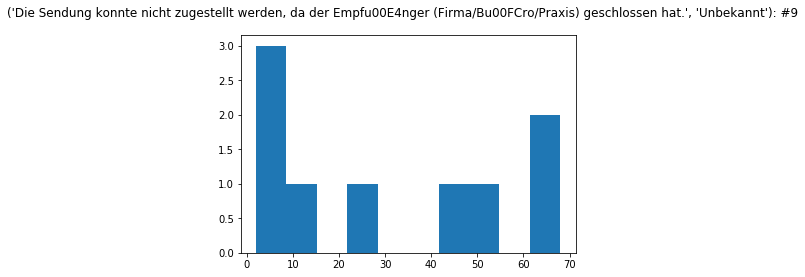

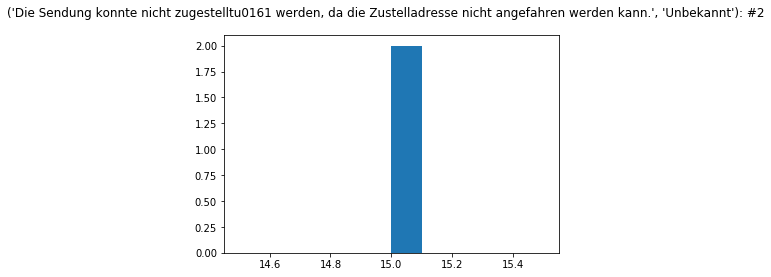

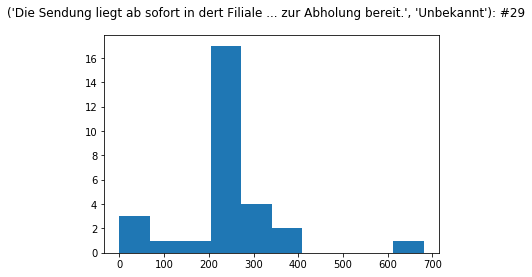

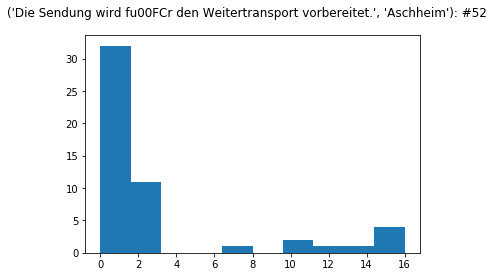

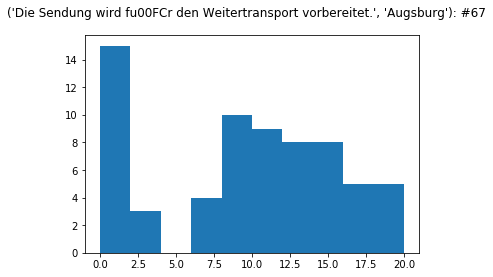

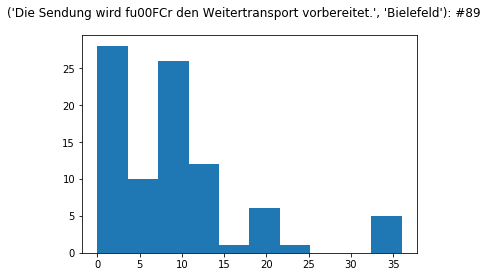

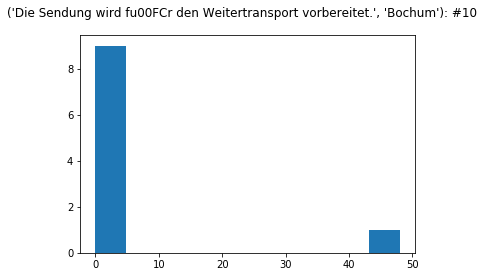

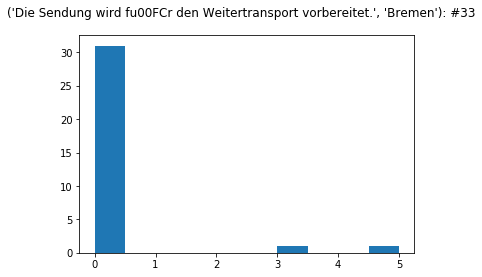

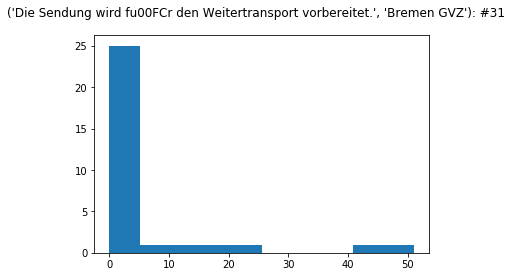

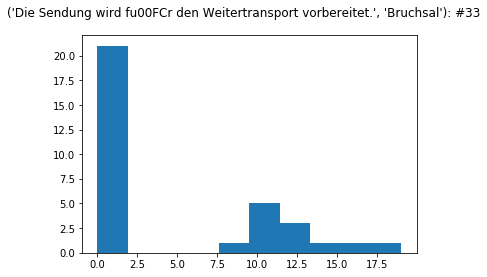

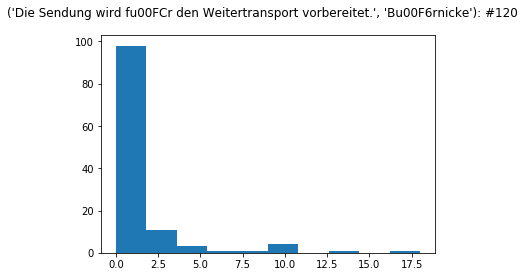

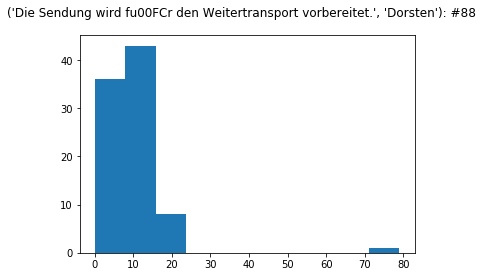

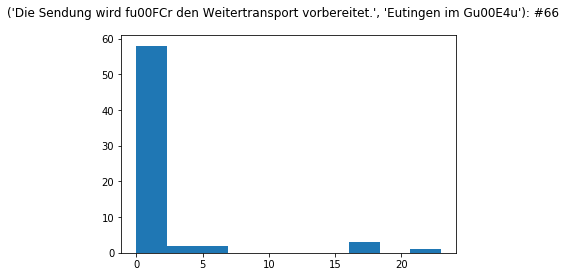

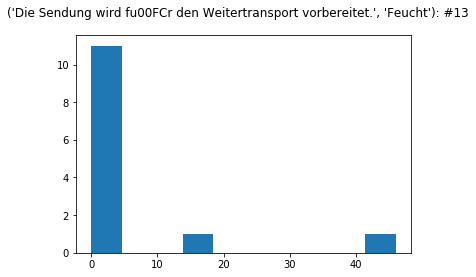

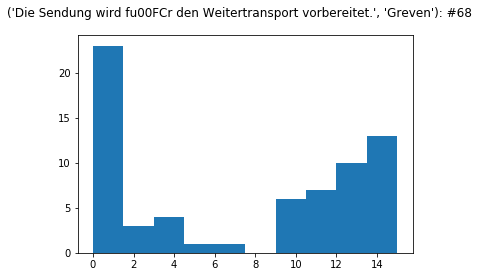

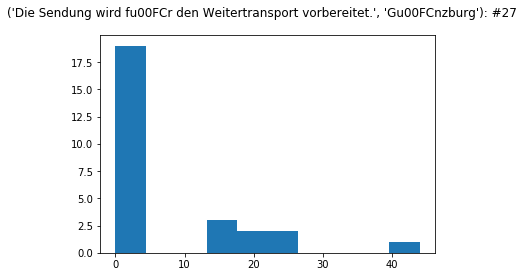

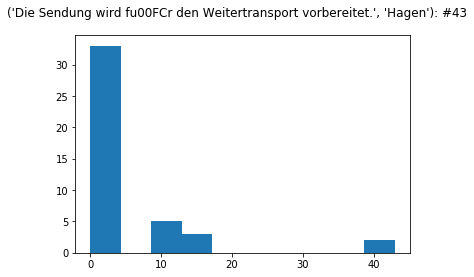

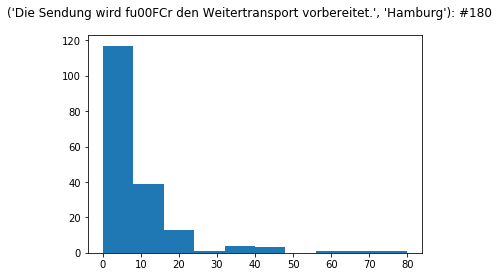

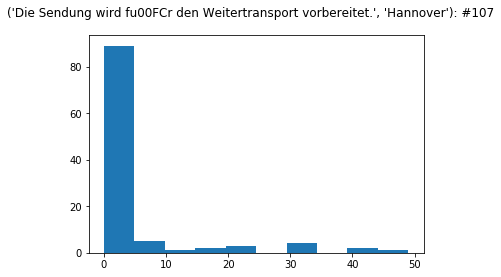

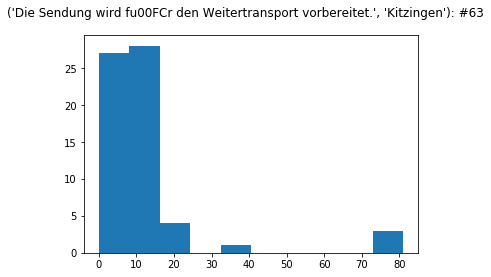

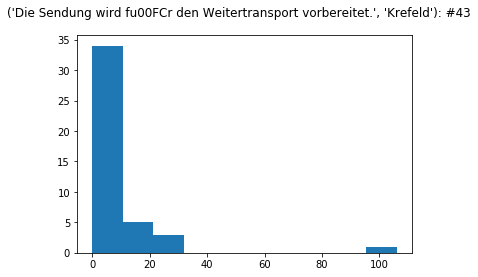

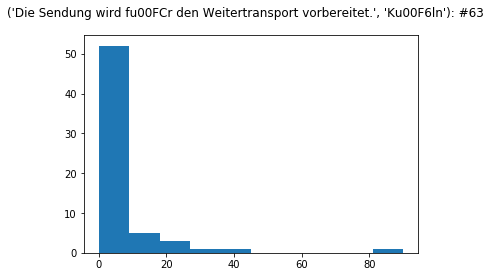

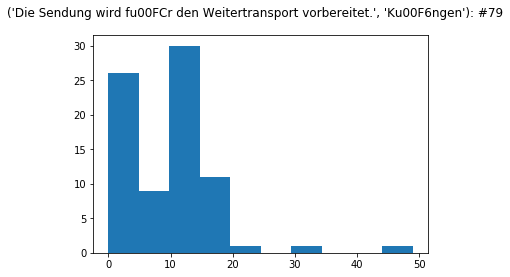

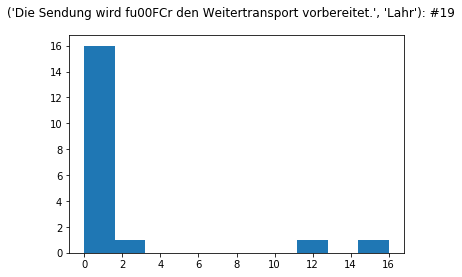

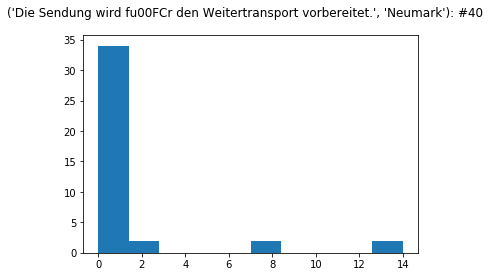

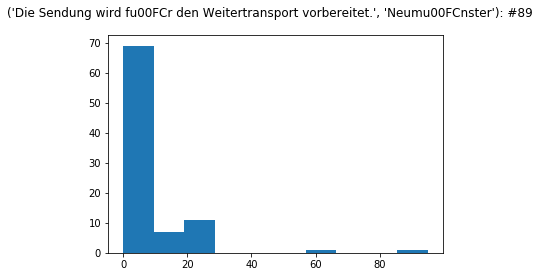

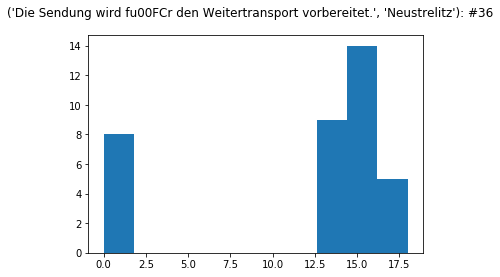

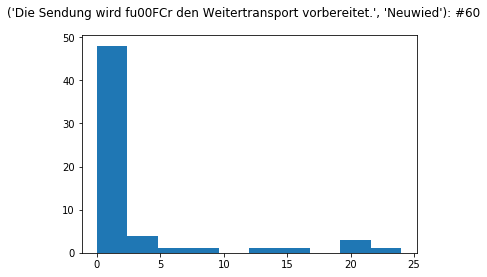

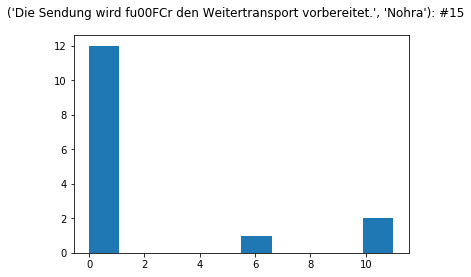

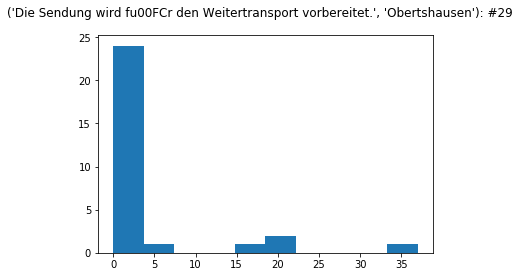

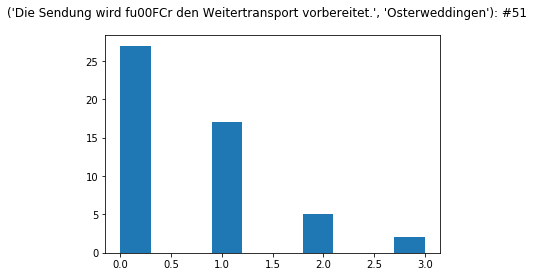

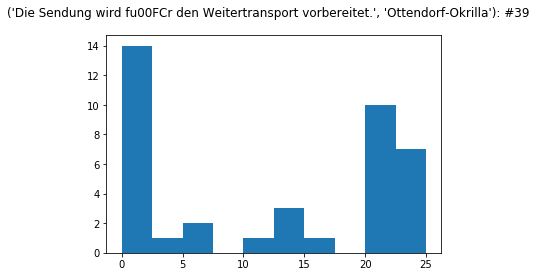

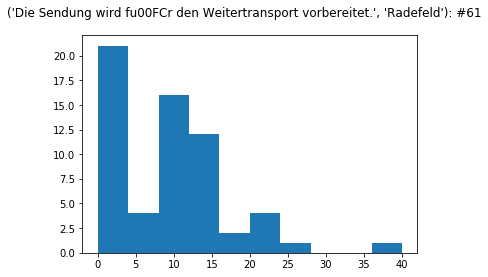

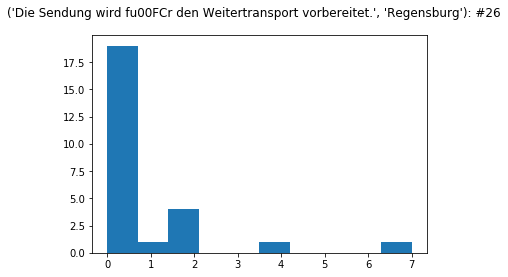

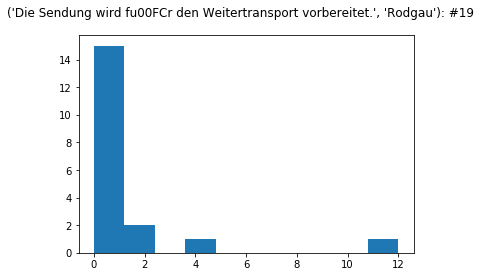

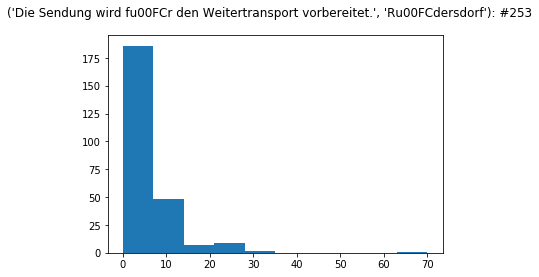

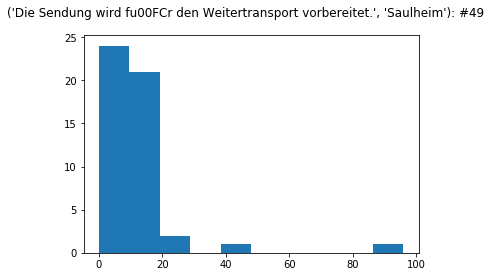

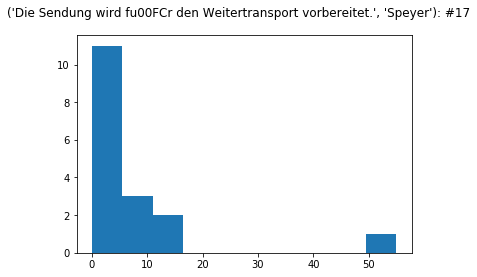

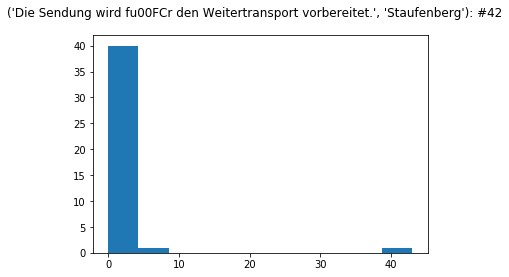

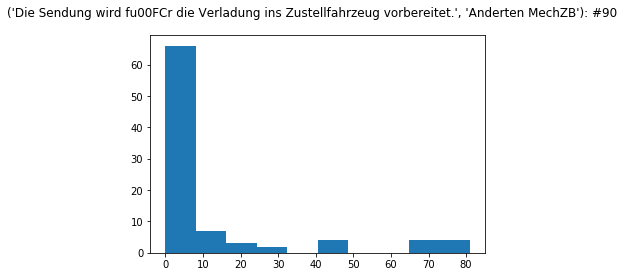

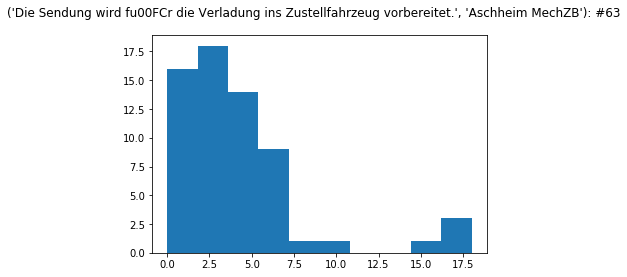

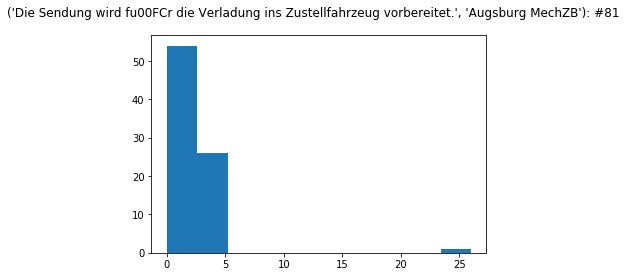

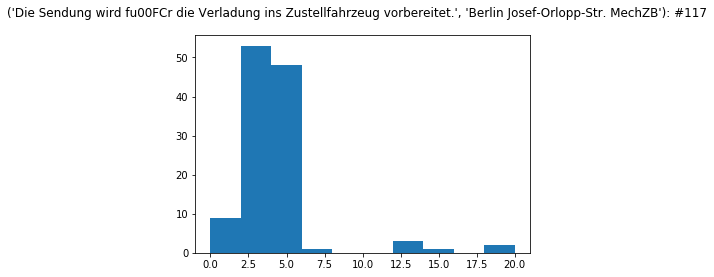

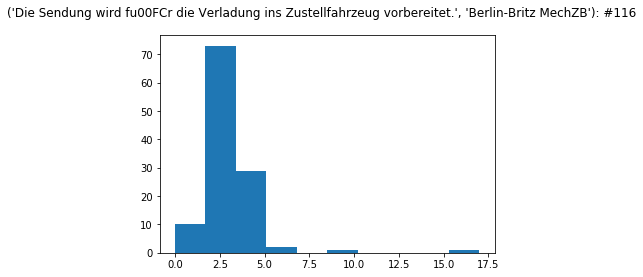

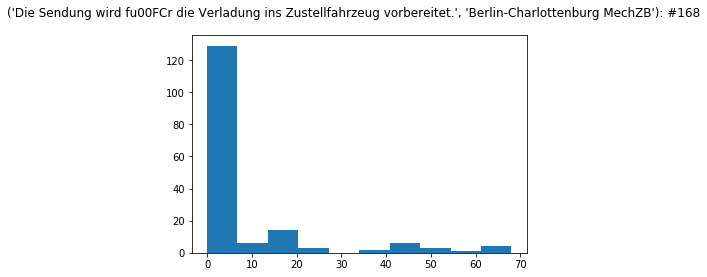

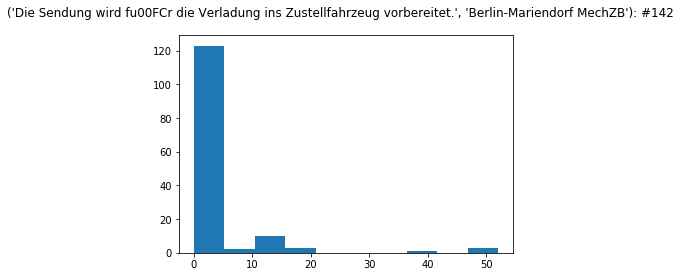

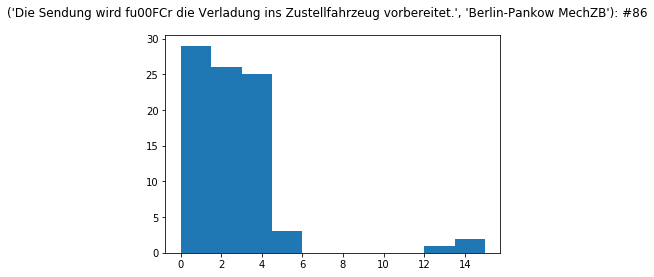

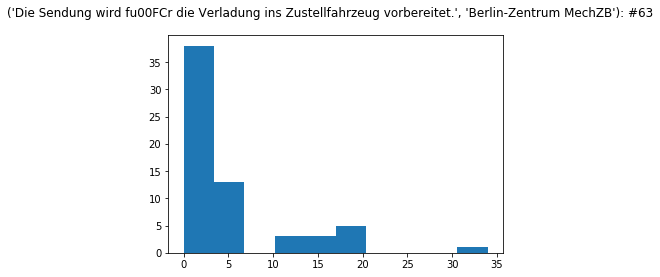

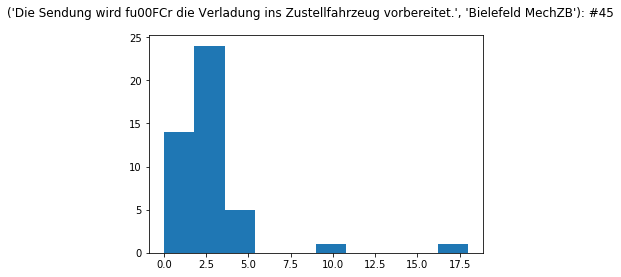

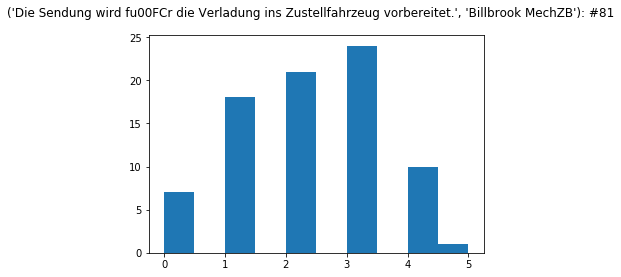

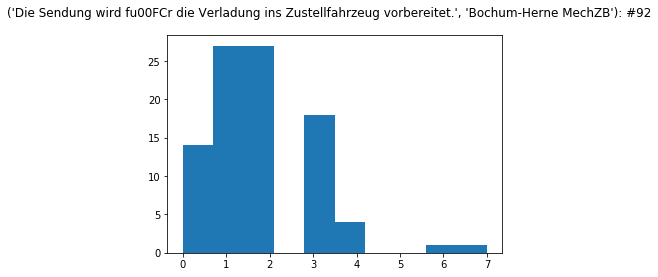

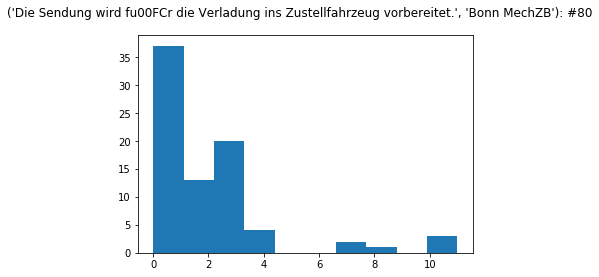

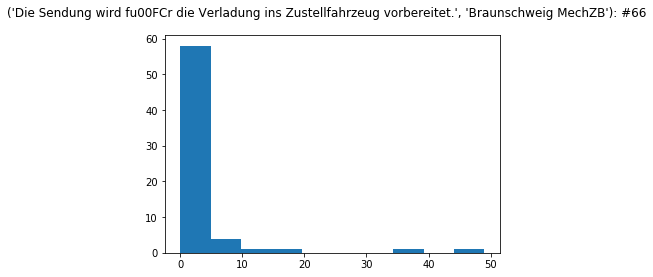

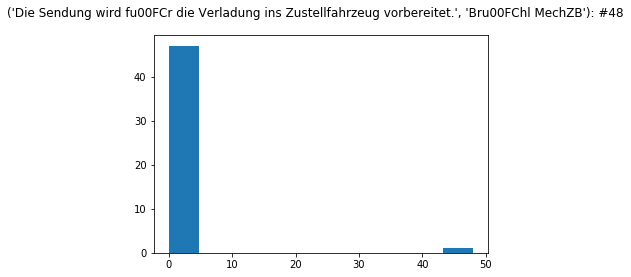

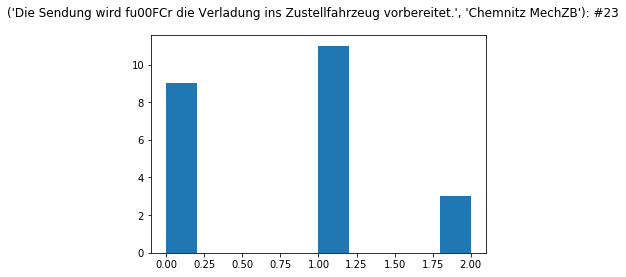

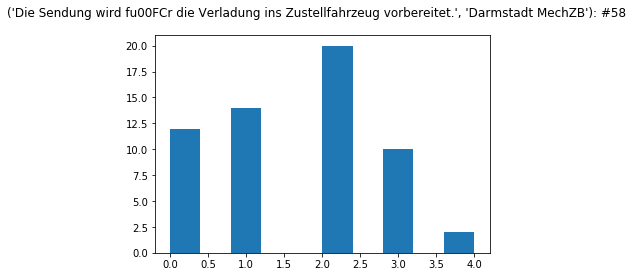

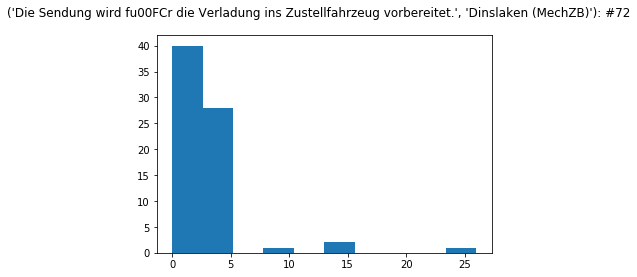

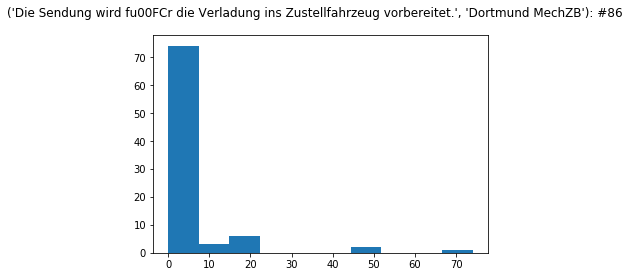

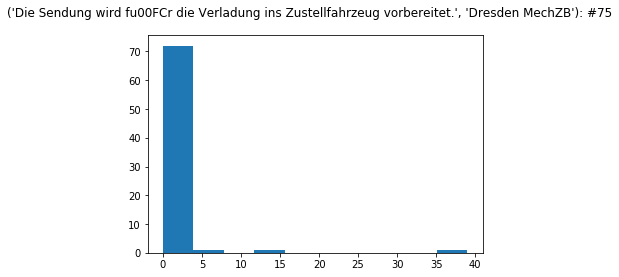

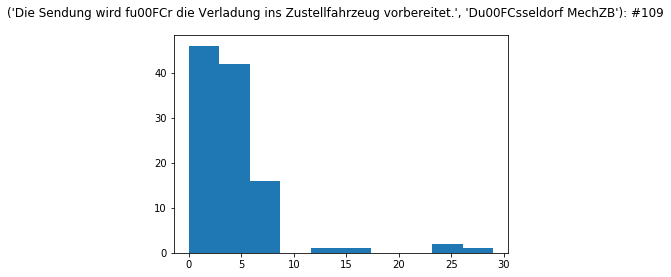

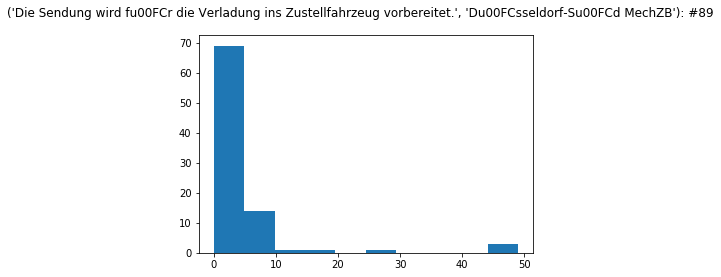

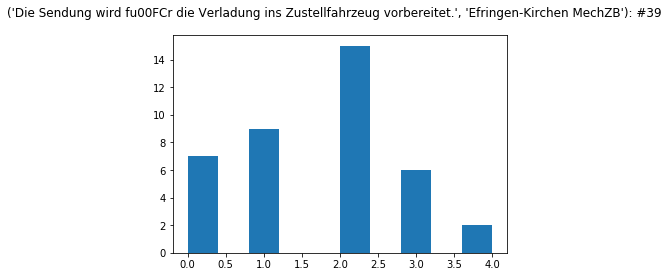

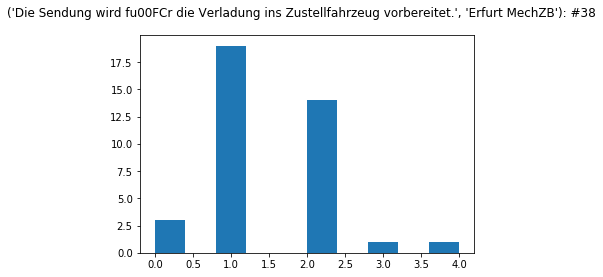

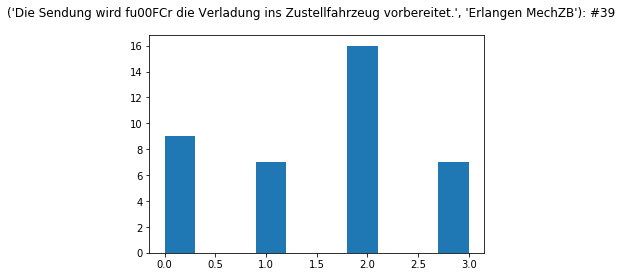

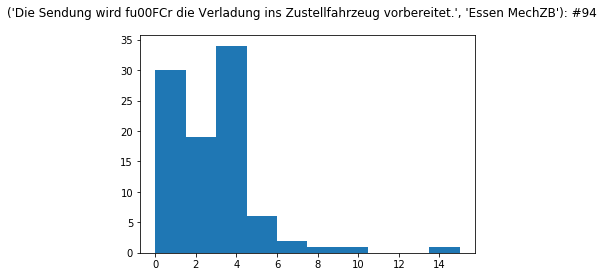

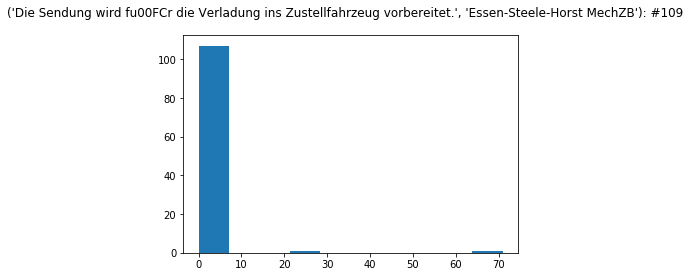

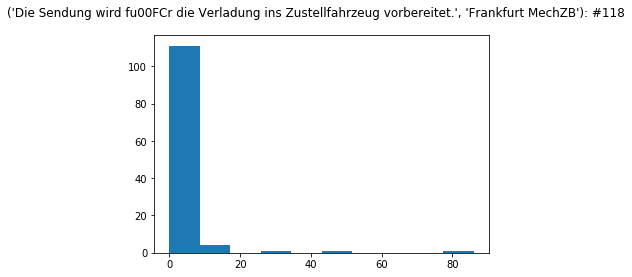

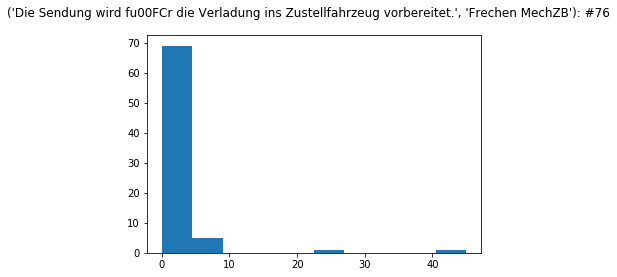

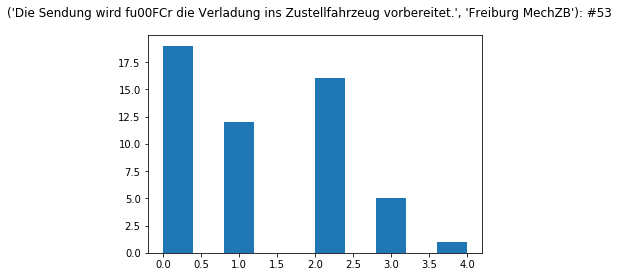

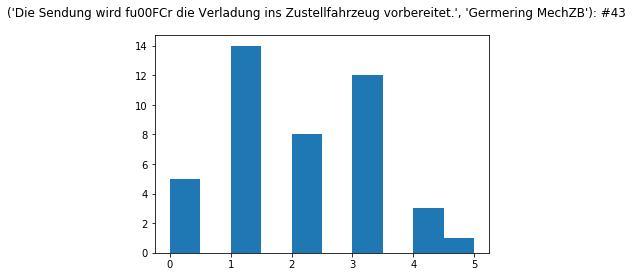

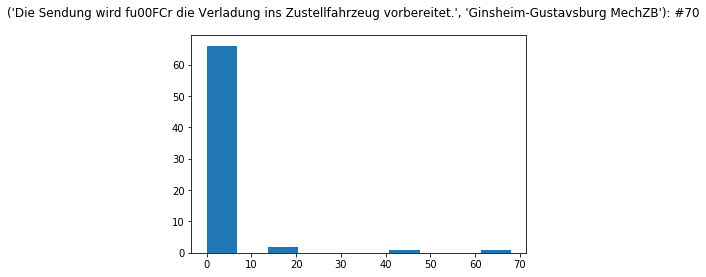

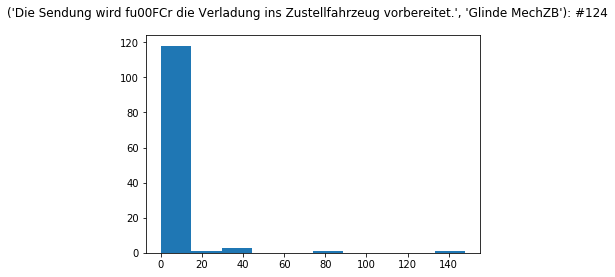

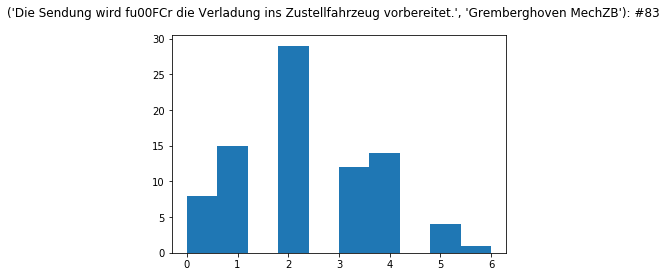

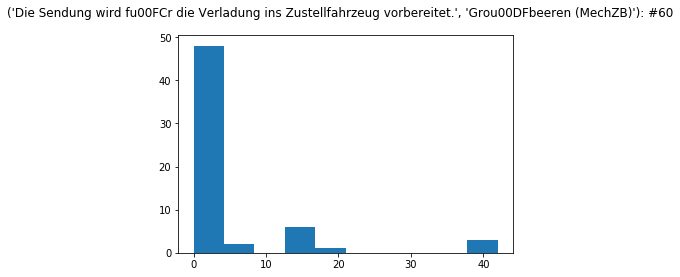

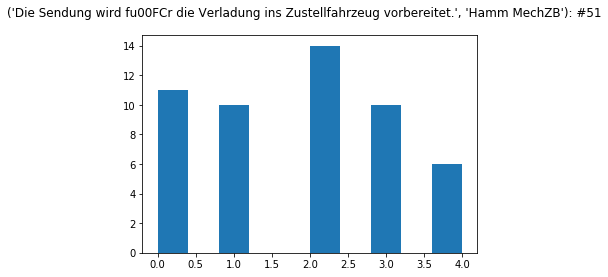

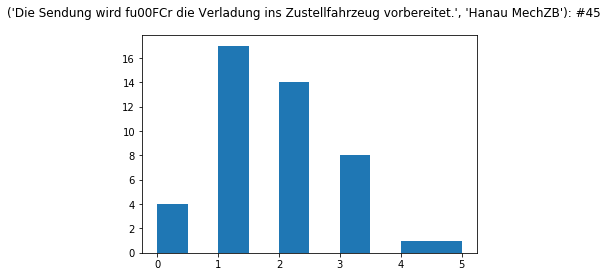

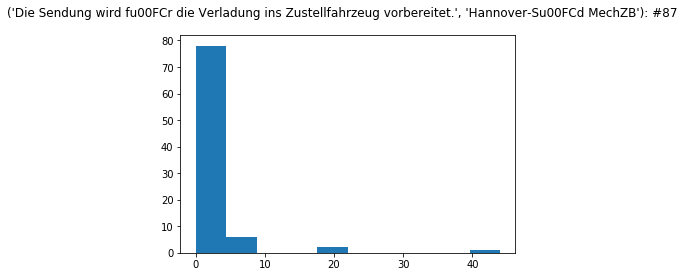

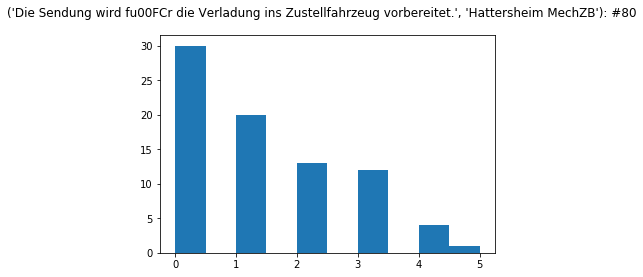

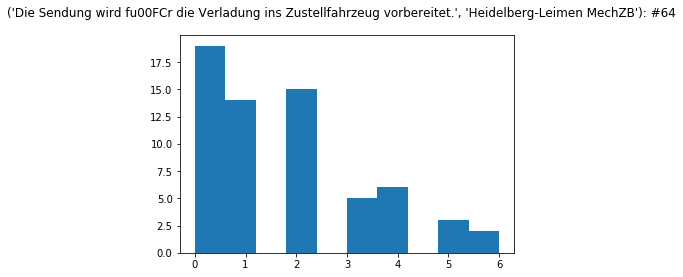

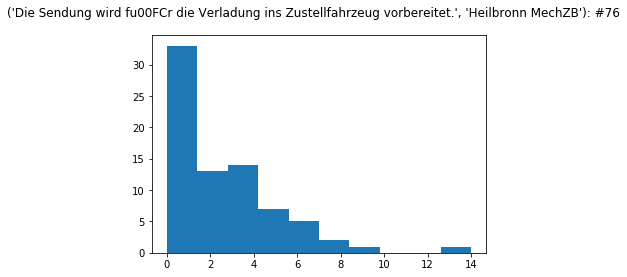

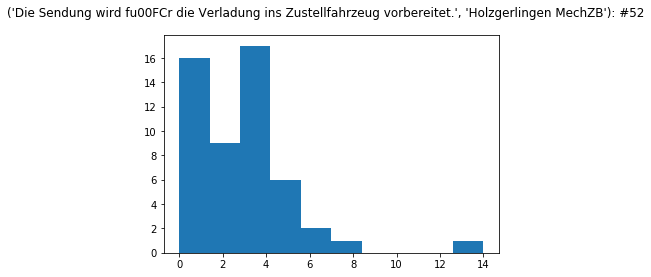

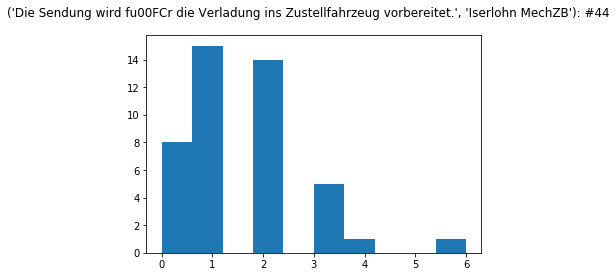

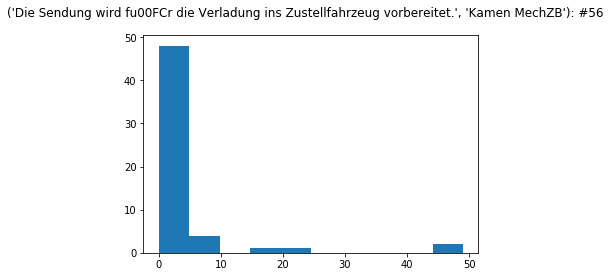

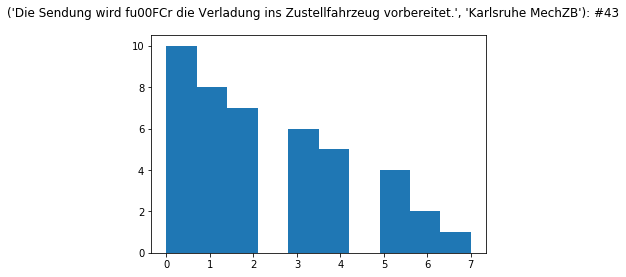

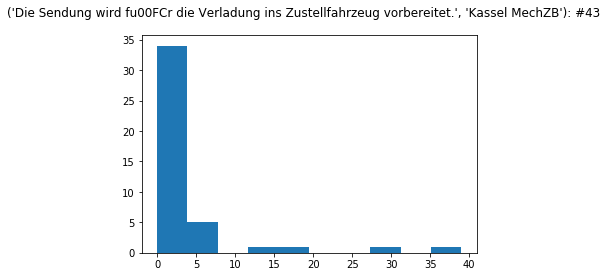

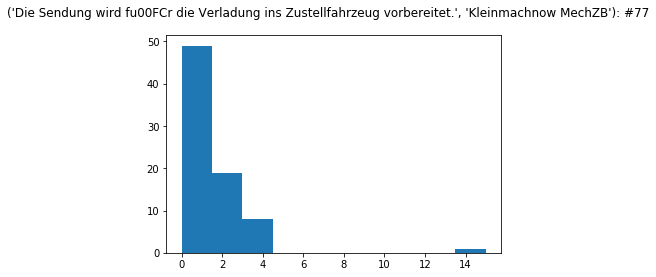

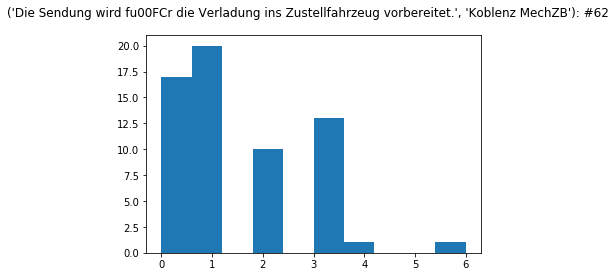

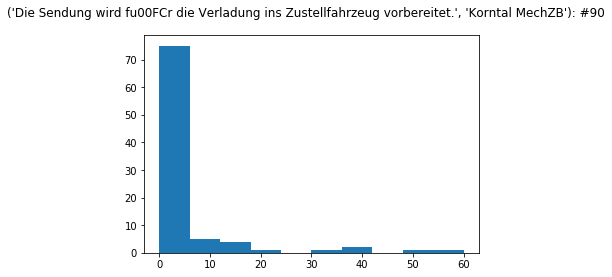

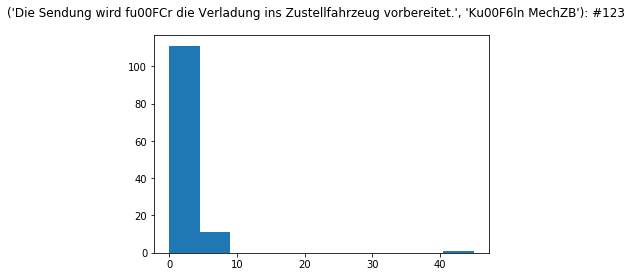

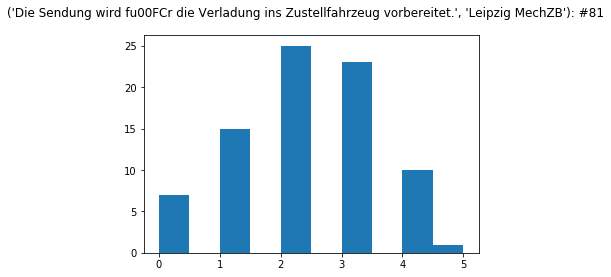

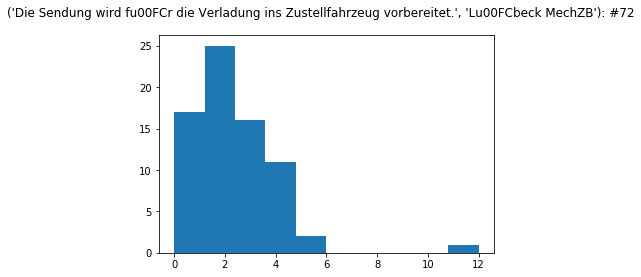

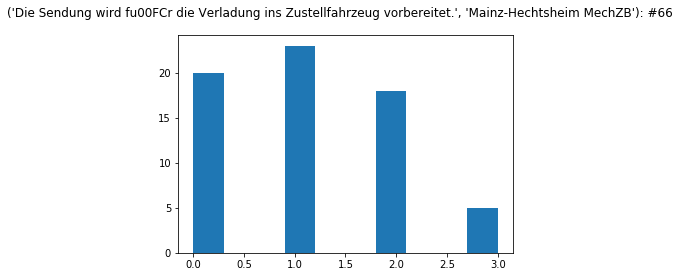

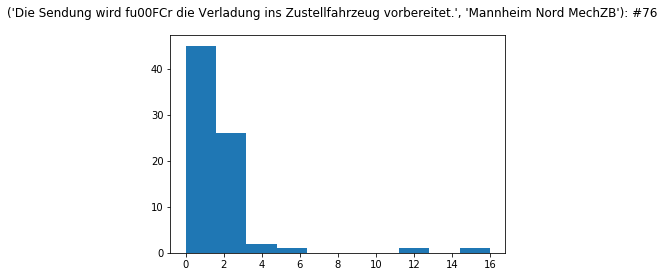

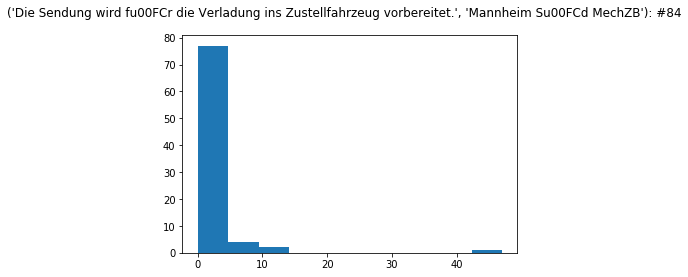

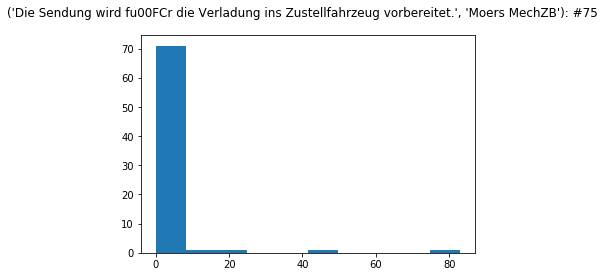

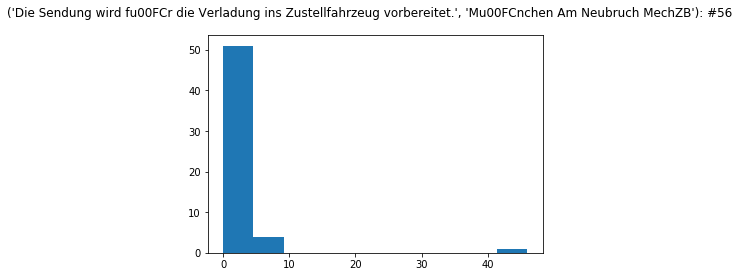

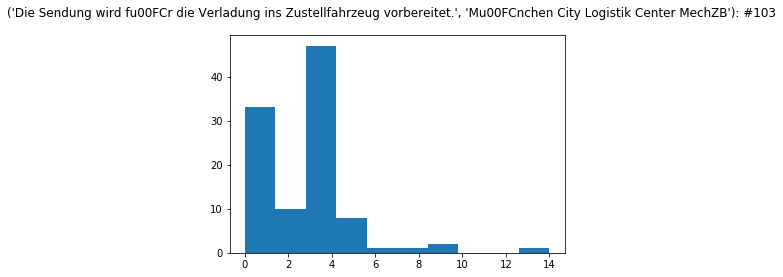

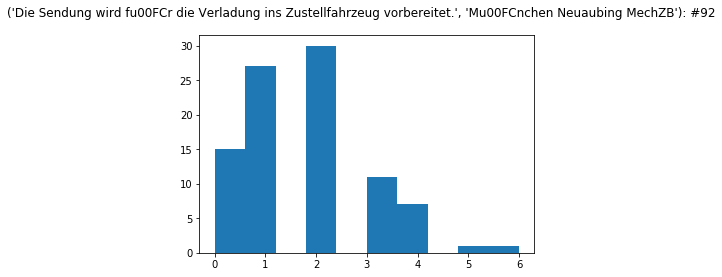

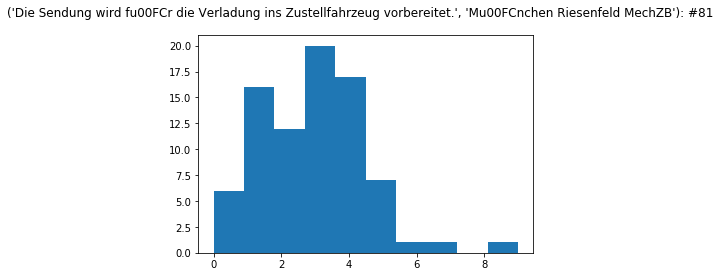

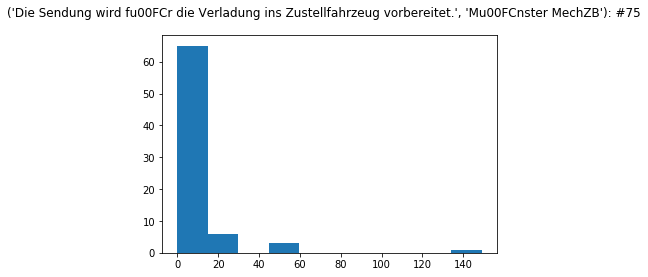

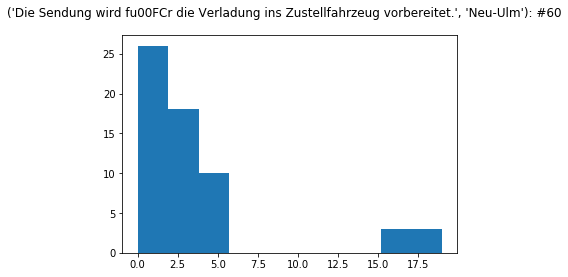

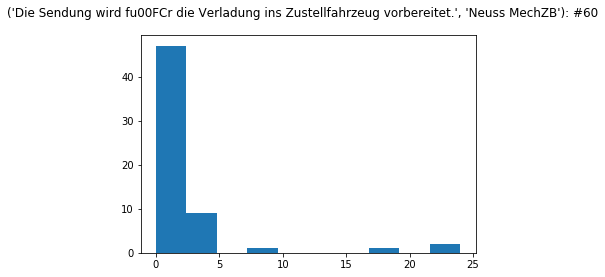

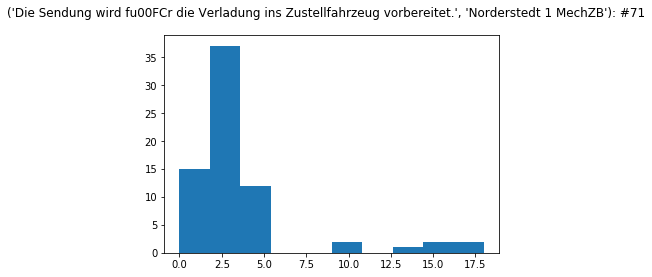

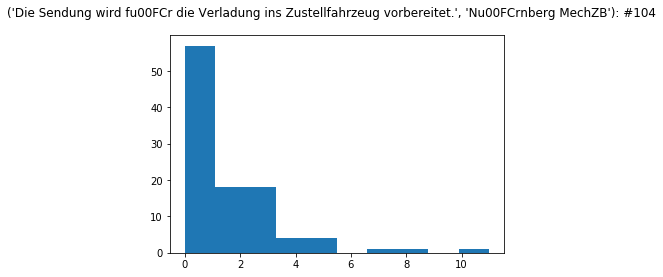

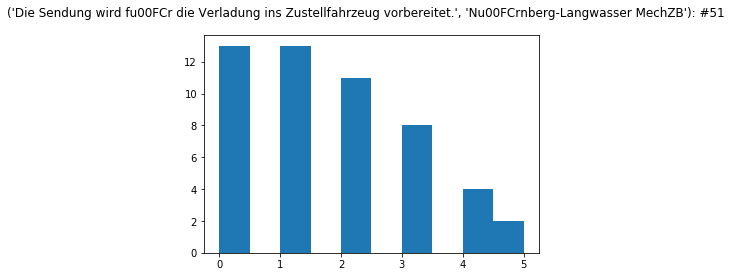

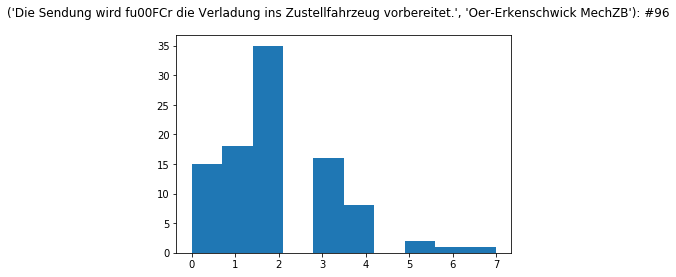

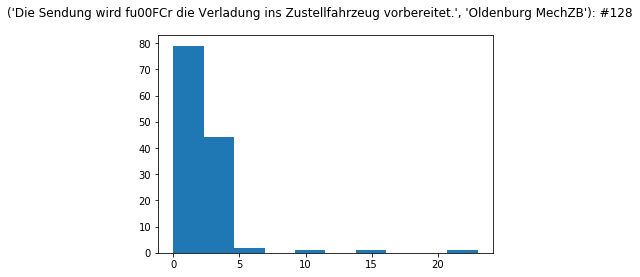

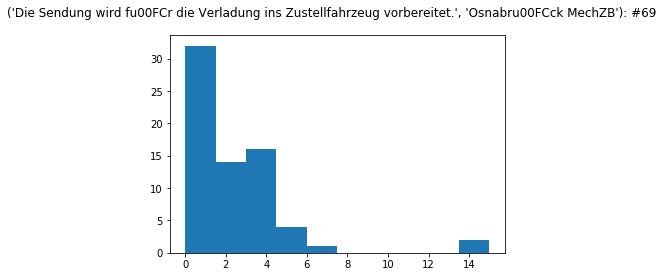

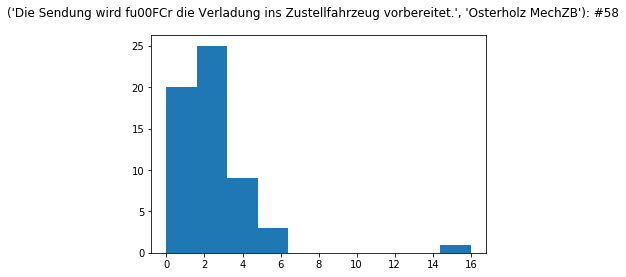

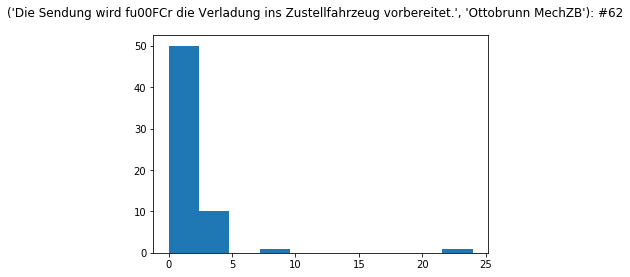

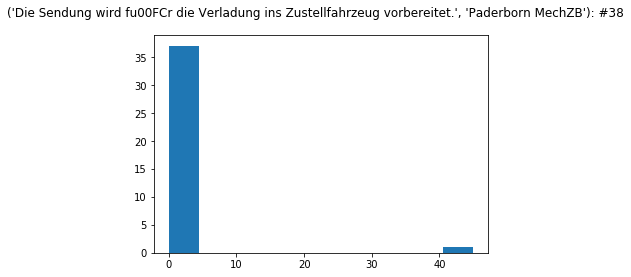

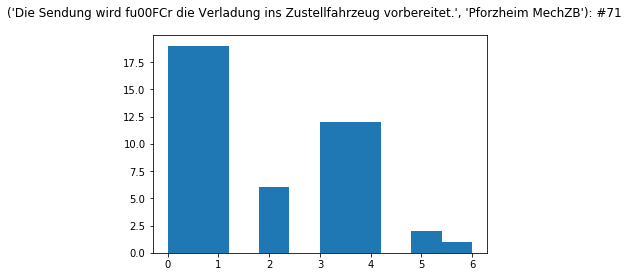

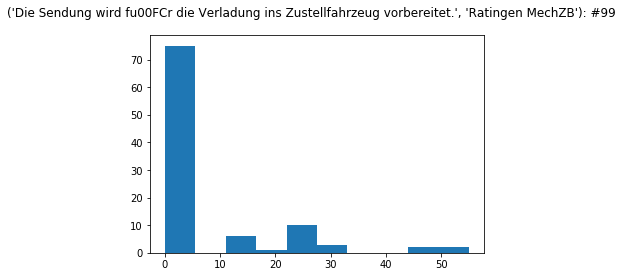

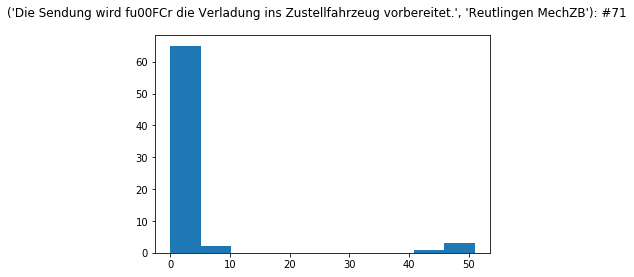

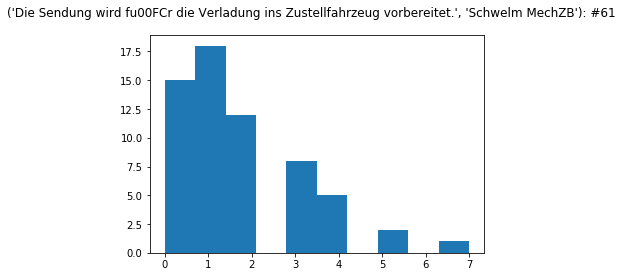

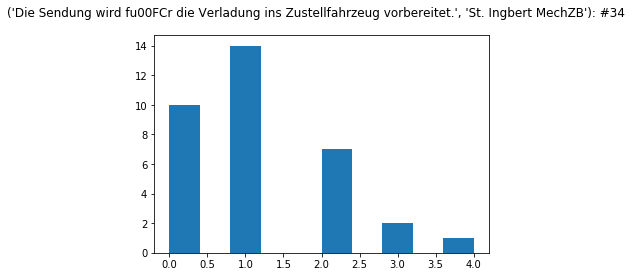

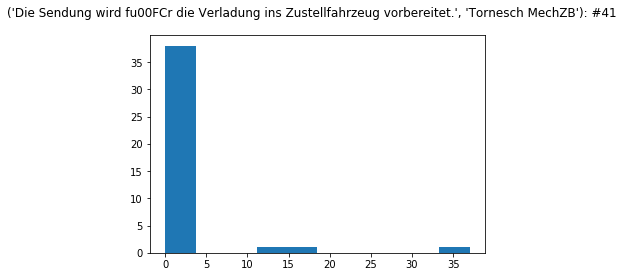

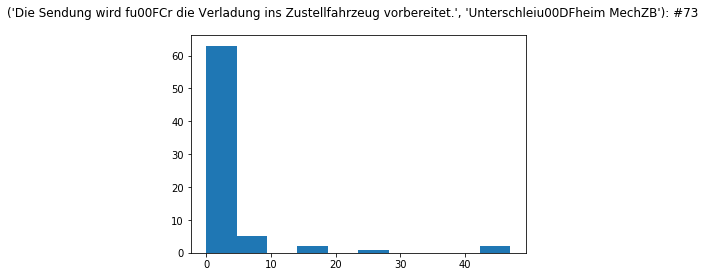

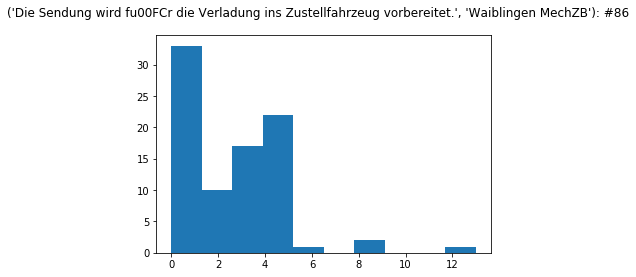

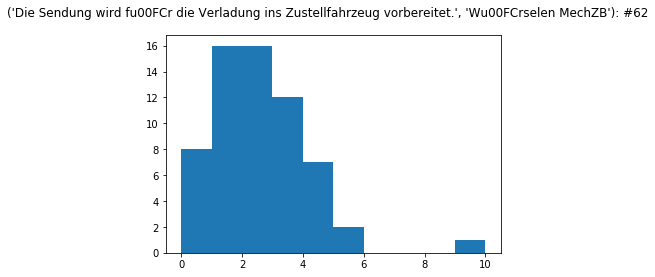

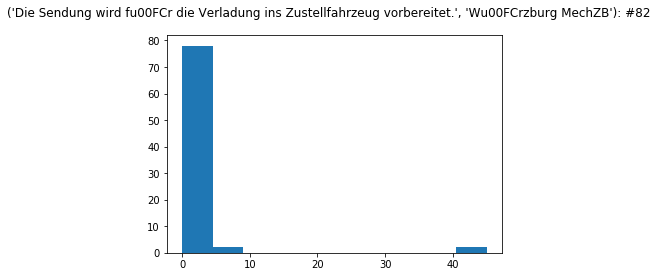

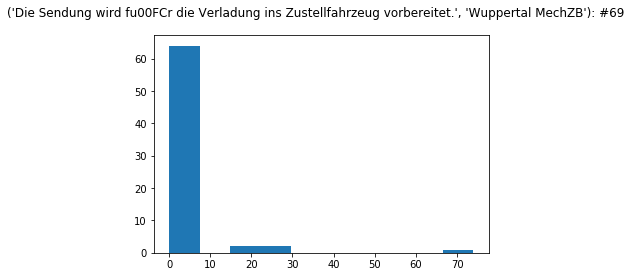

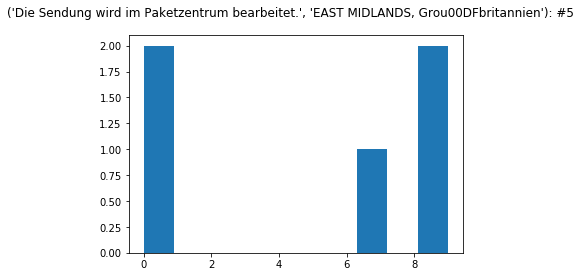

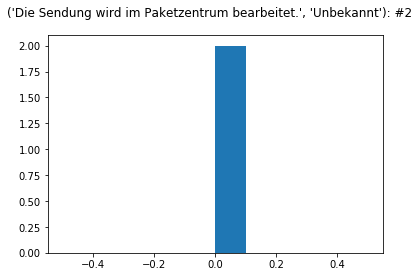

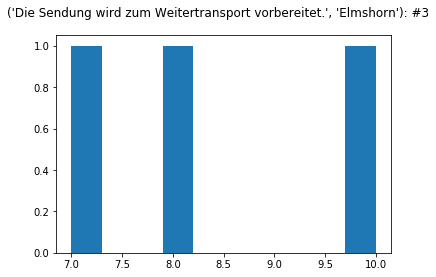

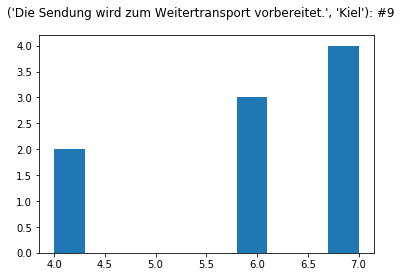

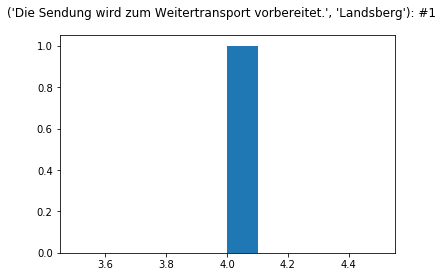

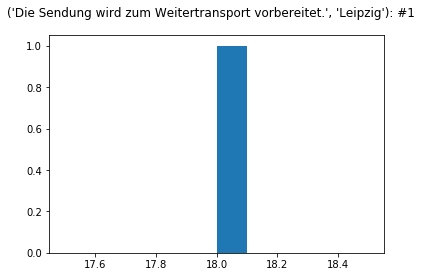

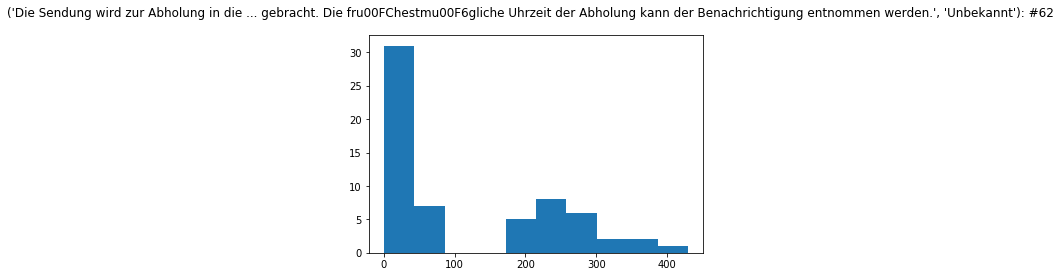

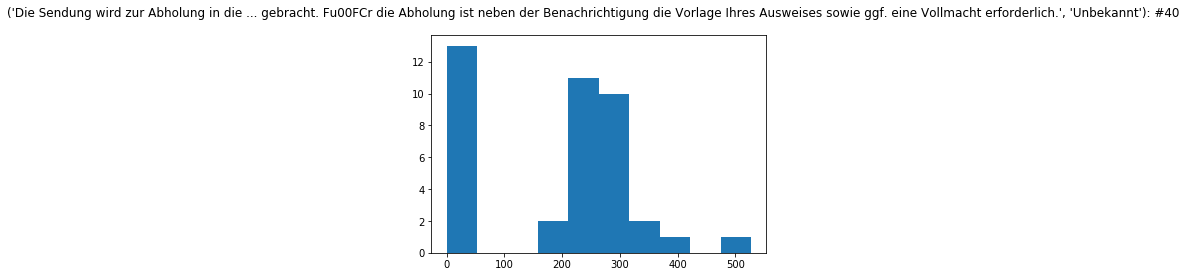

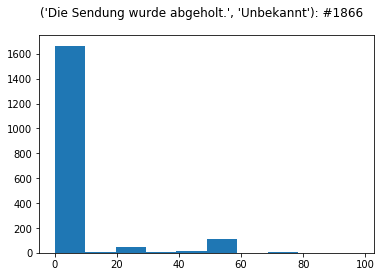

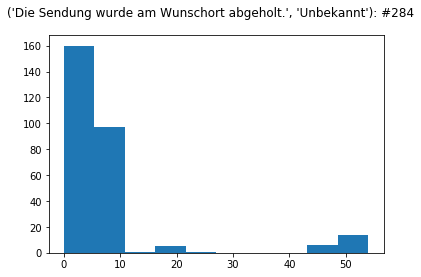

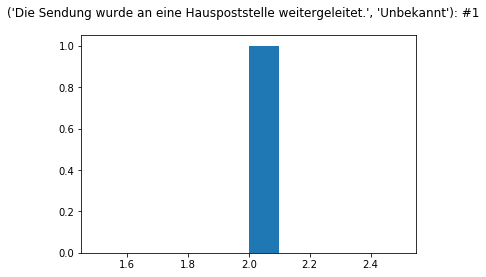

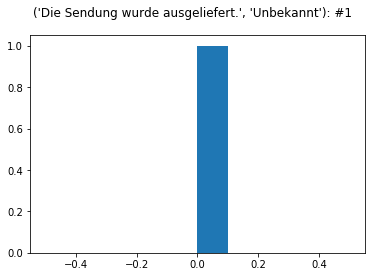

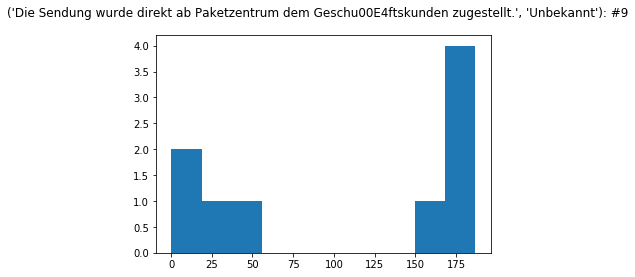

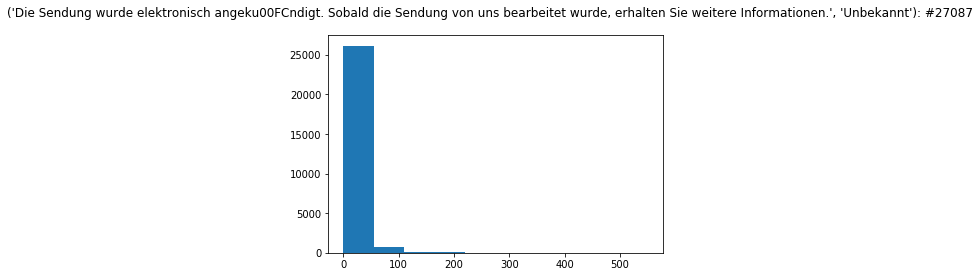

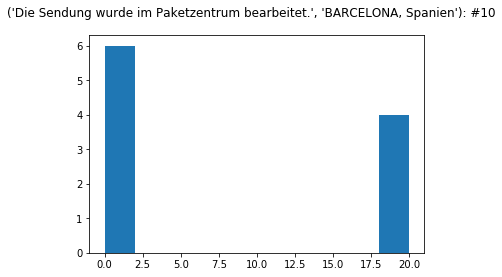

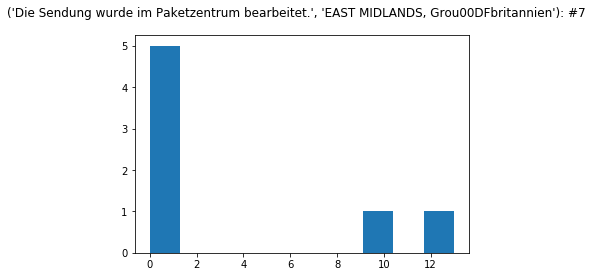

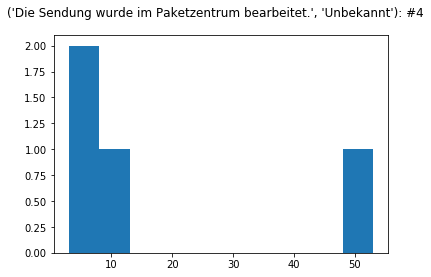

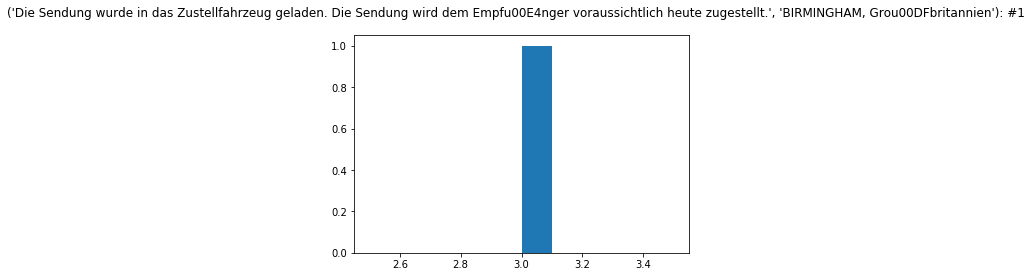

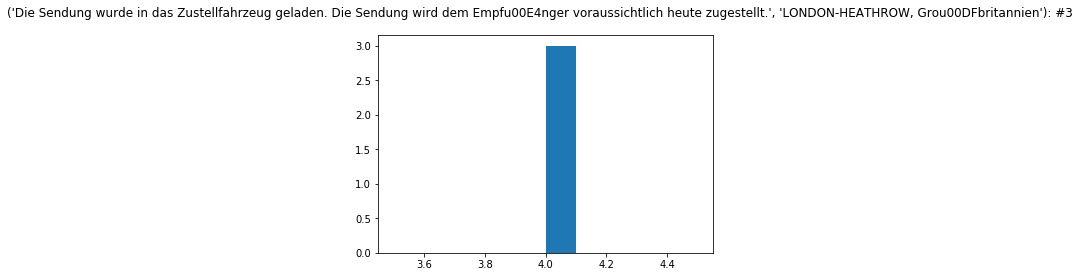

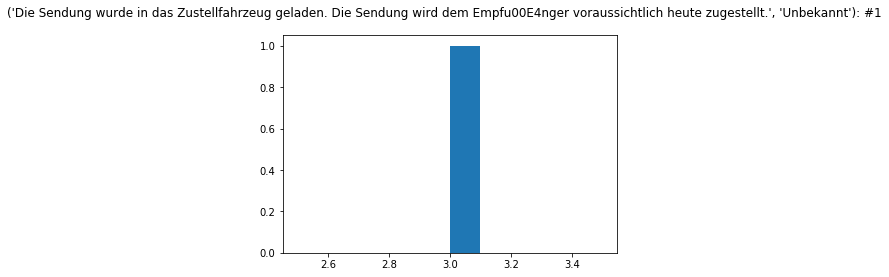

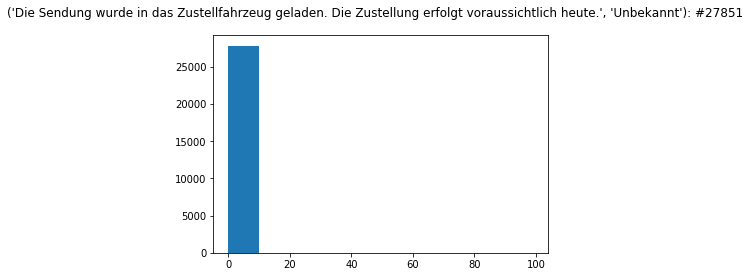

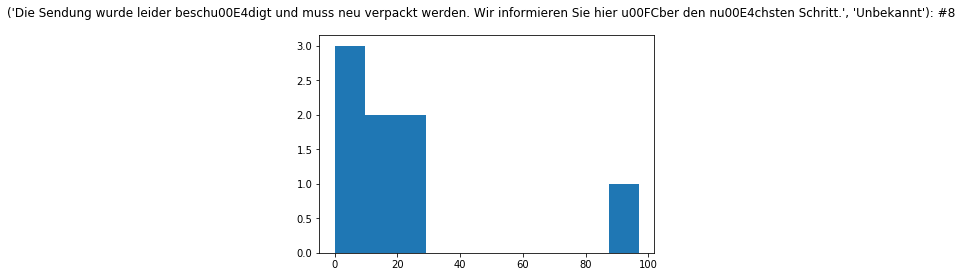

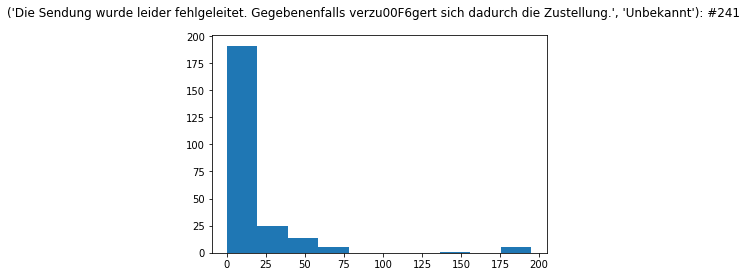

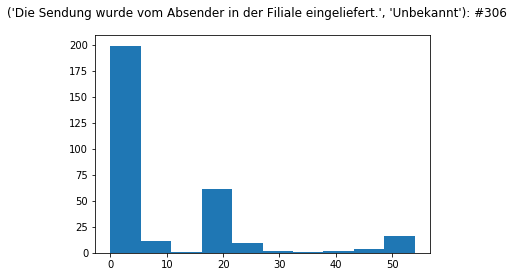

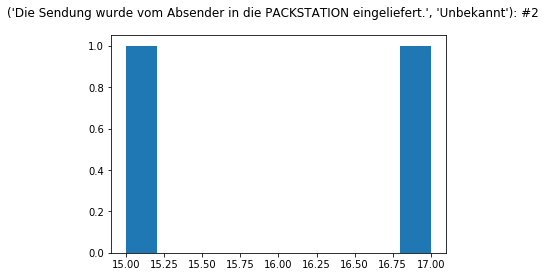

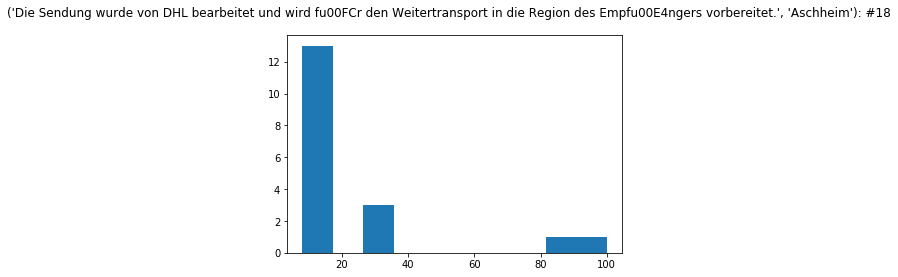

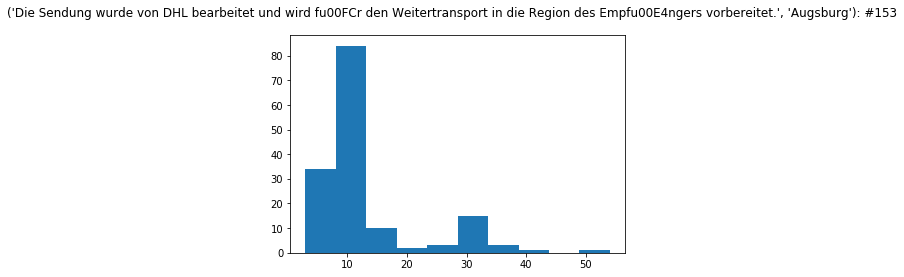

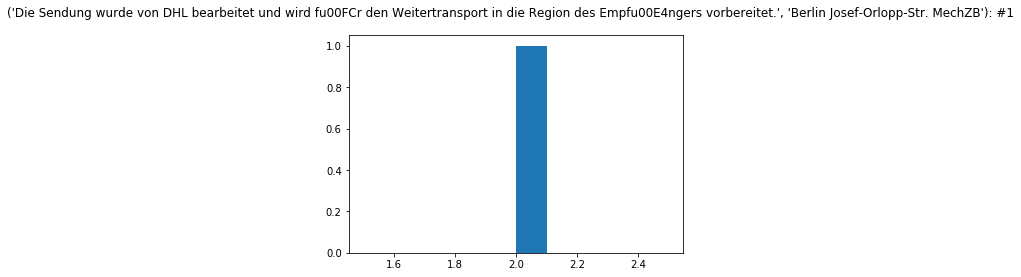

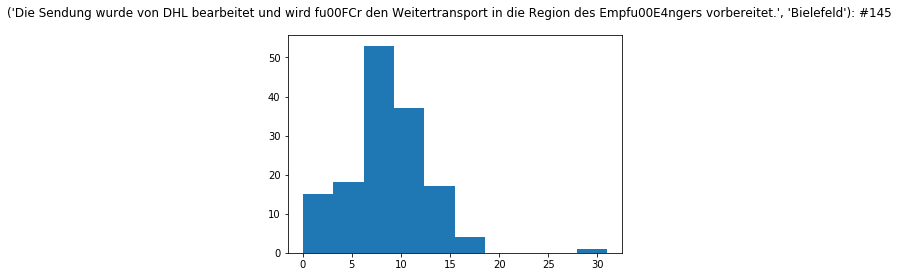

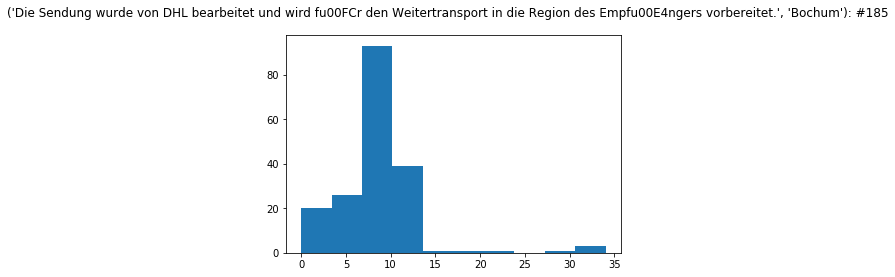

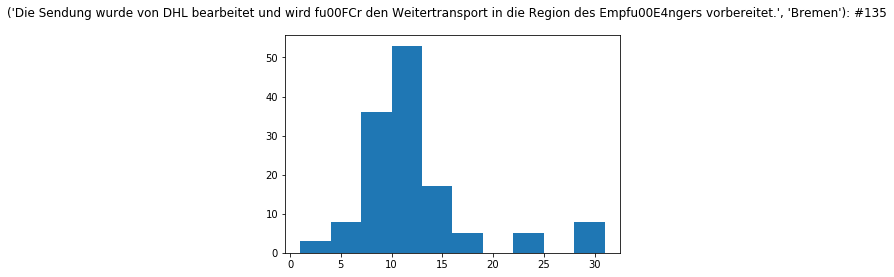

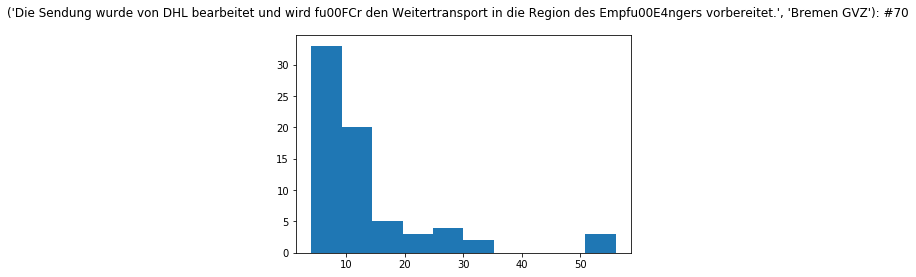

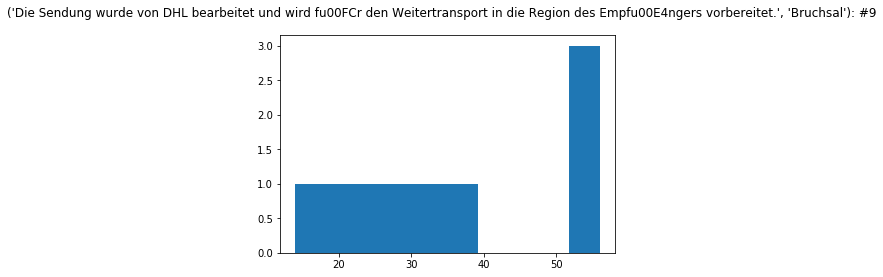

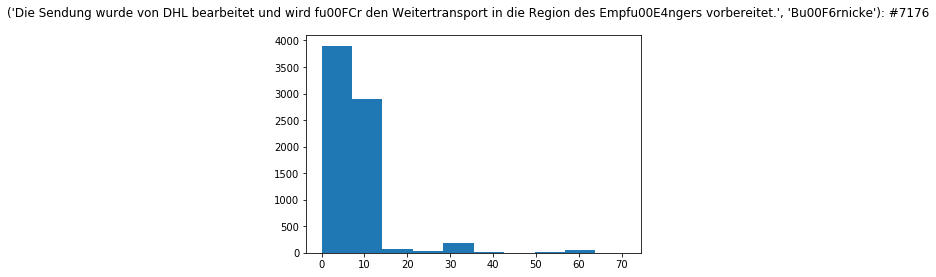

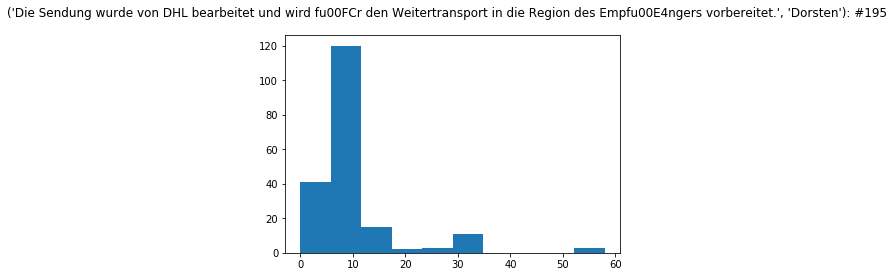

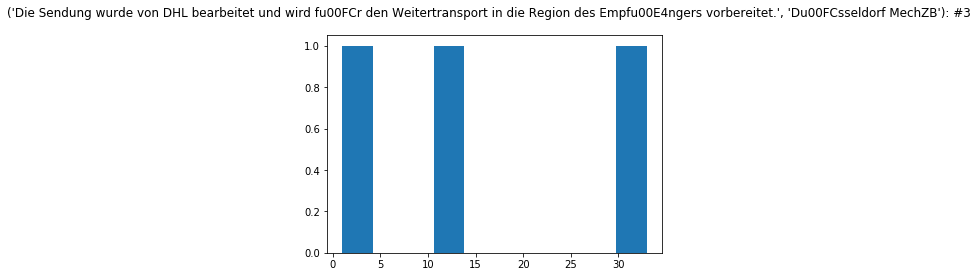

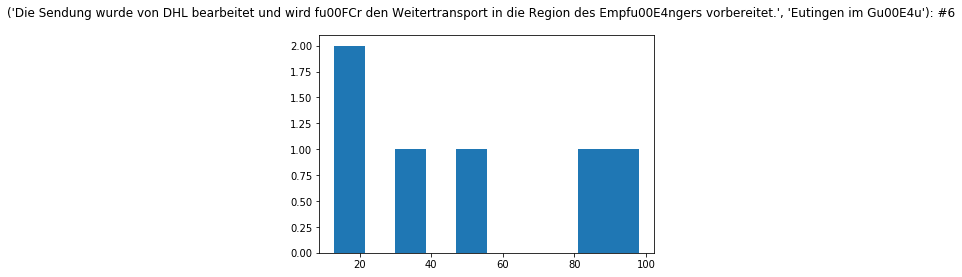

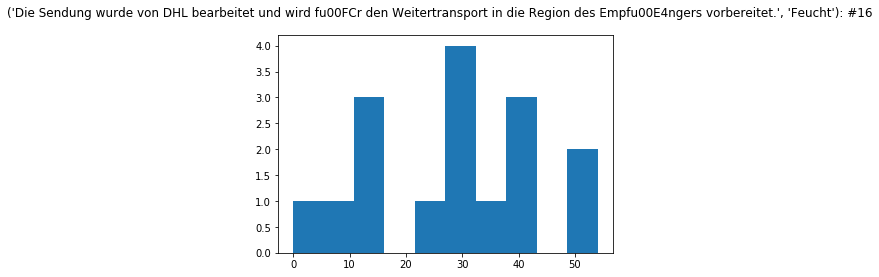

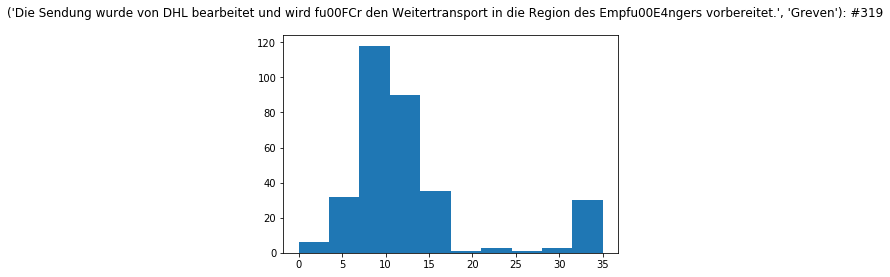

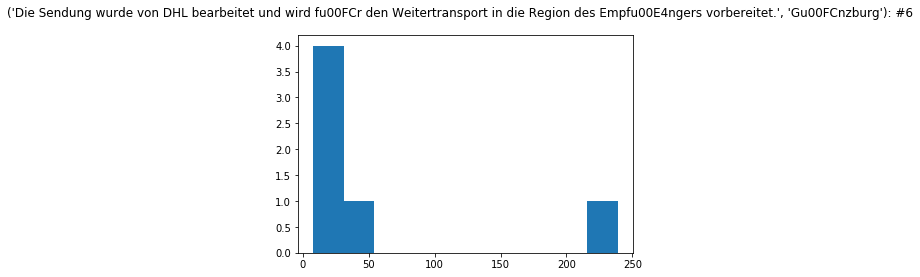

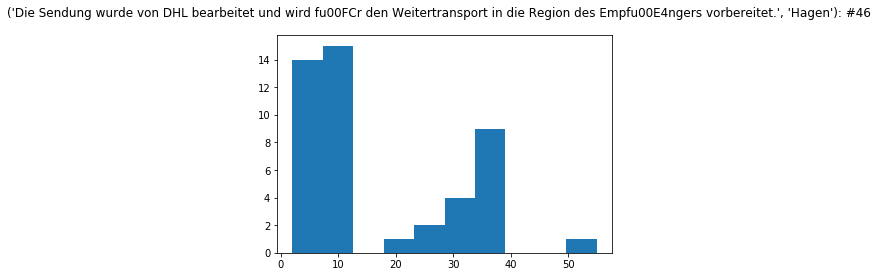

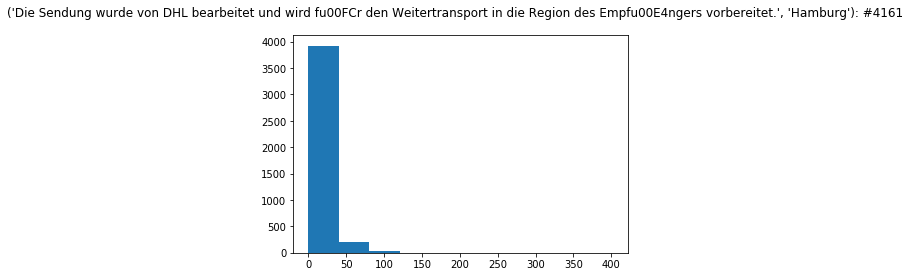

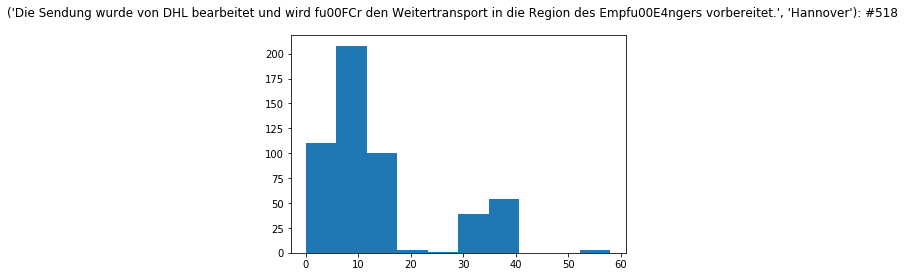

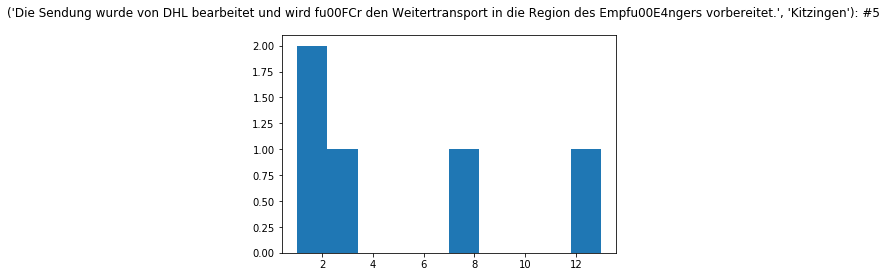

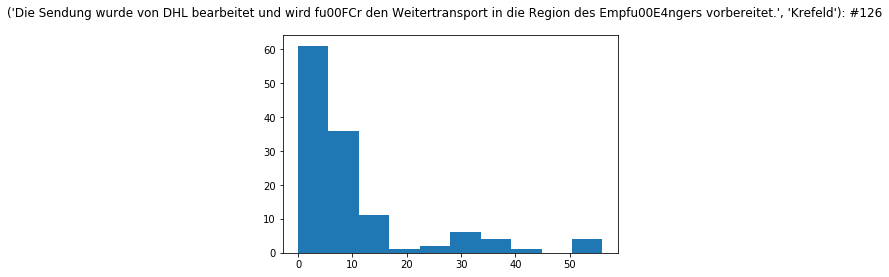

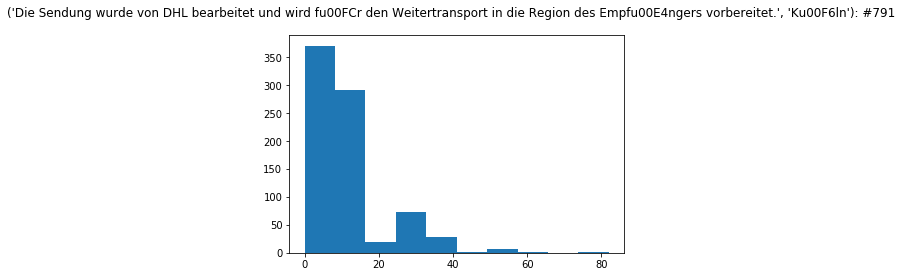

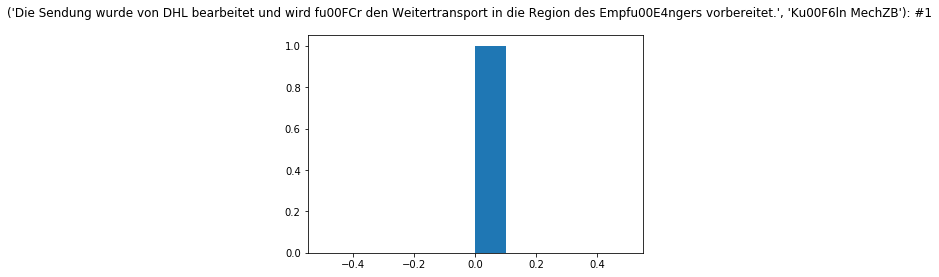

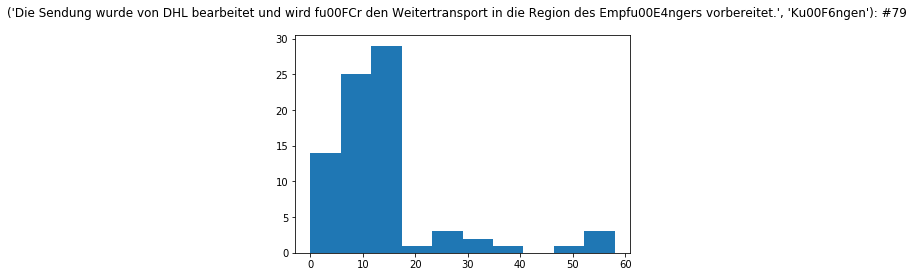

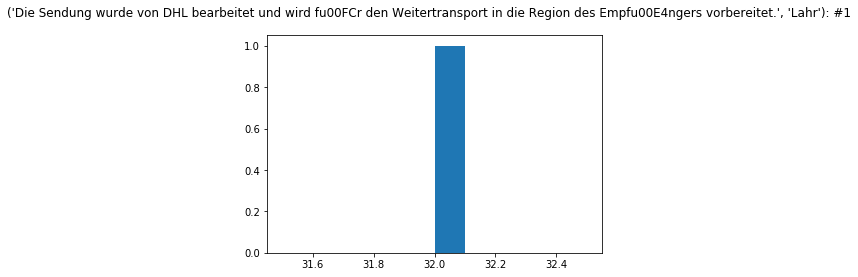

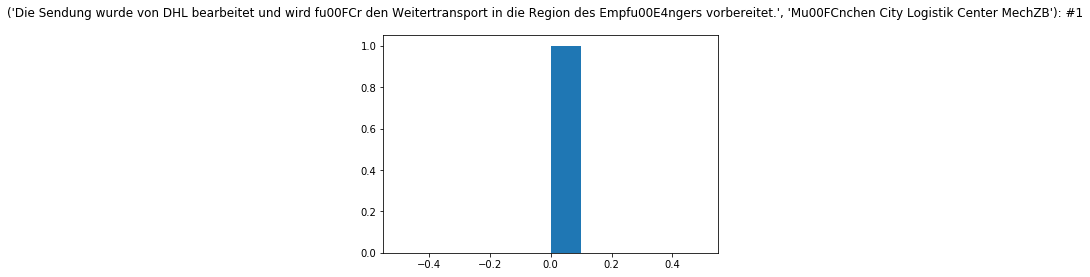

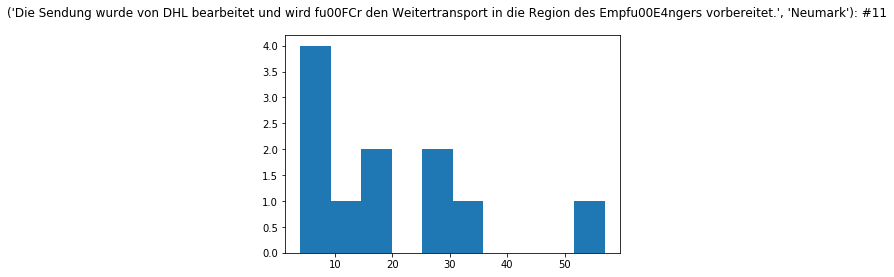

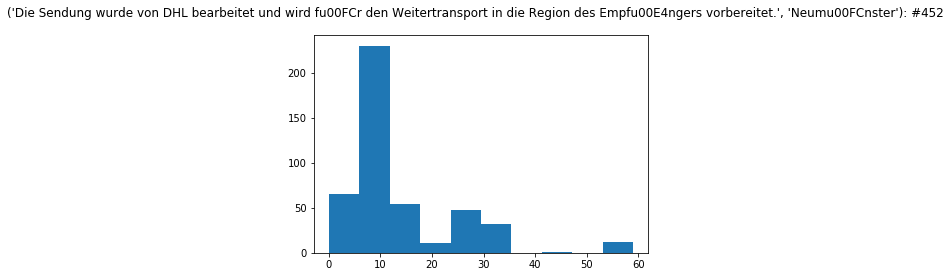

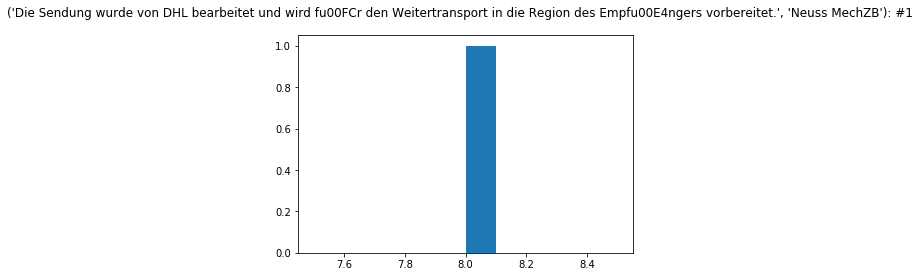

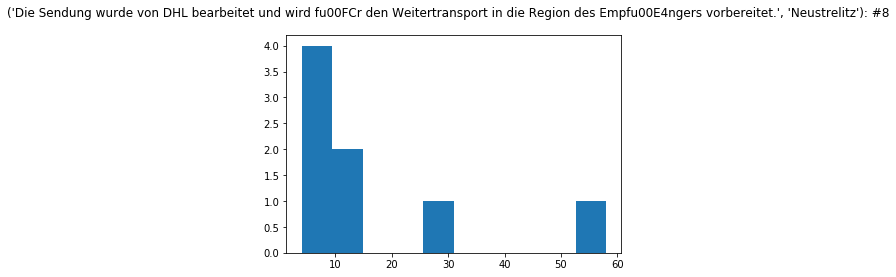

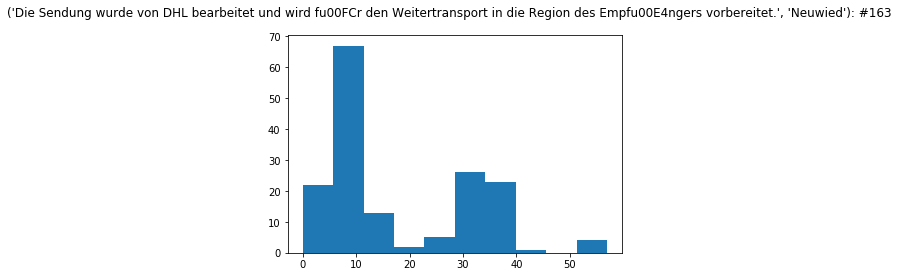

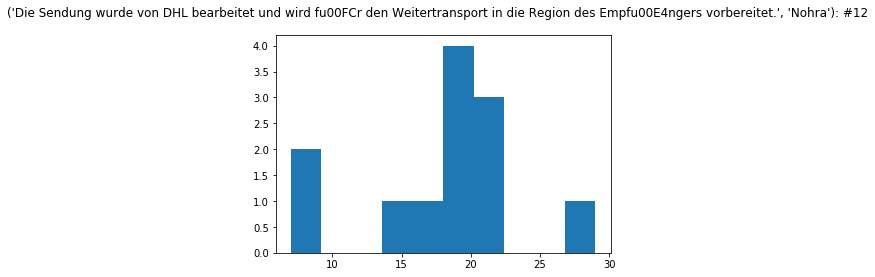

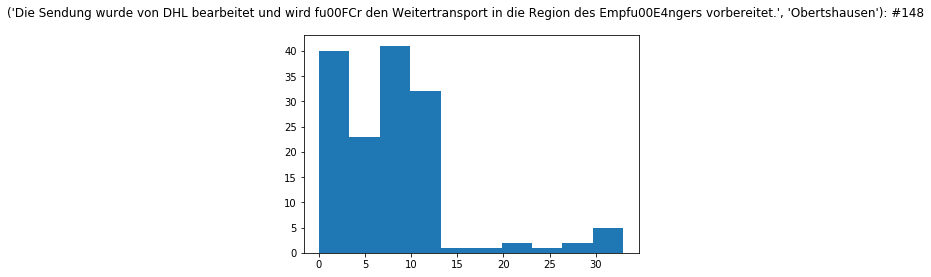

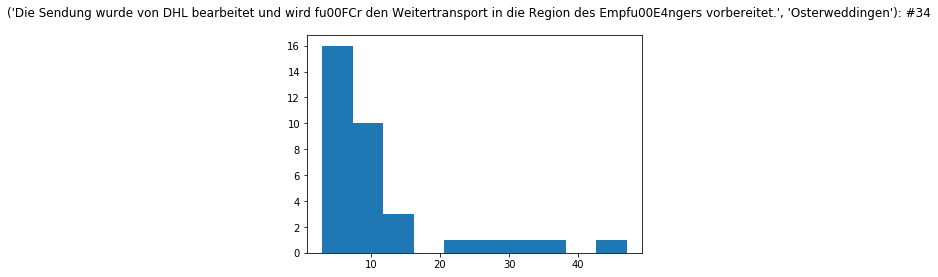

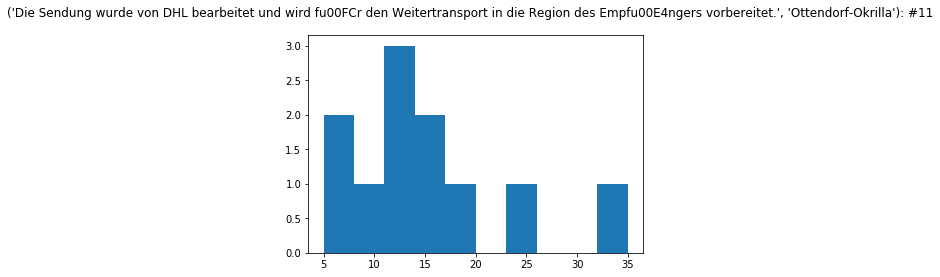

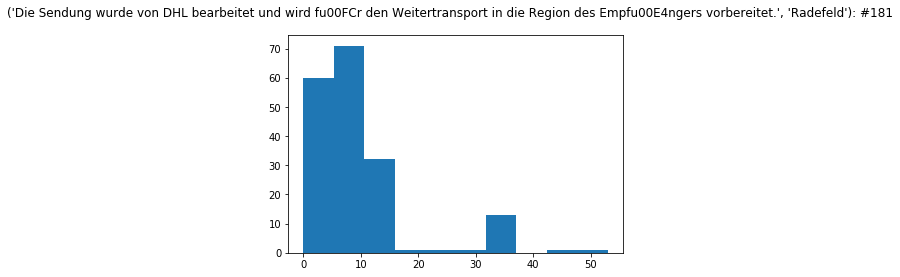

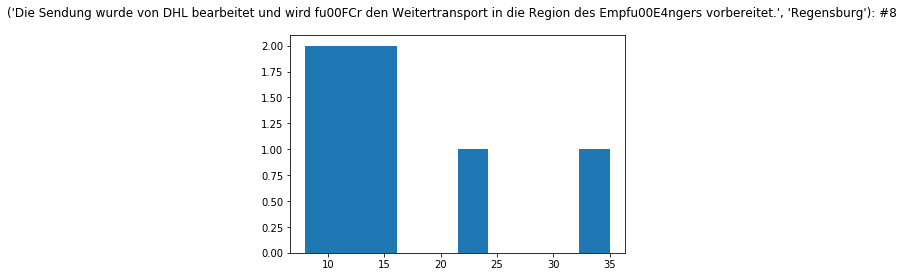

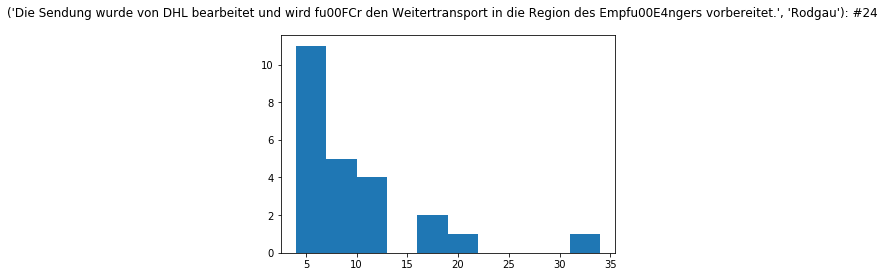

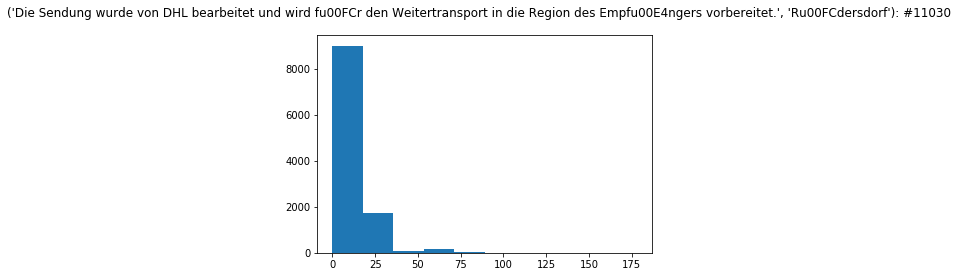

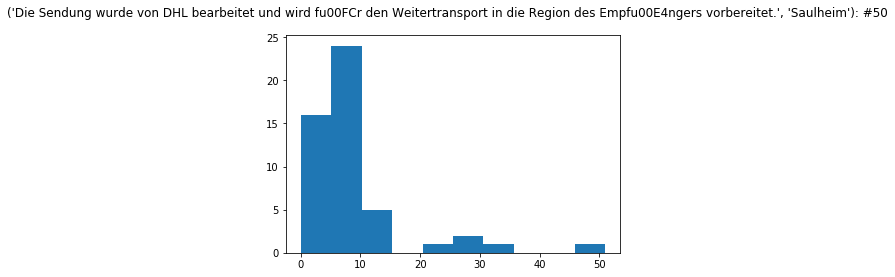

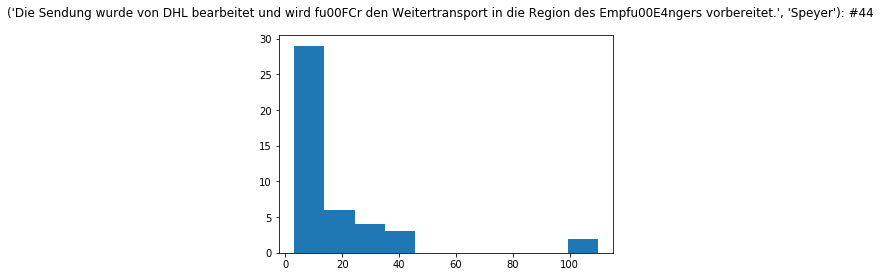

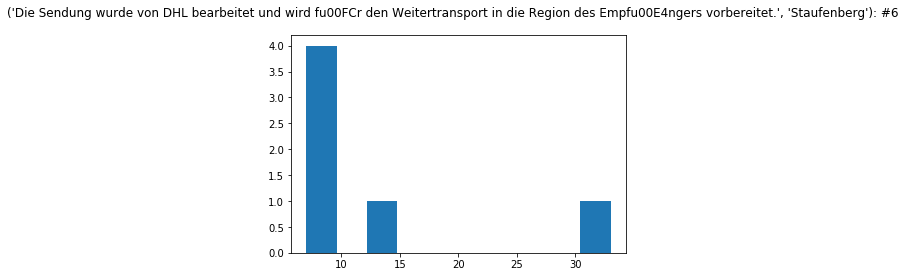

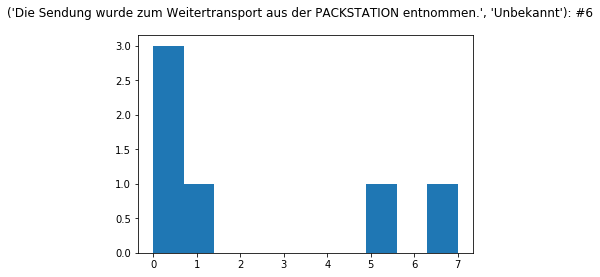

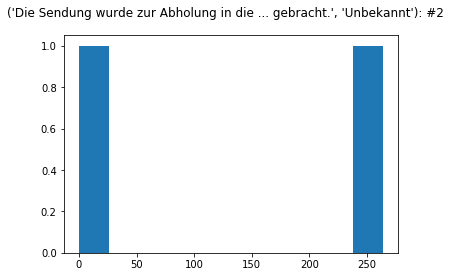

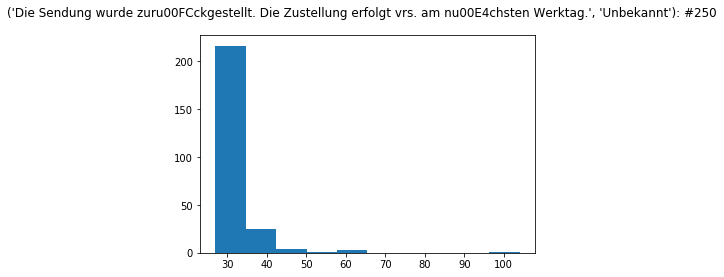

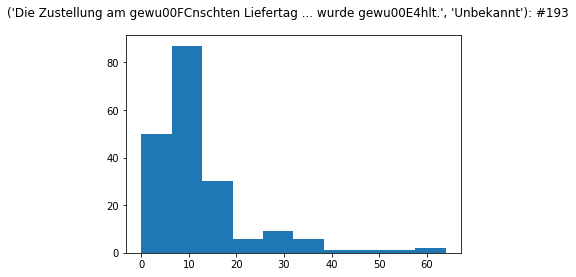

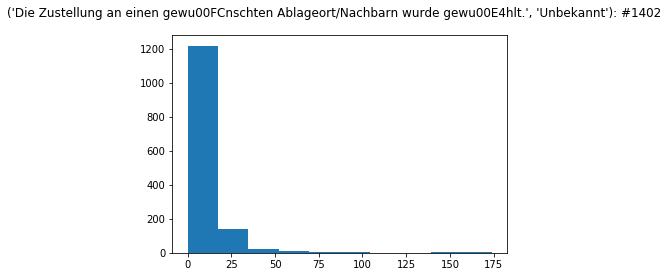

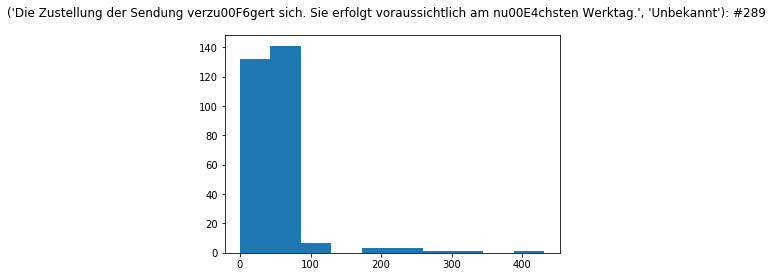

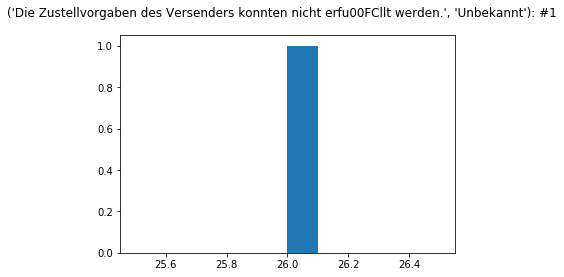

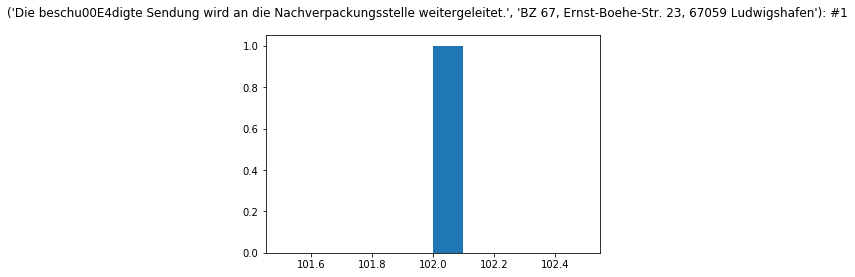

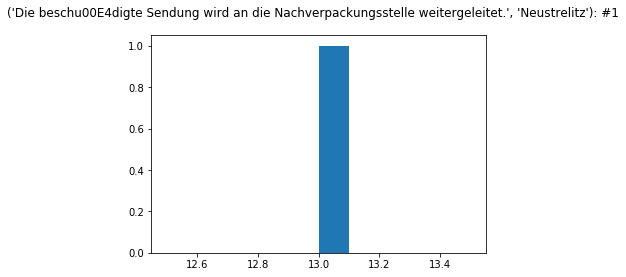

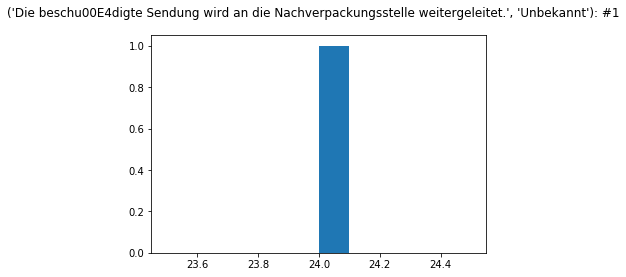

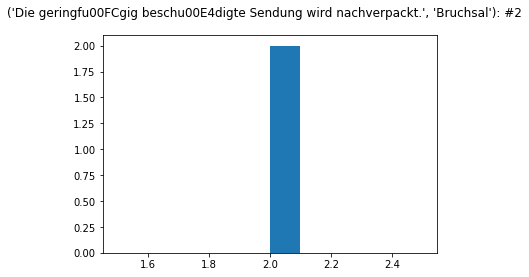

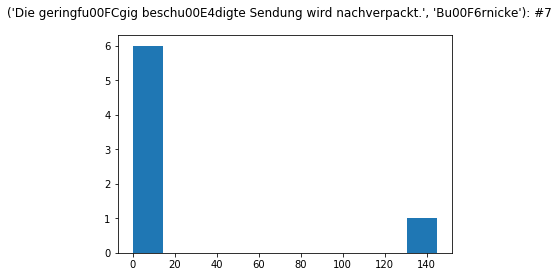

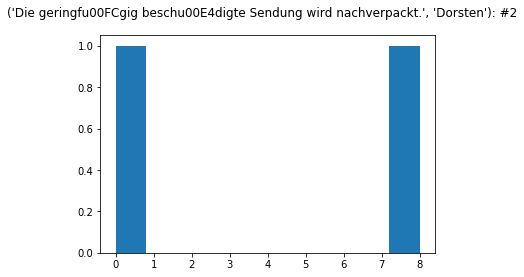

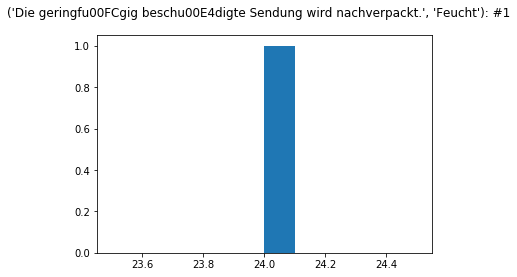

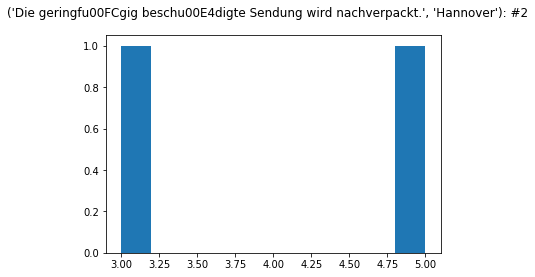

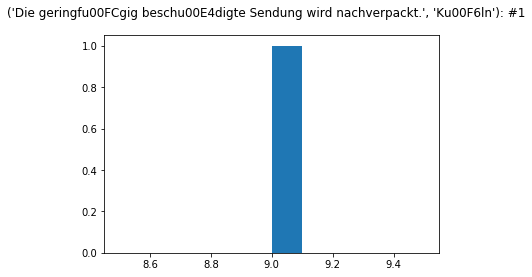

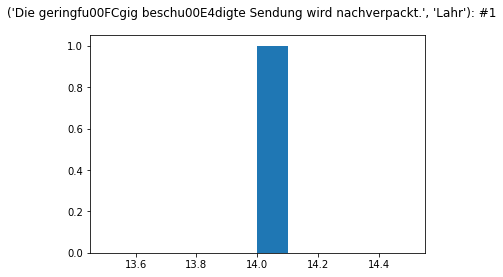

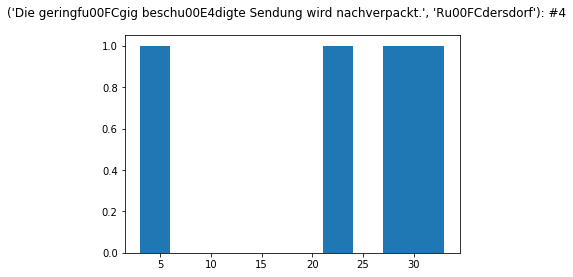

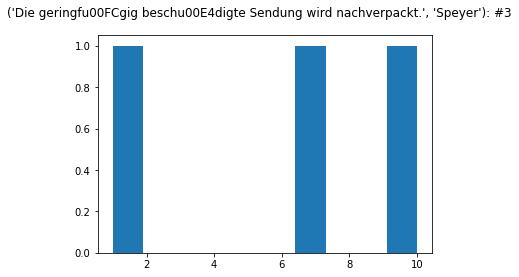

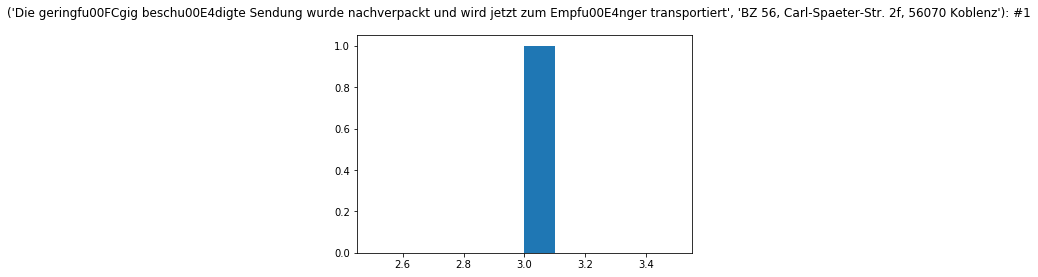

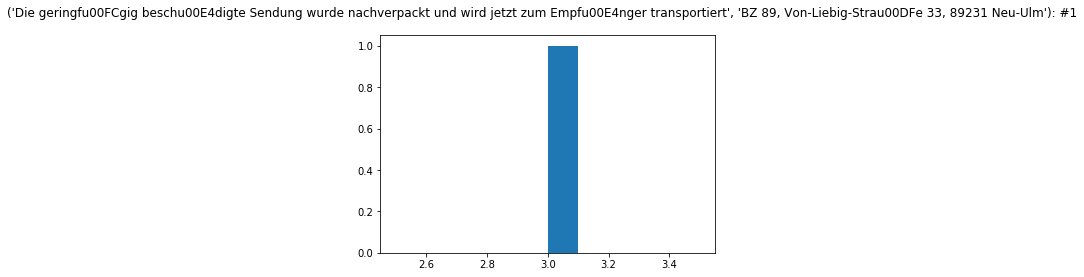

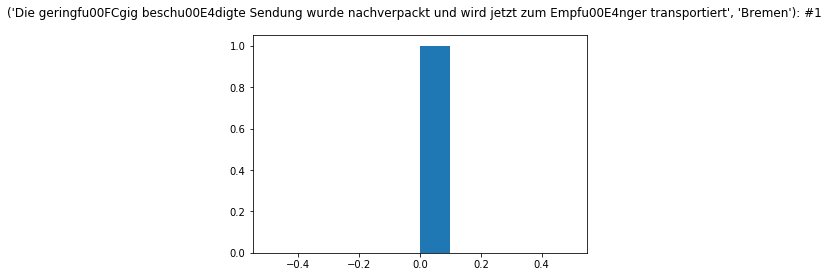

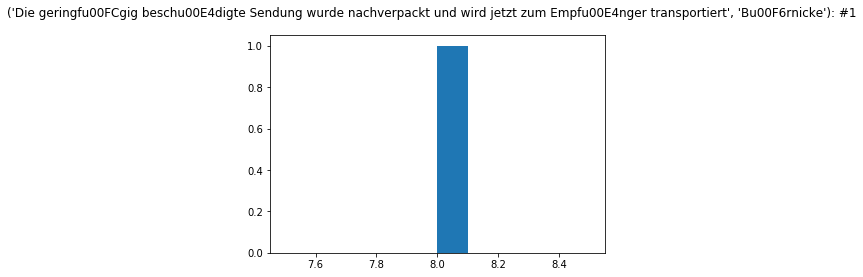

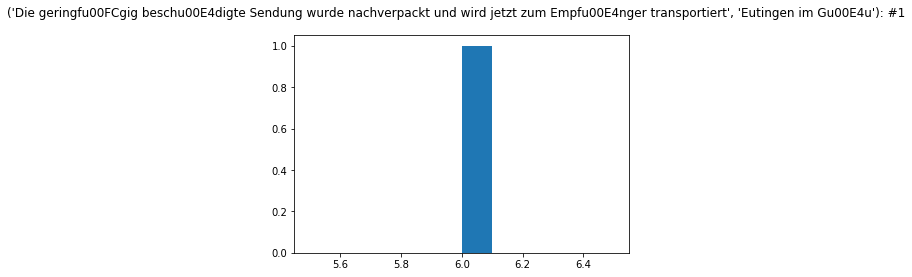

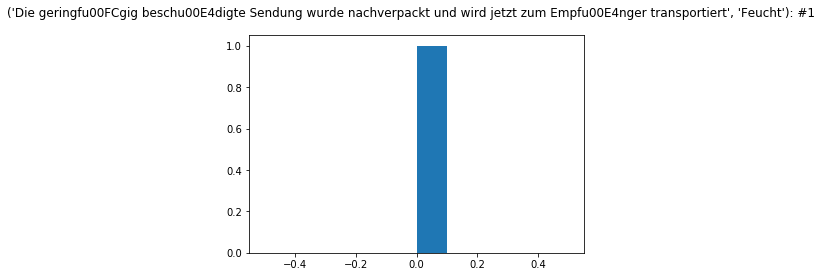

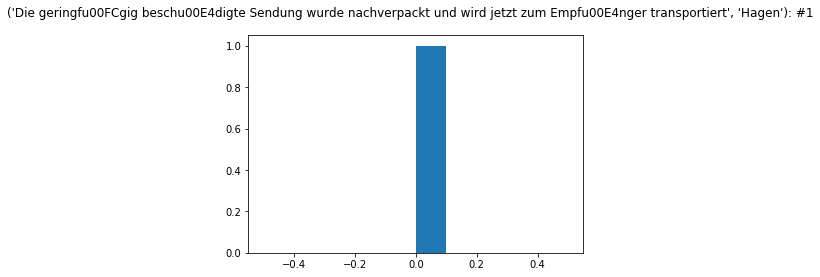

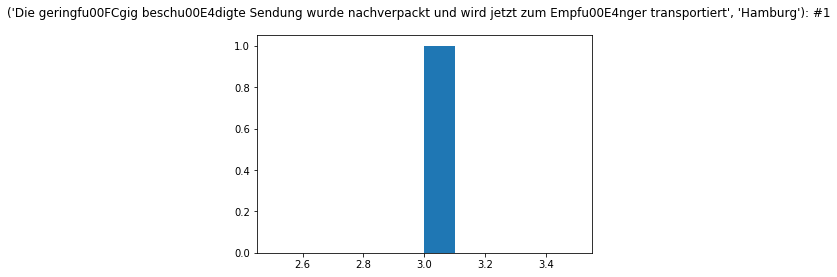

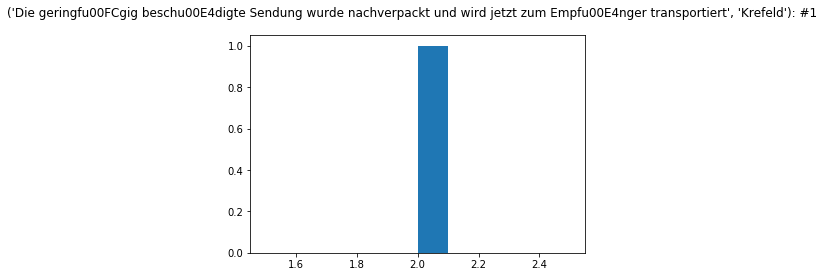

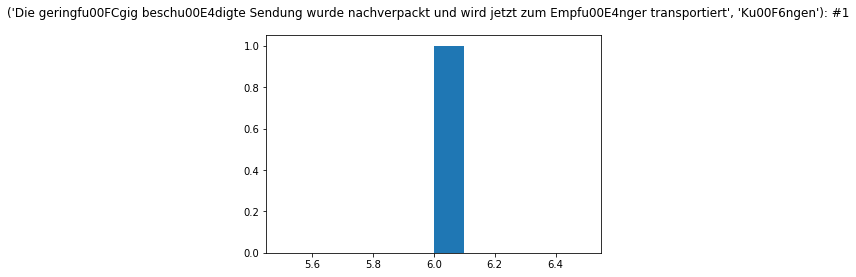

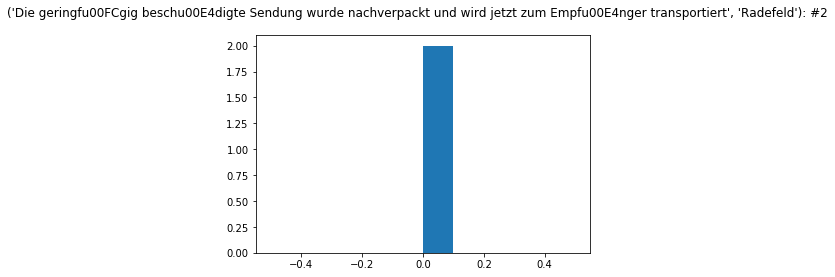

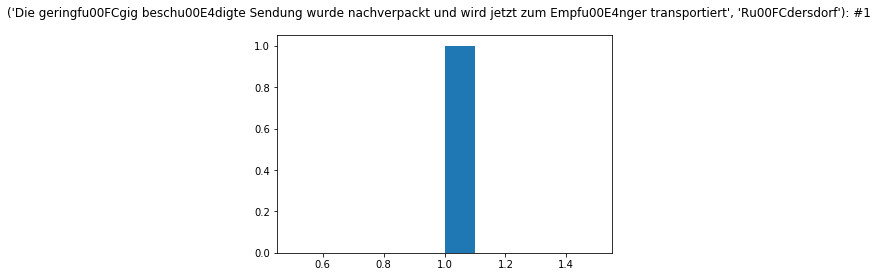

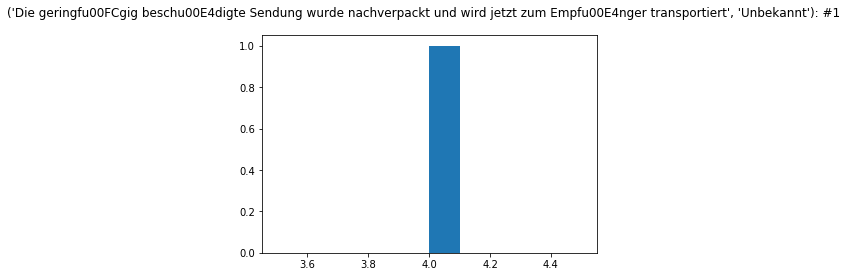

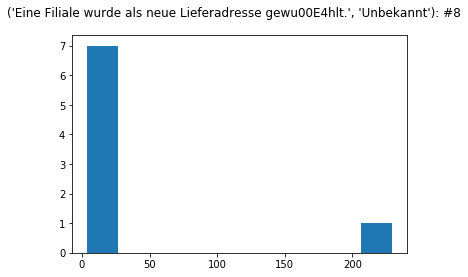

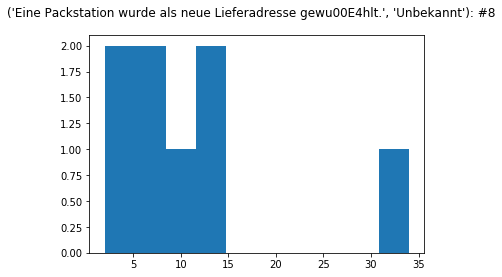

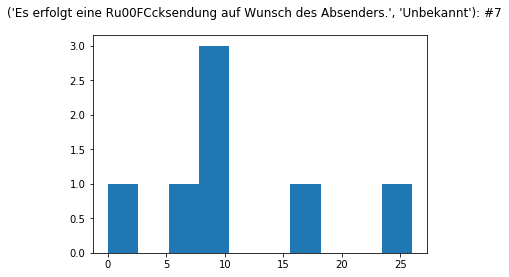

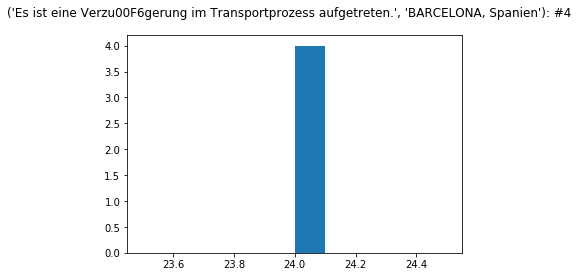

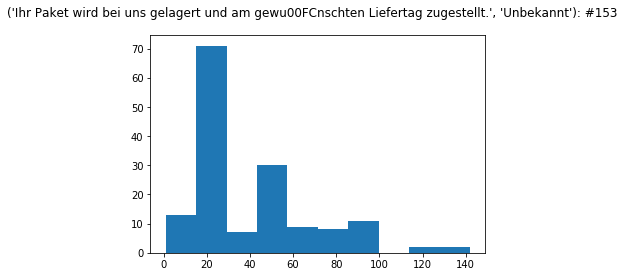

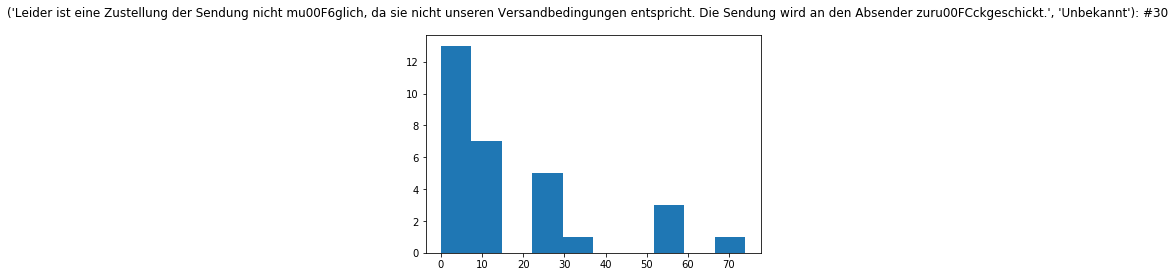

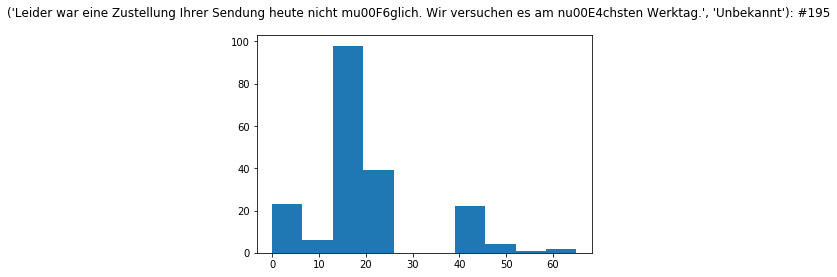

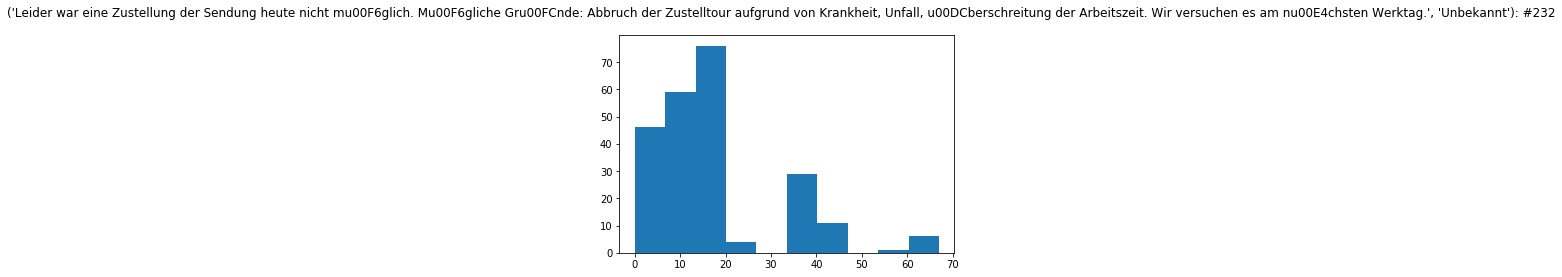

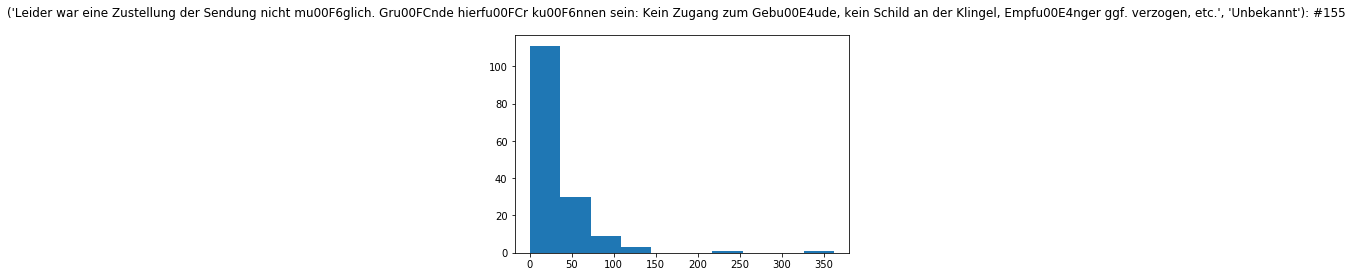

In [50]:
from pandas import DataFrame
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline


grouped = df_temp.groupby(["status", "ort"])

for name, group in grouped:
    fig = plt.figure()
    fig.suptitle(str(name) + ": #{}".format(len(group)))
    matplotlib.pyplot.hist(group.datum_diff_h)
    plt.show()
    
df.drop(columns=["datum_diff_h"], inplace=True)

In [51]:
df.head()

shipment_number                     datum  \
0  00340434188193325701 2019-10-08 14:42:00+00:00   
1  00340434188193325701 2019-10-08 18:19:00+00:00   
2  00340434188193325701 2019-10-09 02:44:00+00:00   
3  00340434188193325701 2019-10-09 07:46:00+00:00   
4  00340434188193325701 2019-10-09 10:35:00+00:00   

                                              status        ort  \
0  Die Sendung wurde elektronisch angeku00FCndigt...  Unbekannt   
1  Die Sendung wurde von DHL bearbeitet und wird ...    Hamburg   
2  Die Sendung ist in der Region des Empfu00E4nge...   Saulheim   
3  Die Sendung wurde in das Zustellfahrzeug gelad...  Unbekannt   
4          Die Sendung wurde erfolgreich zugestellt.  Unbekannt   

   is_final_event                                        status_next  \
0             0.0  Die Sendung wurde von DHL bearbeitet und wird ...   
1             0.0  Die Sendung ist in der Region des Empfu00E4nge...   
2             0.0  Die Sendung wurde in das Zustellfahrzeug gelad...   
3             0.0          Die Sendung wurde erfolgreich zugestellt.   
4             1.0                                    SuccessDelivery   

          ort_next                datum_next        datum_diff  
0          Hamburg 2019-10-08 18:19:00+00:00   0 days 03:37:00  
1         Saulheim 2019-10-09 02:44:00+00:00   0 days 08:25:00  
2        Unbekannt 2019-10-09 07:46:00+00:00   0 days 05:02:00  
3        Unbekannt 2019-10-09 10:35:00+00:00   0 days 02:49:00  
4  SuccessDelivery 2020-05-11 00:00:00+00:00 214 days 13:25:00